# The landscape of cancer driver genes
Landscape of all cancer driver genes detected by the method across all cohorts

In [162]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import os
import numpy as np
import warnings
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import re
from itertools import chain
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
from matplotlib.colors import Normalize

In [163]:
# Names and colors

colors_dict = {"Oncodrive3D" : "#ffad48", 
              "HotMAPS" : "#024b79", 
              "OncodriveCLUSTL" : "#43b7c2", 
              "smRegions" : "lightgray", 
              "CBaSE" : "lightgray", 
              "dNdScv" : "lightgray", 
              "MutPanning" : "lightgray", 
              "OncodriveFML" : "lightgray",
              "Random" : "pink"}

names_dict = {"o3d" : "Oncodrive3D", 
             "hotmaps" : "HotMAPS", 
             "clustl" : "OncodriveCLUSTL", 
             "smreg" : "smRegions", 
             "cbase" : "CBaSE", 
             "dndscv" : "dNdScv", 
             "mutpan" : "MutPanning", 
             "fml" : "OncodriveFML",
             "random" : "Random"}

In [164]:
SUBDIR = "human_mane_raw"
RUN = "run_2024-07-01_16-04-14"
# lst_methods = ["o3d", "hotmaps", "clustl", "smreg", "cbase", "seismic", "dndscv", "mutpan", "fml", "random"]
# lst_methods = ["o3d", "hotmaps", "clustl", "random"]

datasets = f"/workspace/projects/clustering_3d/o3d_analysys/datasets/"
input_path = f"{datasets}/input/cancer_202404"
cohort_df = pd.read_csv(f"{input_path}/cohorts.tsv", sep="\t")
cohort_df = cohort_df[~cohort_df.COHORT.str.startswith("ICGC")].reset_index(drop=True)
o3d_output_dir = f"{datasets}/output/cancer_202404/o3d_output/{SUBDIR}/{RUN}"
intogen_output = f"{datasets}/output/cancer_202404/intogen_output"
genetable_path = f"/workspace/projects/clustering_3d/o3d_analysys/o3d_paper/data/results/{SUBDIR}/{RUN}.genetable.tsv"
drivers_df = pd.read_table(f"{input_path}/drivers.tsv")
uniq_drivers_df = pd.read_table(f"{input_path}/unique_drivers.tsv")

cgc_df = pd.read_csv(f"{input_path}/CGC_list_v99.tsv", sep = "\t")
display(cgc_df)

oncotree_df = pd.read_csv(f"{datasets}/input/cancer_202404/oncotree.tsv", sep="\t")
display(oncotree_df)

oncokb_df = pd.read_csv(f"{input_path}/oncokb_list_20240712.tsv", sep = "\t")
oncokb_df = oncokb_df[["Hugo Symbol", "OncoKB Annotated", "MSK-IMPACT", "MSK-HEME", "FOUNDATION ONE", "FOUNDATION ONE HEME", "Vogelstein"]]
oncokb_df

Gene Symbol                                               Name  \
0          A1CF                     APOBEC1 complementation factor   
1          ABI1                                   abl-interactor 1   
2          ABL1  v-abl Abelson murine leukemia viral oncogene h...   
3          ABL2     c-abl oncogene 2, non-receptor tyrosine kinase   
4         ACKR3                      atypical chemokine receptor 3   
..          ...                                                ...   
738      ZNF429                            zinc finger protein 429   
739      ZNF479                            zinc finger protein 479   
740      ZNF521                            zinc finger protein 521   
741       ZNRF3                             zinc and ring finger 3   
742       ZRSR2  zinc finger (CCCH type), RNA-binding motif and...   

     Entrez GeneId        Genome Location  Tier Hallmark  Chr Band Somatic  \
0          29974.0   10:50799421-50885675     2      NaN  10q11.23     yes   
1          10006.0   10:26746593-26860935     1      Yes   10p12.1     yes   
2             25.0  9:130713946-130885683     1      Yes   9q34.12     yes   
3             27.0  1:179099327-179229601     1      NaN    1q25.2     yes   
4          57007.0  2:236569641-236582358     1      Yes    2q37.3     yes   
..             ...                    ...   ...      ...       ...     ...   
738       353088.0   19:21505564-21538078     2      NaN     19p12     yes   
739        90827.0    7:57119614-57139864     2      NaN    7p11.2     yes   
740        25925.0   18:25061926-25352152     1      NaN   18q11.2     yes   
741        84133.0   22:28883592-29057487     2      NaN   22q12.1     yes   
742         8233.0    X:15790472-15823260     1      Yes    Xp22.2     yes   

    Germline                              Tumour Types(Somatic)  \
0        NaN                                           melanoma   
1        NaN                                                AML   
2        NaN                                    CML, ALL, T-ALL   
3        NaN                                                AML   
4        NaN                                             lipoma   
..       ...                                                ...   
738      NaN                                                GBM   
739      NaN  lung cancer, bladder carcinoma, prostate carci...   
740      NaN                                                ALL   
741      NaN  colorectal cancer, adrenocortical carcinoma, g...   
742      NaN                                           MDS, CLL   

    Tumour Types(Germline) Cancer Syndrome Tissue Type Molecular Genetics  \
0                      NaN             NaN           E                NaN   
1                      NaN             NaN           L                Dom   
2                      NaN             NaN           L                Dom   
3                      NaN             NaN           L                Dom   
4                      NaN             NaN           M                Dom   
..                     ...             ...         ...                ...   
738                    NaN             NaN           O                NaN   
739                    NaN             NaN           E                NaN   
740                    NaN             NaN           L                Dom   
741                    NaN             NaN           E                NaN   
742                    NaN             NaN           L                Rec   

       Role in Cancer Mutation Types Translocation Partner Other Germline Mut  \
0            oncogene            Mis                   NaN                NaN   
1         TSG, fusion              T                 KMT2A                NaN   
2    oncogene, fusion         T, Mis     BCR, ETV6, NUP214                NaN   
3    oncogene, fusion              T                  ETV6                NaN   
4    oncogene, fusion              T                 HMGA2                NaN   
..        

ID         PARENT                                 NAMES
0       AA    SOFT_TISSUE                Aggressive Angiomyxoma
1    AASTR           DIFG                Anaplastic Astrocytoma
2      ABC       DLBCLNOS                 Activated B-cell Type
3      ABL         AMLNOS             Acute Basophilic Leukemia
4      ACA  ADRENAL_GLAND                Adrenocortical Adenoma
..     ...            ...                                   ...
883   WDLS           LIPO       Well-Differentiated Liposarcoma
884   WDTC        THYROID    Well-Differentiated Thyroid Cancer
885     WM            LPL         Waldenstrom Macroglobulinemia
886  WPSCC           PSCC  Warty Penile Squamous Cell Carcinoma
887     WT         KIDNEY                          Wilms' Tumor

[888 rows x 3 columns]

Hugo Symbol OncoKB Annotated MSK-IMPACT MSK-HEME FOUNDATION ONE  \
0           ABL1              Yes        Yes      Yes            Yes   
1           AKT1              Yes        Yes      Yes            Yes   
2            ALK              Yes        Yes      Yes            Yes   
3          AMER1              Yes        Yes      Yes            Yes   
4            APC              Yes        Yes      Yes            Yes   
...          ...              ...        ...      ...            ...   
1149     ZFP36L1              Yes         No       No             No   
1150     ZFP36L2              Yes         No       No             No   
1151       ZNF24               No         No       No             No   
1152      ZNF331               No         No       No             No   
1153      ZNF750              Yes         No       No             No   

     FOUNDATION ONE HEME Vogelstein  
0                    Yes        Yes  
1                    Yes        Yes  
2                    Yes        Yes  
3                    Yes        Yes  
4                    Yes        Yes  
...                  ...        ...  
1149                  No         No  
1150                  No         No  
1151                 Yes         No  
1152                  No         No  
1153                  No         No  

[1154 rows x 7 columns]

In [165]:
cgc_df["Role in Cancer"].unique()

array(['oncogene', 'TSG, fusion', 'oncogene, fusion', 'fusion', 'TSG',
       nan, 'oncogene, TSG', 'oncogene, TSG, fusion'], dtype=object)

In [166]:
oncokb_df = pd.read_csv(f"{input_path}/oncokb_list_20240712.tsv", sep = "\t")
oncokb_df = oncokb_df[["Hugo Symbol", "OncoKB Annotated", "MSK-IMPACT", "MSK-HEME", "FOUNDATION ONE", "FOUNDATION ONE HEME", "Vogelstein"]]
oncokb_df

Hugo Symbol OncoKB Annotated MSK-IMPACT MSK-HEME FOUNDATION ONE  \
0           ABL1              Yes        Yes      Yes            Yes   
1           AKT1              Yes        Yes      Yes            Yes   
2            ALK              Yes        Yes      Yes            Yes   
3          AMER1              Yes        Yes      Yes            Yes   
4            APC              Yes        Yes      Yes            Yes   
...          ...              ...        ...      ...            ...   
1149     ZFP36L1              Yes         No       No             No   
1150     ZFP36L2              Yes         No       No             No   
1151       ZNF24               No         No       No             No   
1152      ZNF331               No         No       No             No   
1153      ZNF750              Yes         No       No             No   

     FOUNDATION ONE HEME Vogelstein  
0                    Yes        Yes  
1                    Yes        Yes  
2                    Yes        Yes  
3                    Yes        Yes  
4                    Yes        Yes  
...                  ...        ...  
1149                  No         No  
1150                  No         No  
1151                 Yes         No  
1152                  No         No  
1153                  No         No  

[1154 rows x 7 columns]

In [167]:
genetable = pd.read_csv(genetable_path, sep="\t", dtype={1 : str, 2 : str, 3 : int})
genetable = genetable[[not cohort.startswith("ICGC") for cohort in genetable["Cohort"]]].reset_index(drop=True)
genetable_subset = genetable[genetable["Cohort"].str.startswith("TCGA")]
genetable_subset

Gene Uniprot_ID o3d_status  CGC  Fish  o3d_rank  o3d_pval  \
3062778    NFE2L2     Q16236  Processed    1     0       0.0       0.0   
3062779      TP53     K7PPA8  Processed    1     0       1.0       0.0   
3062780    PIK3CA     P42336  Processed    1     0       2.0       0.0   
3062781    CDKN2A     K7PML8  Processed    1     0       3.0       0.0   
3062782      HRAS     P01112  Processed    1     0       4.0       0.0   
...           ...        ...        ...  ...   ...       ...       ...   
4582141     XKRY2        NaN        NaN    0     1       NaN       NaN   
4582142    BCORL2        NaN        NaN    0     0       NaN       NaN   
4582143  CYorf15A        NaN        NaN    0     0       NaN       NaN   
4582144  CYorf15B        NaN        NaN    0     0       NaN       NaN   
4582145   SELENOF        NaN        NaN    0     0       NaN       NaN   

         o3d_qval  cbase_rank  cbase_pval  ...  clustl_pval  clustl_qval  \
3062778       0.0         6.0    0.000000  ...     0.002892     0.380525   
3062779       0.0        11.0    0.000000  ...     0.000055     0.073971   
3062780       0.0        53.0    0.000388  ...     0.000004     0.007465   
3062781       0.0         5.0    0.000000  ...     0.000399     0.266155   
3062782       0.0       990.0    0.033670  ...     0.003380     0.380525   
...           ...         ...         ...  ...          ...          ...   
4582141       NaN         NaN         NaN  ...          NaN          NaN   
4582142       NaN         NaN         NaN  ...          NaN          NaN   
4582143       NaN         NaN         NaN  ...          NaN          NaN   
4582144       NaN         NaN         NaN  ...          NaN          NaN   
4582145       NaN         NaN         NaN  ...          NaN          NaN   

         fml_rank  fml_pval  fml_qval  smreg_rank    smreg_pval    smreg_qval  \
3062778       3.0  0.000001  0.001441         NaN           NaN           NaN   
3062779       1.0  0.000001  0.001441         0.0  9.534979e-56  1.202361e-51   
3062780      29.0  0.000310  0.148955         1.0  8.013395e-12  5.052445e-08   
3062781       5.0  0.000001  0.001441         NaN           NaN           NaN   
3062782    2313.0  0.129510  0.927878      2046.0  1.413890e-01  7.547557e-01   
...           ...       ...       ...         ...           ...           ...   
4582141       NaN       NaN       NaN         NaN           NaN           NaN   
4582142       NaN       NaN       NaN         NaN           NaN           NaN   
4582143       NaN       NaN       NaN         NaN           NaN           NaN   
4582144       NaN       NaN       NaN         NaN           NaN           NaN   
4582145       NaN       NaN       NaN         NaN           NaN           NaN   

         Cancer         Cohort  
3062778    LUSC  TCGA_WXS_LUSC  
3062779    LUSC  TCGA_WXS_LUSC  
3062780    LUSC  TCGA_WXS_LUSC  
3062781    LUSC  TCGA_WXS_LUSC  
3062782    LUSC  TCGA_WXS_LUSC  
...         ...            ...  
4582141    PGNG  TCGA_WXS_PGNG  
4582142    PGNG  TCGA_WXS_PGNG  
4582143    PGNG  TCGA_WXS_PGNG  
4582144    PGNG  TCGA_WXS_PGNG  
4582145    PGNG  TCGA_WXS_PGNG  

[686729 rows x 31 columns]

In [168]:
len(cohort_df.CANCER_TYPE.unique())
cohort_df.CANCER_TYPE.unique()

array(['BLCA', 'EGC', 'LMS', 'STAD', 'MEL', 'AML', 'HCC', 'UCEC', 'EPM',
       'COADREAD', 'GB', 'ANSC', 'RCC', 'OS', 'BCC', 'RMS', 'PRAD', 'ACC',
       'WDTC', 'ES', 'UTUC', 'GIST', 'LIPO', 'MBL', 'ANGS', 'GBC', 'ALL',
       'LUNG', 'BRCA', 'RBL', 'CLLSLL', 'BLADDER', 'SCLC', 'NSCLC',
       'STOMACH', 'SKCM', 'NETNOS', 'SOFT_TISSUE', 'SARCNOS', 'COAD',
       'HNSC', 'SIC', 'CHOL', 'ESCC', 'DLBCLNOS', 'GBM', 'HGGNOS', 'NBL',
       'ESCA', 'CSCC', 'SKIN', 'LUAD', 'CEAD', 'PLMESO', 'LGGNOS', 'PAAD',
       'OVT', 'LUSC', 'SACA', 'CESC', 'CCRCC', 'PANCREAS', 'ACYC', 'MT',
       'PROSTATE', 'READ', 'PCM', 'BL', 'VULVA', 'PAST', 'ATRT', 'PANET',
       'NHL', 'CHRCC', 'MDS', 'NPC', 'LIHB', 'WT', 'MGCT', 'UCS', 'UM',
       'THYM', 'PRCC', 'PGNG'], dtype=object)

## Cancer type specific CGC

In [169]:
def capitalize_words(text):
    
    return ' '.join(word.capitalize() for word in text.split())


def is_in_sub(tissue, sub_dict):

    key_ix = np.array([key in tissue for key in sub_dict.keys()]).flatten()
    is_in = key_ix.any()

    if is_in:
        tissue = np.array(list(sub_dict.keys()))[key_ix]
        return is_in, tissue
    else:
        return is_in, np.nan


def get_parent_tissues_dict(lst_tissues, oncotree_df):

    tissue_parent_dict = {}
    upper_ttypes = ["SOLID", "BOWEL", "OTHER", "CANCER", "NON_SOLID", np.nan]
    for tissue in lst_tissues:
        parent = tissue
        while parent not in upper_ttypes:
            if parent not in upper_ttypes:
                if parent not in upper_ttypes:
                    tissue_parent_dict[tissue] = parent
                    parent = oncotree_df[oncotree_df["ID"] == parent].PARENT.values
                    if len(parent) == 0:
                        parent = "OTHER"
                    else:
                        parent = parent[0]

    return tissue_parent_dict


def get_cgc_ttypes_to_process(cgc_ttypes):
    """
    Save ttypes that are not directly found in our data
    """
    
    cgc_ttypes_to_process = []
    for tissues in cgc_ttypes:
        if not pd.isnull(tissues):
            tissues = tissues.split(",")
            for tissue in tissues:
                tissue = tissue.lstrip()
                if tissue not in all_ids and tissue not in cgc_ttypes_to_process:
                    cgc_ttypes_to_process.append(tissue)
    
    return cgc_ttypes_to_process
    

def get_cgc_ttypes_dict(cgc_ttypes_to_process, cgc_tissue_internal_dict):
    """
    Get a dictionary to map any tissue appearing in the 
    tissue lst of CGC genes to known tissue annotation
    """
    
    cgc_tissue_dict = {}
    n_to_process_0 = len(cgc_ttypes_to_process)
    n = 0
    n_to_process = 0
    
    while n_to_process < n_to_process_0:
        #print("iter", n, n_to_process, n_to_process_0)
        n_to_process_0 = len(cgc_ttypes_to_process)
        n += 1
        # Process the ttypes trying to retrieve a reference tissue
        for tissue in cgc_ttypes_to_process:
            is_sub, sub_tissue = is_in_sub(tissue, cgc_tissue_internal_dict)
            if tissue.upper() in all_ids:
                cgc_tissue_dict[tissue] = tissue.upper()
                cgc_ttypes_to_process.remove(tissue)
            elif capitalize_words(tissue) in oncotree_names:
                cgc_tissue_dict[tissue] = oncotree_df[oncotree_df["NAMES"] == capitalize_words(tissue)].ID.values[0]
                cgc_ttypes_to_process.remove(tissue)
            elif is_sub:
                # if len(sub_tissue) > 1:
                #     print(tissue, "LEN > 1", sub_tissue)
                sub_tissue = sub_tissue[0]
                cgc_tissue_dict[tissue] = cgc_tissue_internal_dict[sub_tissue]
                cgc_ttypes_to_process.remove(tissue)
    
        n_to_process = len(cgc_ttypes_to_process)
    
    for tissue in cgc_ttypes_to_process:
        cgc_tissue_dict[tissue] = "OTHER"

    return cgc_tissue_dict


cgc_tissue_internal_dict = {
    "pancrea" : "PANCREAS",
    "oesophag" : "STOMACH",
    "stomach" : "STOMACH",
    "thyroid" : "THYROID",
    "neuroblastoma" : "BRAIN",
    "colorectal" : "COADREAD",
    "ovarian" : "OVARY",
    "glioma" : "BRAIN",
    "colon" : "COADREAD",
    "CNS" : "CNS",
    "lung" : "LUNG",
    "endometri" : "UCEC",
    "melanoma" : "SKIN",
    "uterine" : "UTERUS",
    "breast" : "BRCA",
    "gastric" : "STOMACH",
    "hepato" : "LIVER",
    "hepatic" : "LIVER",
    "AML" : "AML",
    "head" : "HEAD_NECK",
    "neck" : "HEAD_NECK",
    "renal" : "KIDNEY",
    "leukaemia" : "LEUKAEMIA",
    "AEL" : "LEUKAEMIA",
    "AL" : "LEUKAEMIA",
    "central nervous system" : "CNS",
    "skin" : "SKIN",
    "biliary" : "LIVER",
    "kidney" : "KIDNEY",
    "intracranial" : "HEAD_NECK",
    "prostate" : "PROSTATE",
    "pulmonary" : "LUNG",
    "ovary" : "OVARY",
    "epithelio" : "SKIN",
    "CLL" : "LEUKAEMIA",
    "lymphoma" : "LYMPHOMA",
    "soft tissue" : "SOFT_TISSUE",
    "bladder" : "BLADDER",
    "squamous cell" : "CUP",
    "GBM" : "GB",
    "prostae" : "PROSTATE",
    "sarcoma" : "SARC",
    "urothelial" : "BLADDER",
    "Lung" : "LUNG",
    "urothelial" : "UTERUS",
    "salivary" : "HEAD_NECK",
    "intestine" : "COADREAD",
    "bone" : "BONE",
    "peritoneal" : "PERITONEUM",
}

In [170]:
# Soft tissue issue (to discuss)
cohort_df.COHORT = cohort_df.COHORT.replace("TCGA_WXS_SOFT_TISSUE", "TCGA_WXS_SARC")
cohort_df.CANCER_TYPE = cohort_df.CANCER_TYPE.replace("SOFT_TISSUE", "SARC")
cohort_df.CANCER_TYPE = cohort_df.CANCER_TYPE.replace("SARCNOS", "SARC")
cohort_df.CANCER_TYPE.unique()

array(['BLCA', 'EGC', 'LMS', 'STAD', 'MEL', 'AML', 'HCC', 'UCEC', 'EPM',
       'COADREAD', 'GB', 'ANSC', 'RCC', 'OS', 'BCC', 'RMS', 'PRAD', 'ACC',
       'WDTC', 'ES', 'UTUC', 'GIST', 'LIPO', 'MBL', 'ANGS', 'GBC', 'ALL',
       'LUNG', 'BRCA', 'RBL', 'CLLSLL', 'BLADDER', 'SCLC', 'NSCLC',
       'STOMACH', 'SKCM', 'NETNOS', 'SARC', 'COAD', 'HNSC', 'SIC', 'CHOL',
       'ESCC', 'DLBCLNOS', 'GBM', 'HGGNOS', 'NBL', 'ESCA', 'CSCC', 'SKIN',
       'LUAD', 'CEAD', 'PLMESO', 'LGGNOS', 'PAAD', 'OVT', 'LUSC', 'SACA',
       'CESC', 'CCRCC', 'PANCREAS', 'ACYC', 'MT', 'PROSTATE', 'READ',
       'PCM', 'BL', 'VULVA', 'PAST', 'ATRT', 'PANET', 'NHL', 'CHRCC',
       'MDS', 'NPC', 'LIHB', 'WT', 'MGCT', 'UCS', 'UM', 'THYM', 'PRCC',
       'PGNG'], dtype=object)

In [171]:
cohorts_id = cohort_df.CANCER_TYPE.unique() 
oncotree_id = oncotree_df.ID.unique()
oncotree_parentid = oncotree_df.PARENT.unique()
oncotree_names = oncotree_df.NAMES.unique()
all_ids = np.concatenate((cohorts_id, oncotree_id, oncotree_parentid))
cgc_ttypes = cgc_df["Tumour Types(Somatic)"].unique()
len(all_ids)

1140

In [172]:
oncotree_parentid

array(['SOFT_TISSUE', 'DIFG', 'DLBCLNOS', 'AMLNOS', 'ADRENAL_GLAND',
       'BRCA', 'SACA', 'LGT', 'MDS/MPN', 'CUP', 'SELT', 'CPT', 'MEL',
       'BONE', 'SKIN', 'SOLID', 'BOWEL', 'ENCG', 'MBN', 'OTHER', 'MTNN',
       'MNM', 'ALCL', 'LNM', 'LNET', 'EMBT', 'AMBL', 'AMBLNWS', 'AMLRGA',
       'AML', 'AMPULLA_OF_VATER', 'MNET', 'MNGT', 'EPMT', 'RMS', 'OHNCA',
       'SM', 'ALAL', 'GINET', 'PBS', 'BGCT', 'PROSTATE', 'BREAST',
       'BRAIN', 'BLADDER', 'LCLC', 'ALL', 'BLLRGA', 'BLL', 'PT', 'PSCC',
       'BTOV', 'OVT', 'CERVIX', 'COADREAD', nan, 'CHDM', 'MMBC', 'ODGC',
       'NCCRCC', 'RCC', 'KIDNEY', 'CEAD', 'MPN', 'HL', 'PTLD', 'MP',
       'IPN', 'OS', 'OM', 'MCD', 'CML', 'CMML', 'NSCLC', 'SCHW', 'LUNG',
       'APAD', 'SBC', 'CHS', 'LIPO', 'FL', 'DMBL', 'STAD', 'HDCN',
       'STOMACH', 'CHOL', 'MZL', 'MBC', 'NSGCT', 'EGC', 'USARC', 'ET',
       'TLL', 'GTD', 'BFN', 'LIVER', 'SCST', 'GBC', 'ICPN', 'GB', 'CEMU',
       'PNS', 'UTERUS', 'SBLU', 'DCS', 'ESS', 'GINETES', 'MBT', 'OOVC',
 

In [173]:
print(len(cgc_df["Tumour Types(Somatic)"].unique()))

423


In [174]:
# Convert CGC tissue list into the known tissue annotation

cgc_ttypes_to_process = get_cgc_ttypes_to_process(cgc_ttypes)
cgc_ttypes_dict = get_cgc_ttypes_dict(cgc_ttypes_to_process, cgc_tissue_internal_dict)

cgc_df["CANCER_TYPE"] = cgc_df["Tumour Types(Somatic)"].apply(lambda x: ["OTHER"] if pd.isnull(x) else x.split(","))
cgc_df["CANCER_TYPE"] = cgc_df["CANCER_TYPE"].apply(lambda x: ["OTHER" if pd.isnull(tissue) else tissue.lstrip() if tissue.lstrip() not in cgc_ttypes_dict.keys() else cgc_ttypes_dict[tissue.lstrip()] for tissue in x])
cgc_df["CANCER_TYPE"]

0                          [MEL]
1                          [AML]
2          [CML, ALL, LEUKAEMIA]
3                          [AML]
4                        [OTHER]
                 ...            
738                        [GBM]
739    [LUNG, BLADDER, PROSTATE]
740                        [ALL]
741     [COADREAD, ACC, STOMACH]
742             [MDS, LEUKAEMIA]
Name: CANCER_TYPE, Length: 743, dtype: object

In [175]:
# Get lst of unique tissue appearing in CGC lst
flattened_list = list(chain.from_iterable(cgc_df["CANCER_TYPE"].values))
unique_cgc_ttypes = np.unique(flattened_list)
unique_cgc_ttypes

array(['ACC', 'ACML', 'ACYC', 'AFH', 'ALCL', 'ALL', 'AML', 'ANGL', 'ANGS',
       'ARMS', 'ASPS', 'BILIARY_TRACT', 'BL', 'BLADDER', 'BONE', 'BRAIN',
       'BRCA', 'BREAST', 'CCRCC', 'CCS', 'CHBL', 'CHOL', 'CHS', 'CML',
       'CMML', 'CNL', 'CNS', 'COAD', 'COADREAD', 'CUP', 'DESM', 'DFSP',
       'DIPG', 'EMCHS', 'ERMS', 'ES', 'ESS', 'FA', 'FL', 'GB', 'GBM',
       'GIST', 'GNG', 'HCC', 'HEAD_NECK', 'HL', 'HMBL', 'JMML', 'KIDNEY',
       'LCH', 'LEUKAEMIA', 'LIHB', 'LIPO', 'LIVER', 'LM', 'LUAD', 'LUNG',
       'LYMPHOMA', 'MBL', 'MCD', 'MCHS', 'MCL', 'MDS', 'MEL', 'MFS',
       'MNG', 'MPN', 'MYCHS', 'MZL', 'NBL', 'NFIB', 'NHL', 'NSCLC', 'ODG',
       'OTHER', 'OVARY', 'PANCREAS', 'PAST', 'PERITONEUM', 'PGNG', 'PHC',
       'PMBL', 'PPB', 'PROSTATE', 'PTAD', 'RAML', 'RBL', 'RCC', 'RMS',
       'SARC', 'SCLC', 'SKCM', 'SKIN', 'SMZL', 'SOFT_TISSUE', 'STOMACH',
       'SYNS', 'TGCT', 'THAP', 'THYROID', 'UCEC', 'ULM', 'UM', 'UTERUS',
       'WM'], dtype='<U13')

In [176]:
# Get a dict to upper parent tissue for each tissue appearing in CGC lst and our cohorts

cgc_tissue_parent_dict = get_parent_tissues_dict(unique_cgc_ttypes, oncotree_df)

cohorts_tissue_parent_dict = get_parent_tissues_dict(cohort_df.CANCER_TYPE.unique(), oncotree_df)
cohorts_tissue_parent_dict["SARC"] = "SOFT_TISSUE"
cohorts_tissue_parent_dict["SOFT_TISSUE"] = "SOFT_TISSUE"
cohorts_tissue_parent_dict

{'BLCA': 'BLADDER',
 'EGC': 'STOMACH',
 'LMS': 'SOFT_TISSUE',
 'STAD': 'STOMACH',
 'MEL': 'SKIN',
 'AML': 'MYELOID',
 'HCC': 'LIVER',
 'UCEC': 'UTERUS',
 'EPM': 'BRAIN',
 'COADREAD': 'COADREAD',
 'GB': 'BRAIN',
 'ANSC': 'ANSC',
 'RCC': 'KIDNEY',
 'OS': 'BONE',
 'BCC': 'SKIN',
 'RMS': 'SOFT_TISSUE',
 'PRAD': 'PROSTATE',
 'ACC': 'ADRENAL_GLAND',
 'WDTC': 'THYROID',
 'ES': 'BONE',
 'UTUC': 'BLADDER',
 'GIST': 'SOFT_TISSUE',
 'LIPO': 'SOFT_TISSUE',
 'MBL': 'BRAIN',
 'ANGS': 'SOFT_TISSUE',
 'GBC': 'BILIARY_TRACT',
 'ALL': 'LYMPH',
 'LUNG': 'LUNG',
 'BRCA': 'BREAST',
 'RBL': 'EYE',
 'CLLSLL': 'LYMPH',
 'BLADDER': 'BLADDER',
 'SCLC': 'LUNG',
 'NSCLC': 'LUNG',
 'STOMACH': 'STOMACH',
 'SKCM': 'SKIN',
 'NETNOS': 'CUP',
 'SARC': 'SOFT_TISSUE',
 'COAD': 'COADREAD',
 'HNSC': 'HEAD_NECK',
 'SIC': 'SIC',
 'CHOL': 'BILIARY_TRACT',
 'ESCC': 'STOMACH',
 'DLBCLNOS': 'LYMPH',
 'GBM': 'BRAIN',
 'HGGNOS': 'BRAIN',
 'NBL': 'PNS',
 'ESCA': 'STOMACH',
 'CSCC': 'SKIN',
 'SKIN': 'SKIN',
 'LUAD': 'LUNG',
 'CEAD':

In [177]:
# Get general cancer type for our cohorts
cohort_df["GENERAL_CANCER_TYPE"] = cohort_df.CANCER_TYPE.apply(lambda x: cohorts_tissue_parent_dict[x])
cohort_df

COHORT CANCER_TYPE PLATFORM  MUTATIONS  SAMPLES  \
0         HARTWIG_WGS_BLCA_2023        BLCA      WGS    5017561      144   
1          HARTWIG_WGS_EGC_2023         EGC      WGS     573540       21   
2          HARTWIG_WGS_LMS_2023         LMS      WGS     339549       43   
3    CBIOP_WGS_STAD_ONCOSG_2018        STAD      WGS     861309      147   
4      CBIOP_WXS_CM_VALLEN_2018         MEL      WXS     132960      151   
..                          ...         ...      ...        ...      ...   
210               TCGA_WXS_PRCC        PRCC      WXS      34566      276   
211               TCGA_WXS_PRAD        PRAD      WXS      34239      494   
212             TCGA_WXS_PLMESO      PLMESO      WXS       3980       82   
213               TCGA_WXS_SARC        SARC      WXS      31484      234   
214               TCGA_WXS_PGNG        PGNG      WXS       2666      178   

    GENERAL_CANCER_TYPE  
0               BLADDER  
1               STOMACH  
2           SOFT_TISSUE  
3               STOMACH  
4                  SKIN  
..                  ...  
210              KIDNEY  
211            PROSTATE  
212              PLEURA  
213         SOFT_TISSUE  
214         SOFT_TISSUE  

[215 rows x 6 columns]

In [178]:
# Get general cancer type for CGC lst
cgc_df["GENERAL_CANCER_TYPE"] = cgc_df["CANCER_TYPE"].apply(lambda x: 
                                                            ["OTHER" if pd.isnull(tissue) or tissue == "OTHER" else 
                                                             cgc_tissue_parent_dict[tissue] for tissue in x] if len(x) > 0 else ["OTHER"])
cgc_df = cgc_df[["Gene Symbol", "Tumour Types(Somatic)", "CANCER_TYPE", "GENERAL_CANCER_TYPE", "Synonyms"]]
cgc_df

Gene Symbol                              Tumour Types(Somatic)  \
0          A1CF                                           melanoma   
1          ABI1                                                AML   
2          ABL1                                    CML, ALL, T-ALL   
3          ABL2                                                AML   
4         ACKR3                                             lipoma   
..          ...                                                ...   
738      ZNF429                                                GBM   
739      ZNF479  lung cancer, bladder carcinoma, prostate carci...   
740      ZNF521                                                ALL   
741       ZNRF3  colorectal cancer, adrenocortical carcinoma, g...   
742       ZRSR2                                           MDS, CLL   

                   CANCER_TYPE                 GENERAL_CANCER_TYPE  \
0                        [MEL]                              [SKIN]   
1                        [AML]                           [MYELOID]   
2        [CML, ALL, LEUKAEMIA]         [MYELOID, LYMPH, LEUKAEMIA]   
3                        [AML]                           [MYELOID]   
4                      [OTHER]                             [OTHER]   
..                         ...                                 ...   
738                      [GBM]                             [BRAIN]   
739  [LUNG, BLADDER, PROSTATE]           [LUNG, BLADDER, PROSTATE]   
740                      [ALL]                             [LYMPH]   
741   [COADREAD, ACC, STOMACH]  [COADREAD, ADRENAL_GLAND, STOMACH]   
742           [MDS, LEUKAEMIA]                [MYELOID, LEUKAEMIA]   

                                              Synonyms  
0    ACF,ACF64,ACF65,APOBEC1CF,ASP,CCDS73133.1,ENSG...  
1    ABI-1,CCDS7150.1,E3B1,ENSG00000136754.17,NM_00...  
2    ABL,CCDS35165.1,ENSG00000097007.17,JTK7,NM_007...  
3    ABLL,ARG,CCDS30947.1,ENSG00000143322.19,NM_007...  
4    CCDS2516.1,CMKOR1,CXCR7,ENSG00000144476.5,GPR1...  
..                                                 ...  
738  CCDS42537.1,ENSG00000197013.9,NM_001001415.2,N...  
739  CCDS43590.1,ENSG00000185177.12,KR19,NM_033273....  
740  CCDS32806.1,EHZF,ENSG00000198795.10,Evi3,NM_01...  
741  BK747E2.3,CCDS56225.1,ENSG00000183579.15,FLJ22...  
742  CCDS14172.1,ENSG00000169249.12,NM_005089.3,NP_...  

[743 rows x 5 columns]

In [179]:
cohort_df[cohort_df["GENERAL_CANCER_TYPE"] == "SKIN"]

COHORT CANCER_TYPE PLATFORM  MUTATIONS  \
4            CBIOP_WXS_CM_VALLEN_2018         MEL      WXS     132960   
16               STJUDE_WGS_D_CM_2018         MEL      WGS     101075   
17     CBIOP_WXS_BCC_UNIGE_2016_TREAT         BCC      WXS      14061   
41              HARTWIG_WGS_SKCM_2023        SKCM      WGS   28349563   
58           CBIOP_WXS_CSCC_UCSF_2018        CSCC      WXS     146195   
59              HARTWIG_WGS_SKIN_2023        SKIN      WGS    2795337   
72               CBIOP_WXS_SKCM_BROAD         MEL      WXS     157355   
93   CBIOP_WXS_BCC_UNIGE_2016_UNTREAT         BCC      WXS     159247   
141          OTHER_WXS_SCC_NATCOM2018        CSCC      WXS      62487   
152                      TCGA_WXS_MEL         MEL      WXS     571852   
177           PCAWG_WGS_SKIN_MELANOMA         MEL      WGS   12450635   

     SAMPLES GENERAL_CANCER_TYPE  
4        151                SKIN  
16         7                SKIN  
17        11                SKIN  
41       299                SKIN  
58        83                SKIN  
59        26                SKIN  
72        88                SKIN  
93        76                SKIN  
141       38                SKIN  
152      466                SKIN  
177      107                SKIN

## Heatmap

### First iter

In [21]:
def get_hits(genetable_df, alpha=0.01):
    
    genetable_df = genetable_df[genetable_df["o3d_qval"] < 0.01]
    genetable_df = genetable_df[["Gene", "Uniprot_ID", "Cancer", "Cohort", "CGC", "Fish", "o3d_qval"]].reset_index(drop=True)
    genetable_df = genetable_df.rename(columns={"o3d_qval" : "Oncodrive3D"})
    genetable_df["Oncodrive3D"] = 1
    
    return genetable_df


def get_cgc_specific(hits_df, cgc_df, cohorts_parent_dict):

    hits_df["General_cancer"] = hits_df.Cancer.apply(lambda x: cohorts_parent_dict[x])
    hits_df["CGC_specific"] = hits_df.apply(lambda x: 
                                        x["General_cancer"] in cgc_df[cgc_df["Gene Symbol"] == x["Gene"]].GENERAL_CANCER_TYPE.values[0] 
                                        if x["CGC"] == 1 else 0, axis=1).astype(int)
    hits_df["Not_CGC"] = hits_df.apply(lambda x: 1 if x["CGC"] != 1 else 0, axis=1)
    hits_df["CGC_not_specific"] = hits_df.apply(lambda x: 1 if x["CGC"] == 1 and x["CGC_specific"] == 0 else 0, axis=1)

    return hits_df


def get_cgc_specific_count_for_ttype(hits_df_ttype):

    hits_df_ttype = hits_df_ttype[["Gene", "Oncodrive3D", "CGC_specific", "Not_CGC", "CGC_not_specific"]].drop_duplicates().reset_index(drop=True)
    hits_df_ttype = hits_df_ttype.drop(columns=["Gene"]).sum()

    return hits_df_ttype


def get_gene_cohorts_binary(genetable_df, 
                            cohort_df, 
                            top_cohorts_n=None, 
                            top_genes_n=None, 
                            anomaly_dict=None,
                            rm_empty_cols=True,
                            log_score=True,
                            cgc_specific=False,
                            cgc_df=None, 
                            cohorts_parent_dict=None,
                            grouped_by_cancer=False):

    hits_df = get_hits(genetable_df)

    # Count by general cancer
    if grouped_by_cancer:
        hits_df = get_cgc_specific(hits_df, cgc_df, cohorts_tissue_parent_dict)
        hits_df = hits_df.drop(columns=["Uniprot_ID", "Cancer", "Cohort", "Fish"]).drop_duplicates().reset_index(drop=True)
        target_col = "General_cancer"
        # Get count of cancer a gene has been detected as significant across all cohorts
        gene_hits_count = hits_df.groupby("Gene").apply(lambda x: len(x)).reset_index(name="Oncodrive3D").sort_values("Oncodrive3D", ascending=False).set_index("Gene")
        # For a general cancer type get the number of unique CGC genes in that cancer, other cancer, not CGC
        cohort_hits_count = hits_df.groupby("General_cancer").apply(lambda x: get_cgc_specific_count_for_ttype(x)).sort_values("Oncodrive3D", ascending=False)

    # Count by cohort
    else:
        target_col = "Cohort"
        if cgc_specific:
            hits_df = get_cgc_specific(hits_df, cgc_df, cohorts_parent_dict)
            cohort_cgc_count = hits_df.groupby("Cohort").apply(lambda x: pd.Series({
                    "CGC_specific": sum(x["CGC_specific"]),
                    "CGC_not_specific": sum(x["CGC_not_specific"]),
                    "Not_CGC": sum(x["Not_CGC"])
                })).reset_index()
        else:
            hits_df["Not_CGC"] = hits_df.apply(lambda x: 1 if x["CGC"] != 1 else 0, axis=1)
            cohort_cgc_count = hits_df.groupby("Cohort").apply(lambda x: pd.Series({
                "CGC": sum(x["CGC"]),
                "Not_CGC": sum(x["Not_CGC"])
            })).reset_index()
    
        gene_hits_count = hits_df.groupby("Gene").sum()[["Oncodrive3D"]].sort_values("Oncodrive3D", ascending=False)
        cohort_hits_count = hits_df.groupby("Cohort").sum()[["Oncodrive3D"]].sort_values("Oncodrive3D", ascending=False)
    
    if top_genes_n is None:
        top_genes_n = len(gene_hits_count)
    if top_cohorts_n is None:
        top_cohorts_n = len(cohort_hits_count)
    top_genes = gene_hits_count[:top_genes_n].index
    top_cohorts = cohort_hits_count[:top_cohorts_n].index

    # Get df anomaly and binary
    df_anomaly = pd.DataFrame(0, index=top_cohorts, columns=top_genes)
    df_binary = pd.DataFrame(0, index=top_cohorts, columns=top_genes)
    for cohort in top_cohorts:
        genes = hits_df[hits_df[target_col] == cohort].Gene.values
        genes = [gene for gene in genes if gene in df_anomaly.columns]
        # Df anomaly
        scores = [np.log(anomaly_dict[f"{gene}-{cohort}"]) if log_score else anomaly_dict[f"{gene}-{cohort}"] for gene in genes]    
        df_anomaly.loc[cohort, genes] = scores
        # Df binary
        df_binary.loc[cohort, genes] = 1

    df_anomaly = df_anomaly.T 
    df_binary = df_binary.T 
    if len(cohort_df) == 1:
        df_anomaly = df_anomaly.loc[hits_df.Gene]
        df_binary = df_binary.loc[hits_df.Gene]
        
    if rm_empty_cols:
        df_anomaly = df_anomaly.loc[:, ~(df_anomaly == 0).all()]
        df_binary = df_binary.loc[:, ~(df_binary == False).all()]

    gene_hits_count = gene_hits_count.loc[df_anomaly.index]
    cohort_hits_count = cohort_hits_count.loc[[cohort for cohort in cohort_hits_count.index if cohort in df_anomaly.columns]]

    if not grouped_by_cancer:
        cohort_hits_count = cohort_hits_count.merge(cohort_cgc_count, on="Cohort")
    
    return df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count
    

def get_gene_annotation(df, genetable):
    
    cgc_genes = genetable[genetable["CGC"] == 1].Gene.unique()
    fish_genes = genetable[genetable["Fish"] == 1].Gene.unique()
    gene_annotation = ["CGC" if gene in cgc_genes else "Fishy" if gene in fish_genes else "Not annotated" for gene in df.index]
    gene_annotation = pd.Series(gene_annotation, name="Annotation")
    lut = {"CGC": '#ff7f0e', 
           "Fishy": '#2ca02c', 
           "Not annotated": '#7f7f7f',
           "Not CGC" : '#7f7f7f'}
    gene_colors = gene_annotation.map(lut)
    
    return gene_colors, lut


def get_anomaly_df(genetable_df, o3d_output_dir):
    
    lst_cohort = []
    for cohort in genetable_df.Cohort.unique():
        cohort = "TCGA_WXS_SOFT_TISSUE" if cohort == "TCGA_WXS_SARC" else cohort
        df_cohort = pd.read_csv(f"{o3d_output_dir}/{cohort}/{cohort}.3d_clustering_genes.csv")
        df_cohort = df_cohort[["Cohort", "Gene", "Uniprot_ID", "qval", "C_gene", "C_pos", "Score_obs_sim_top_vol"]]
        df_cohort = df_cohort.dropna(subset="qval").rename(columns={"Score_obs_sim_top_vol" : "Clustering_score"})
        lst_cohort.append(df_cohort)

    anomaly_df = pd.concat(lst_cohort).reset_index(drop=True)
    anomaly_df = anomaly_df.merge(genetable_df[["Cohort", "Gene", "CGC", "Fish"]].drop_duplicates(), on=["Cohort", "Gene"], how="left")
    anomaly_df.Cohort = anomaly_df.Cohort.replace("TCGA_WXS_SOFT_TISSUE", "TCGA_WXS_SARC")
    
    return anomaly_df


def create_custom_colormap(cmap="Reds"):
    colors = sns.color_palette(cmap, as_cmap=True)
    colors = colors(np.linspace(0, 0.9, 256)) # Soften the dark color
    
    return LinearSegmentedColormap.from_list("CustomReds", colors)


def plot_landscape(df, gene_colors, lut, 
                   gene_hits_count, cohort_hits_count,
                   df_anomaly=None,
                   figsize=(16,14),
                   width_ratios=[1, 0.2],
                   height_ratios=[0.3, 1],
                   legend_box=(-5.5, 1.1),
                   ax1_margin=0.005,
                   ax4_margin=0.005,
                   wspace=0.02, 
                   hspace=0.05,
                   cbar_loc=[-0.01, 0.3, 0.015, .2],
                   intogen_label=False,
                   intogen_label_table=None,
                   filename=None,
                   divergent_palette=False,
                   color_gene=False,
                   plot_cgc_specific=False,
                   right_ax_ylabel="Cohort count"):
    
    if df_anomaly is not None:
        df_binary = df
        df = df_anomaly
        cmap = "vlag"
        cmap = create_custom_colormap()
    else:
        colors = ["lightgray", "gray"] 
        cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))
    if divergent_palette:
        cmap = sns.color_palette("coolwarm", as_cmap=True)

    # Define the row and column labels
    row_labels = df.index
    col_labels = df.columns
    #col_labels = [ctype_dict[cohort] for cohort  in col_labels]

    gene_sums = gene_hits_count["Oncodrive3D"].values
    cohort_sums = cohort_hits_count["Oncodrive3D"].values
    
    if plot_cgc_specific:
        cgc_specific = cohort_hits_count["CGC_specific"].values
        cgc_not_specific = cohort_hits_count["CGC_not_specific"].values
        not_cgc = cohort_hits_count["Not_CGC"].values  
    else:
        cgc = cohort_hits_count["CGC"].values
        not_cgc = cohort_hits_count["Not_CGC"].values

    # Create a figure with a grid layout for heatmap and bars
    fig, ax = plt.subplots(2, 2, figsize=figsize, gridspec_kw={'width_ratios': width_ratios, 'height_ratios': height_ratios})
    ax1 = ax[0,0]
    ax2 = ax[0,1]
    ax3 = ax[1,0]
    ax4 = ax[1,1]

    # Create the heatmap
    if df_anomaly is not None and divergent_palette:
        vmax = df_anomaly.max().max()
        vmin = -vmax
    else:
        vmax, vmin = None, None
    sns.heatmap(df, annot=False, cmap=cmap, cbar=False, xticklabels=col_labels, yticklabels=row_labels, ax=ax3, lw=0.5, 
                linecolor="black", vmax=vmax, vmin=vmin)
    ax3.set_xticklabels(col_labels, rotation=45, rotation_mode="anchor", ha='right') 
    ax3.set_xlabel("Cohort")
    ax3.set_ylabel("Gene")
    ax3.set_xlabel("")
    ax3.set_ylabel("")
    ax3.spines['bottom'].set_visible(True)
    ax3.spines['right'].set_visible(True)

    # Add bars for the top axis
    ax4.barh(np.arange(len(gene_sums)), gene_sums, color='#cdc9e8', edgecolor="black", lw=0.5)
    ax4.set_yticks(np.arange(len(gene_sums)))
    ax4.set_yticklabels([])
    ax4.set_xlabel(right_ax_ylabel, fontsize=10.5)
    ax4.invert_yaxis()

    ax4.xaxis.tick_top()
    ax4.xaxis.set_label_position('top')
    ax4.spines['bottom'].set_visible(False)
    ax4.spines['right'].set_visible(False)

    # Add bars for the right axis
    
    if plot_cgc_specific:                #                #ffbb80
        ax1.bar(np.arange(len(cohort_hits_count)), cgc_specific, 
                color="#fec34e", edgecolor='black', label='CGC in cancer', lw=0.5)
        ax1.bar(np.arange(len(cohort_hits_count)), cgc_not_specific, bottom=cgc_specific, 
                color="#ffe5b3", edgecolor='black', label='CGC in other cancer', lw=0.5)
        ax1.bar(np.arange(len(cohort_hits_count)), not_cgc, bottom=np.array(cgc_specific) + np.array(cgc_not_specific), 
                color="#d9d9d9", edgecolor='black', label='Not CGC', lw=0.5)
    else:
        ax1.bar(np.arange(len(cohort_hits_count)), cgc, color="#ffbb80", edgecolor='black', label='CGC', lw=0.5)
        ax1.bar(np.arange(len(cohort_hits_count)), cgc_specific, bottom=cgc, color="#d9d9d9", edgecolor='black', label='Not CGC', lw=0.5)
    ax1.set_xticks(np.arange(len(cohort_sums)))
    ax1.set_ylabel("Gene count", fontsize=11)
    ax1.set_xticklabels([])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    # Details
    ax2.remove()
    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    ax1.margins(x=ax1_margin, tight=True)
    ax4.margins(y=ax4_margin, tight=True)

    handles, labels = ax3.get_legend_handles_labels()
    if intogen_label:
        handles.append(mpatches.Patch(facecolor=lut["Detected"], edgecolor="black", label='Detected', lw=0.5))
        handles.append(mpatches.Patch(facecolor=lut["Not detected"], edgecolor="black", label="Not detected", lw=0.5))
        legend = plt.legend(handles=handles, bbox_to_anchor=legend_box, frameon=False, 
                            title="Detected in IntOGen", title_fontsize=11, fontsize=11)
    elif plot_cgc_specific:
        handles.append(mpatches.Patch(facecolor="#fec34e", edgecolor="black", label='CGC in cancer', lw=0.5))
        handles.append(mpatches.Patch(facecolor="#ffe5b3", edgecolor="black", label="CGC in other cancer", lw=0.5))
        handles.append(mpatches.Patch(facecolor="#d9d9d9", edgecolor="black", label="Not CGC", lw=0.5))
        legend = plt.legend(handles=handles, bbox_to_anchor=legend_box, frameon=False, fontsize=11)
    else:
        handles.append(mpatches.Patch(facecolor="#ffbb80", edgecolor="black", label='CGC', lw=0.5))
        handles.append(mpatches.Patch(facecolor="#d9d9d9", edgecolor="black", label="Not CGC", lw=0.5))
        legend = plt.legend(handles=handles, bbox_to_anchor=legend_box, frameon=False, fontsize=11)
    if color_gene:
        for i, label in enumerate(ax3.get_yticklabels()):
            label.set_color(gene_colors[i])
        for text in legend.get_texts():
            text.set_color(lut[text.get_text()])
    
    if df_anomaly is not None:
        # Set cbar
        cbar_ax = fig.add_axes(cbar_loc) 
        cbar = fig.colorbar(ax3.collections[0], cax=cbar_ax)
        cbar.set_label('Log clustering score', fontsize=11) 
        
        # Overlay stars on top of the heatmap
        for i in range(len(row_labels)):
            for j in range(len(col_labels)):
                if df_binary.iloc[i, j] == 1:
                    ax3.text(j + 0.5, i + 0.65, '*', ha='center', va='center', fontsize=12, color='black')
           
        # Overlay ^ for IntOGen hits
        if intogen_label_table is not None:   
            for i in range(len(row_labels)):
                for j in range(len(col_labels)):
                    if intogen_label_table.iloc[i, j] == 1:
                        ax3.text(j + 0.5, i + 0.65, '^', ha='center', va='top', fontsize=12, color='black')

    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()


def plot_o3d_cgc_hits(hits_df, filename=None):
    """
    Plot summary CGC hits of Oncodrive3D across genetable
    """
    
    s = hits_df[["Oncodrive3D", "CGC", "CGC_specific", "CGC_not_specific", "Not_CGC"]].sum()
    s.index = "All", "CGC", "CGC\nin\ncancer", "CGC\nin\nother\ncancer", "Not CGC"
    
    plt.figure(figsize=(4, 3))
    plt.bar(s.index, s.values, color=["#A1C9F4", "#ffa04d", "#fec34e", "#ffe5b3", "#d9d9d9"], edgecolor='black', lw=0.5)
    
    plt.xlabel(None)
    plt.ylabel('Genes-cohorts count', fontsize=12)
    plt.xticks(fontsize=11)
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

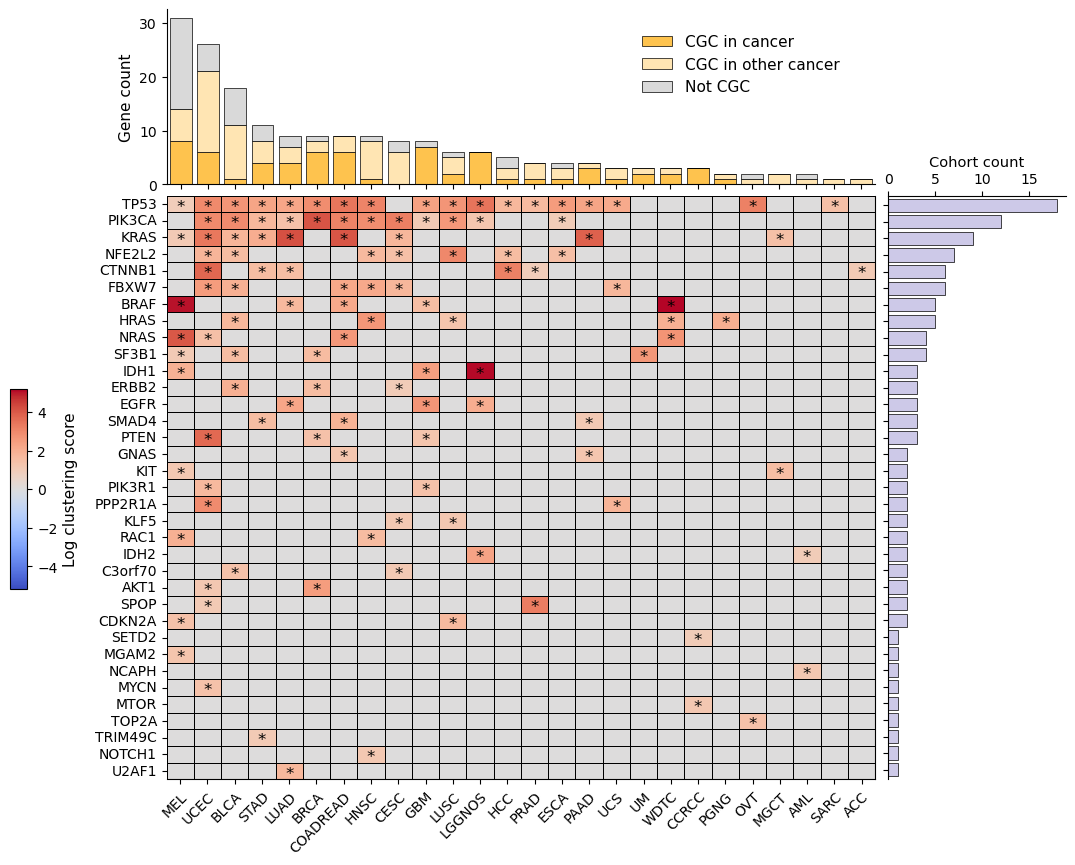

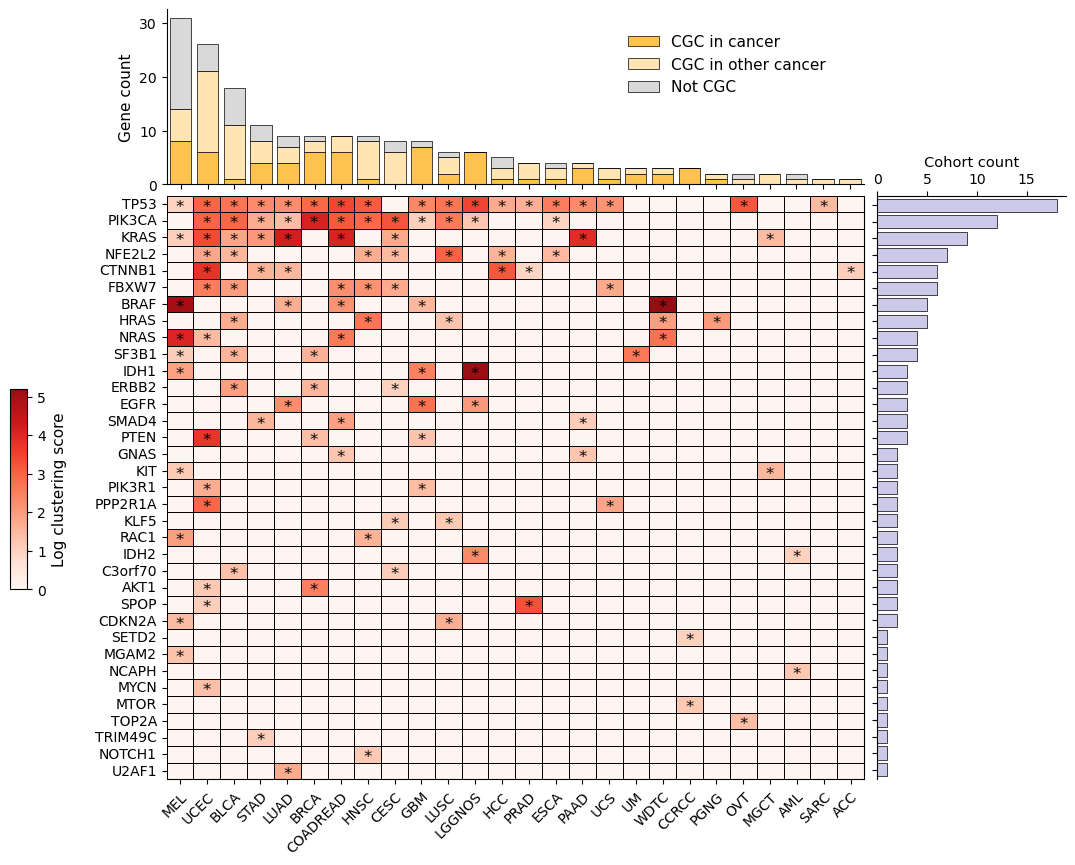

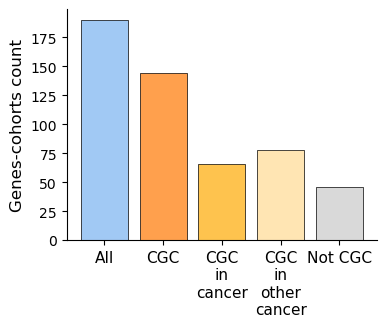

In [622]:
top_cohorts_n=None
top_genes_n=35

o3d_output = get_anomaly_df(genetable_subset, o3d_output_dir)
anomaly_dict = {f"{gene}-{cohort}" : score for gene, cohort, score in zip(o3d_output["Gene"].values, 
                                                                          o3d_output["Cohort"].values, 
                                                                          o3d_output["Clustering_score"].values)}

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable_subset, 
                                                                                             cohort_df, 
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             anomaly_dict=anomaly_dict,
                                                                                             cgc_specific=True,
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict)

df_anomaly.columns = [cohort.split("_")[2] for cohort in df_anomaly.columns]
gene_colors, lut = get_gene_annotation(df_binary, genetable)

plot_landscape(df=df_binary, 
               gene_colors=gene_colors, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               lut=lut, 
               df_anomaly=df_anomaly,
               figsize=(11.6,10),
               width_ratios=[1, 0.25],
               height_ratios=[0.3, 1],
               legend_box=(-0.2, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               wspace=0.03, 
               hspace=0.03,
               divergent_palette=True,
               plot_cgc_specific=True)

plot_landscape(df=df_binary, 
               gene_colors=gene_colors, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               lut=lut, 
               df_anomaly=df_anomaly,
               figsize=(11.6,10),
               width_ratios=[1, 0.27],
               height_ratios=[0.3, 1],
               legend_box=(-0.2, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               wspace=0.03, 
               hspace=0.03,
               filename="landscape_heatmap_tcga.png",
               plot_cgc_specific=True)


# Get summary CGC hits across genetable
plot_o3d_cgc_hits(hits_df)

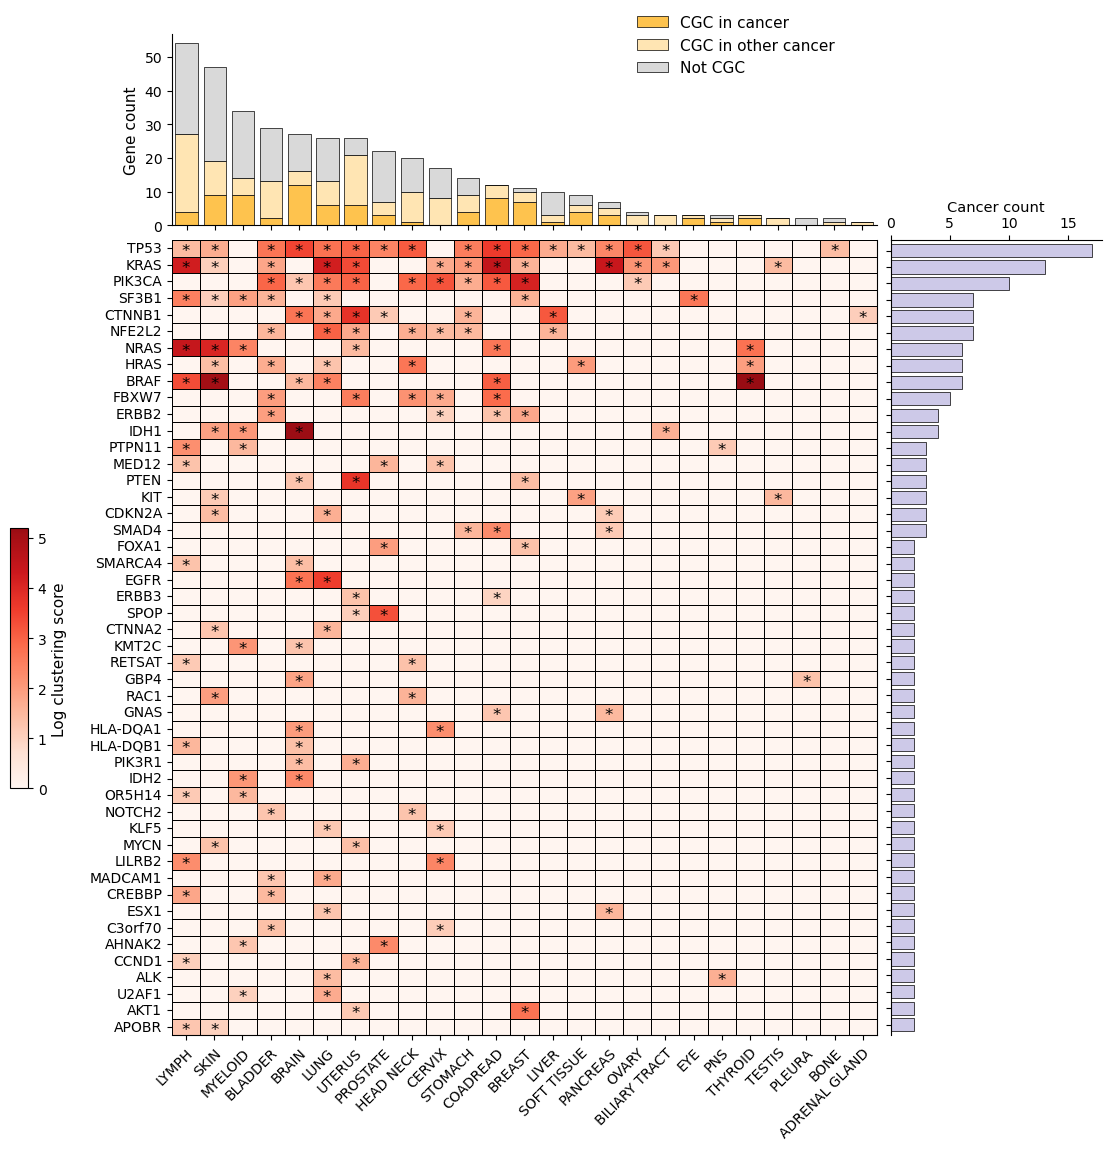

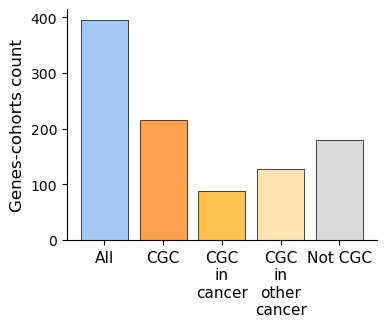

In [623]:
top_cohorts_n=None
top_genes_n=48 

o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output = o3d_output.merge(cohort_df.rename(columns={"COHORT" : "Cohort"})[["Cohort", "GENERAL_CANCER_TYPE"]], on="Cohort")
o3d_output = o3d_output[["GENERAL_CANCER_TYPE", 'Gene', "Clustering_score"]].groupby(["GENERAL_CANCER_TYPE", 'Gene']).max().reset_index()

anomaly_dict = {f"{gene}-{cancer}" : score for gene, cancer, score in zip(o3d_output["Gene"].values, 
                                                                          o3d_output["GENERAL_CANCER_TYPE"].values, 
                                                                          o3d_output["Clustering_score"].values)}

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                             cohort_df, 
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             anomaly_dict=anomaly_dict,
                                                                                             cgc_specific=True,
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_cancer=True)

df_anomaly.columns = [cancer.replace("_", " ") for cancer in df_anomaly.columns]
gene_colors, lut = get_gene_annotation(df_binary, genetable)

# Landscape
plot_landscape(df=df_binary, 
               gene_colors=gene_colors, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               lut=lut, 
               df_anomaly=df_anomaly,
               figsize=(12,13),
               width_ratios=[1, 0.3],
               height_ratios=[0.24, 1],
               legend_box=(-0.2, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               wspace=0.03, 
               hspace=0.03,
               plot_cgc_specific=True,
               right_ax_ylabel="Cancer count")
    

# Get summary CGC hits across genetable
plot_o3d_cgc_hits(hits_df)

### Annotated landscape with fixed gene sorting

In [1042]:
def get_gene_cohorts_binary(genetable_df, 
                            cohort_df, 
                            o3d_output_dir,
                            top_cohorts_n=None, 
                            top_genes_n=None, 
                            rm_empty_cols=True,
                            log_score=True,
                            cgc_df=None, 
                            cohorts_parent_dict=None,
                            grouped_by_cancer=False,
                            sort_by_score_only=False):

    # Get hits df and clustering score info
    hits_df = get_hits(genetable_df)
    o3d_output = get_anomaly_df(genetable_df, o3d_output_dir)

    # Count by general cancer
    if grouped_by_cancer:
        o3d_output = o3d_output.merge(cohort_df.rename(columns={"COHORT" : "Cohort"})[["Cohort", "GENERAL_CANCER_TYPE"]], on="Cohort")
        o3d_output = o3d_output[["GENERAL_CANCER_TYPE", 'Gene', "Clustering_score"]].groupby(["GENERAL_CANCER_TYPE", 'Gene']).max().reset_index()
        anomaly_dict = {f"{gene}-{cancer}" : score for gene, cancer, score in zip(o3d_output["Gene"].values, 
                                                                                  o3d_output["GENERAL_CANCER_TYPE"].values, 
                                                                                  o3d_output["Clustering_score"].values)}
        max_score_df = o3d_output.groupby("Gene").max().reset_index().sort_values("Clustering_score", ascending=False)
        target_col = "General_cancer"
        
    # Count by cohort
    else:
        o3d_output = get_anomaly_df(genetable_df, o3d_output_dir)
        anomaly_dict = {f"{gene}-{cohort}" : score for gene, cohort, score in zip(o3d_output["Gene"].values, 
                                                                                  o3d_output["Cohort"].values, 
                                                                                  o3d_output["Clustering_score"].values)}
        max_score_df = o3d_output.groupby("Gene").max().reset_index().sort_values("Clustering_score", ascending=False)
        target_col = "Cohort"

    hits_df = get_cgc_specific(hits_df, cgc_df, cohorts_tissue_parent_dict)
    cols_to_drop = ["Uniprot_ID", "Cancer", "Fish"]
    if grouped_by_cancer:
        cols_to_drop.append("Cohort")
    hits_df = hits_df.drop(columns=cols_to_drop).drop_duplicates().reset_index(drop=True)
    
    # Get count of cancer a gene has been detected as significant across all cohorts
    gene_hits_count = hits_df.groupby("Gene").apply(lambda x: len(x)).reset_index(name="Oncodrive3D")
    gene_hits_count = gene_hits_count.merge(max_score_df[["Gene", "Clustering_score"]], on="Gene", how="left")
    if sort_by_score_only:
        gene_hits_count = gene_hits_count.sort_values('Clustering_score', ascending=False).set_index("Gene")
    else:
        gene_hits_count = gene_hits_count.sort_values(by=['Oncodrive3D', 'Clustering_score'], ascending=[False, False]).set_index("Gene")
    # For a general cancer type get the number of unique CGC genes in that cancer, other cancer, not CGC
    cohort_hits_count = hits_df.groupby(target_col).apply(lambda x: get_cgc_specific_count_for_ttype(x)).sort_values("Oncodrive3D", ascending=False)
    
    if top_genes_n is None:
        top_genes_n = len(gene_hits_count)
    if top_cohorts_n is None:
        top_cohorts_n = len(cohort_hits_count)
    top_genes = gene_hits_count[:top_genes_n].index
    top_cohorts = cohort_hits_count[:top_cohorts_n].index

    # Get df anomaly and binary
    df_anomaly = pd.DataFrame(0, index=top_cohorts, columns=top_genes)
    df_binary = pd.DataFrame(0, index=top_cohorts, columns=top_genes)
    for cohort in top_cohorts:
        genes = hits_df[hits_df[target_col] == cohort].Gene.values
        genes = [gene for gene in genes if gene in df_anomaly.columns]
        # Df anomaly
        scores = [np.log(anomaly_dict[f"{gene}-{cohort}"]) if log_score else anomaly_dict[f"{gene}-{cohort}"] for gene in genes]    
        df_anomaly.loc[cohort, genes] = scores
        # Df binary
        df_binary.loc[cohort, genes] = 1

    df_anomaly = df_anomaly.T 
    df_binary = df_binary.T 
    if len(cohort_df) == 1:
        df_anomaly = df_anomaly.loc[hits_df.Gene]
        df_binary = df_binary.loc[hits_df.Gene]
        
    if rm_empty_cols:
        df_anomaly = df_anomaly.loc[:, ~(df_anomaly == 0).all()]
        df_binary = df_binary.loc[:, ~(df_binary == False).all()]

    gene_hits_count = gene_hits_count.loc[df_anomaly.index]
    cohort_hits_count = cohort_hits_count.loc[[cohort for cohort in cohort_hits_count.index if cohort in df_anomaly.columns]]

    return df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count


def plot_landscape(df, 
                   gene_colors, 
                   lut, 
                   gene_hits_count, 
                   cohort_hits_count,
                   colors_dict,
                   names_dict,
                   annot_df,
                   df_anomaly=None,
                   figsize=(16,14),
                   width_ratios=[1, 0.2],
                   height_ratios=[0.3, 1],
                   legend_box=(-5.5, 1.1),
                   ax1_margin=0.005,
                   ax4_margin=0.005,
                   ax6_margin=0.018,
                   ax6_xmargin=0.07,
                   wspace=0.02, 
                   hspace=0.05,
                   cbar_loc=[-0.01, 0.3, 0.015, .2],
                   intogen_label=False,
                   intogen_label_table=None,
                   filename=None,
                   divergent_palette=False,
                   color_gene=False,
                   plot_cgc_specific=False,
                   right_ax_ylabel="Cohort count"):
    
    if df_anomaly is not None:
        df_binary = df
        df = df_anomaly
        cmap = "vlag"
        cmap = create_custom_colormap()
    else:
        colors = ["lightgray", "gray"] 
        cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))
    if divergent_palette:
        cmap = sns.color_palette("coolwarm", as_cmap=True)
    
    # Define the row and column labels
    row_labels = df.index
    col_labels = df.columns
    #col_labels = [ctype_dict[cohort] for cohort  in col_labels]
    
    gene_sums = gene_hits_count["Oncodrive3D"].values
    cohort_sums = cohort_hits_count["Oncodrive3D"].values
    
    if plot_cgc_specific:
        cgc_specific = cohort_hits_count["CGC_specific"].values
        cgc_not_specific = cohort_hits_count["CGC_not_specific"].values
        not_cgc = cohort_hits_count["Not_CGC"].values  
    else:
        cgc = cohort_hits_count["CGC"].values
        not_cgc = cohort_hits_count["Not_CGC"].values
    
    # Create a figure with a grid layout for heatmap and bars
    fig, ax = plt.subplots(2, 4, 
                           figsize=figsize, 
                           gridspec_kw={'width_ratios': width_ratios, 'height_ratios': height_ratios})
    ax1 = ax[0,0]
    ax2 = ax[0,1]
    ax3 = ax[1,0]
    ax4 = ax[1,3]
    ax5 = ax[0,2]
    ax6 = ax[1,1]
    ax7 = ax[0,3]
    ax8 = ax[1,2]
    
    # Create the heatmap
    if df_anomaly is not None and divergent_palette:
        vmax = df_anomaly.max().max()
        vmin = -vmax
    else:
        vmax, vmin = None, None
    sns.heatmap(df, annot=False, cmap=cmap, cbar=False, xticklabels=col_labels, yticklabels=row_labels, ax=ax3, lw=0.5, 
                linecolor="black", vmax=vmax, vmin=vmin)
    ax3.set_xticklabels(col_labels, rotation=45, rotation_mode="anchor", ha='right') 
    ax3.set_xlabel("Cohort")
    ax3.set_ylabel("Gene")
    ax3.set_xlabel("")
    ax3.set_ylabel("")
    ax3.spines['bottom'].set_visible(True)
    ax3.spines['right'].set_visible(True)
    
    # Add bars for the right axis
    ax4.barh(np.arange(len(gene_sums)), gene_sums, color='#cdc9e8', edgecolor="black", lw=0.5)
    ax4.set_yticks(np.arange(len(gene_sums)))
    ax4.set_yticklabels([])
    ax4.set_xlabel(right_ax_ylabel, fontsize=10.5)
    ax4.invert_yaxis()
    
    ax4.xaxis.tick_top()
    ax4.xaxis.set_label_position('top')
    ax4.spines['bottom'].set_visible(False)
    ax4.spines['right'].set_visible(False)


    # Add annotation track
    # ====================
    lst_dbs = ["cgc", "oncokb", "msk_impact", "fondone", "vogelstein", "intogen"]
    lst_methods = ["hotmaps", "clustl", "smreg", "cbase", "dndscv", "mutpan", "fml"]
    
    genes = annot_df['Gene']
    annot_methods_df = annot_df.copy()[lst_methods]
    annot_df = annot_df[lst_dbs]
    
    # Loop through each column
    indices = annot_df.index.tolist()
    ax6.scatter([0] * len(indices), indices, color="white")
    for j, col in enumerate(annot_df.columns):
        # Get the indices where the value is 1
        indices = annot_df.index[annot_df[col] == 1].tolist()
        ax6.scatter([j] * len(indices), indices, color=colors_dict[names_dict[col]])
    
    ax6.set_yticks(np.arange(len(gene_sums)))
    ax6.set_yticklabels([])
    ax6.set_xticks(range(len(annot_df.columns)))
    ax6.set_xticklabels([names_dict[col] for col in annot_df.columns], rotation=45, rotation_mode="anchor", ha='left') 
    # ax6.set_xlabel("Annotation", fontsize=10.5)
    ax6.invert_yaxis()
    ax6.xaxis.tick_top()
    ax6.xaxis.set_label_position('top')


    # Annotation Intogen methods
    # ==========================
    
    # Loop through each column
    indices = annot_methods_df.index.tolist()
    ax8.scatter([0] * len(indices), indices, color="white")
    for j, col in enumerate(annot_methods_df.columns):
        indices = annot_methods_df.index[annot_methods_df[col] == 1].tolist()
        ax8.scatter([j] * len(indices), indices, color=colors_dict[names_dict[col]])
    
    ax8.set_yticks(np.arange(len(gene_sums)))
    ax8.set_yticklabels([])
    ax8.set_xticks(range(len(annot_methods_df.columns)))
    ax8.set_xticklabels([names_dict[col] for col in annot_methods_df.columns], rotation=45, rotation_mode="anchor", ha='left') 
    
    # ax6.set_xlabel("Annotation", fontsize=10.5)
    ax8.invert_yaxis()
    
    ax8.xaxis.tick_top()
    ax8.xaxis.set_label_position('top')

    
    # Add bars for the top axis 
    # =========================

    if plot_cgc_specific: 
        ax1.bar(np.arange(len(cohort_hits_count)), cgc_specific, 
                color="#fec34e", edgecolor='black', label='CGC in cancer', lw=0.5)
        ax1.bar(np.arange(len(cohort_hits_count)), cgc_not_specific, bottom=cgc_specific, 
                color="#ffe5b3", edgecolor='black', label='CGC in other cancer', lw=0.5)
        ax1.bar(np.arange(len(cohort_hits_count)), not_cgc, bottom=np.array(cgc_specific) + np.array(cgc_not_specific), 
                color="#d9d9d9", edgecolor='black', label='Not CGC', lw=0.5)
    else:
        ax1.bar(np.arange(len(cohort_hits_count)), cgc, color="#ffbb80", edgecolor='black', label='CGC', lw=0.5)
        ax1.bar(np.arange(len(cohort_hits_count)), cgc_specific, bottom=cgc, color="#d9d9d9", edgecolor='black', label='Not CGC', lw=0.5)
    ax1.set_xticks(np.arange(len(cohort_sums)))
    ax1.set_ylabel("Gene count", fontsize=11)
    ax1.set_xticklabels([])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    
    # Details
    # =======
    
    ax2.remove()
    ax5.remove()
    ax7.remove()
    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    ax1.margins(x=ax1_margin, tight=True)
    ax4.margins(y=ax4_margin, tight=True)
    ax6.margins(y=ax6_margin, x=ax6_xmargin, tight=True)
    ax8.margins(y=ax6_margin, x=ax6_xmargin, tight=True)
    
    handles, labels = ax3.get_legend_handles_labels()
    if intogen_label:
        handles.append(mpatches.Patch(facecolor=lut["Detected"], edgecolor="black", label='Detected', lw=0.5))
        handles.append(mpatches.Patch(facecolor=lut["Not detected"], edgecolor="black", label="Not detected", lw=0.5))
        legend = plt.legend(handles=handles, bbox_to_anchor=legend_box, frameon=False, 
                            title="Detected in IntOGen", title_fontsize=11, fontsize=11)
    elif plot_cgc_specific:
        handles.append(mpatches.Patch(facecolor="#fec34e", edgecolor="black", label='CGC in cancer', lw=0.5))
        handles.append(mpatches.Patch(facecolor="#ffe5b3", edgecolor="black", label="CGC in other cancer", lw=0.5))
        handles.append(mpatches.Patch(facecolor="#d9d9d9", edgecolor="black", label="Not CGC", lw=0.5))
        legend = plt.legend(handles=handles, bbox_to_anchor=legend_box, frameon=False, fontsize=11)
    else:
        handles.append(mpatches.Patch(facecolor="#ffbb80", edgecolor="black", label='CGC', lw=0.5))
        handles.append(mpatches.Patch(facecolor="#d9d9d9", edgecolor="black", label="Not CGC", lw=0.5))
        legend = plt.legend(handles=handles, bbox_to_anchor=legend_box, frameon=False, fontsize=11)
    if color_gene:
        for i, label in enumerate(ax3.get_yticklabels()):
            label.set_color(gene_colors[i])
        for text in legend.get_texts():
            text.set_color(lut[text.get_text()])
    
    if df_anomaly is not None:
        # Cbar
        cbar_ax = fig.add_axes(cbar_loc) 
        cbar = fig.colorbar(ax3.collections[0], cax=cbar_ax)
        cbar.set_label('Log clustering score', fontsize=11) 
        
        # Overlay stars on top of the heatmap
        for i in range(len(row_labels)):
            for j in range(len(col_labels)):
                if df_binary.iloc[i, j] == 1:
                    ax3.text(j + 0.5, i + 0.65, '*', ha='center', va='center', fontsize=12, color='black')
           
        # Overlay ^ for IntOGen hits
        if intogen_label_table is not None:   
            for i in range(len(row_labels)):
                for j in range(len(col_labels)):
                    if intogen_label_table.iloc[i, j] == 1:
                        ax3.text(j + 0.5, i + 0.65, '^', ha='center', va='top', fontsize=12, color='black')

    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()


def get_annot_gene_df(genes_lst,
                      genetable_df,
                      intogen_drivers_df, 
                      oncokb_df, 
                      cgc_df, 
                      alpha = 0.01,
                      lst_methods = ["hotmaps", "clustl", "smreg", "cbase", "dndscv", "mutpan", "fml"]):

    genes = pd.Series(genes_lst)
    
    unique_hits_dict = {}
    unique_hits_dict["cgc"] = cgc_df["Gene Symbol"].values
    unique_hits_dict["oncokb"] = oncokb_df.loc[oncokb_df["OncoKB Annotated"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["msk_impact"] = oncokb_df.loc[oncokb_df["MSK-IMPACT"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["msk_heme"] = oncokb_df.loc[oncokb_df["MSK-HEME"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["fondone"] = oncokb_df.loc[oncokb_df["FOUNDATION ONE"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["fondone_heme"] = oncokb_df.loc[oncokb_df["FOUNDATION ONE HEME"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["vogelstein"] = oncokb_df.loc[oncokb_df["Vogelstein"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["intogen"] = intogen_drivers_df.SYMBOL.values
    
    # Get unique hits for each method in Intogen and O3D
    for method in lst_methods:
        unique_hits_dict[method] = genetable_df[genetable_df[f"{method}_qval"] < alpha].Gene.unique()
    
    # Get df
    annot_df = {}
    annot_df["Gene"] = genes
    for annot in unique_hits_dict.keys():
        annot_df[annot] = genes.isin(unique_hits_dict[annot]).astype(int)
    
    return pd.DataFrame(annot_df)

In [1043]:
colors_dict = {"Oncodrive3D" : "#ffad48", 
              "HotMAPS" : "#024b79", 
              "OncodriveCLUSTL" : "#43b7c2", 
              "smRegions" : "#c2f1ce", 
              "CBaSE" : "#ffb8b3", 
              "SEISMIC" : "#ede5ff", 
              "dNdScv" : "#edd7c5", 
              "MutPanning" : "#cee4d8", 
              "OncodriveFML" : "#bbd9f6",
              "IntOGen" : "#A6D854",
              "OncoKB" : "#66C2A5",
              "CGC" : "#FFA04D",
              "MSK-IMPACT" : "#FB9A99",
              "MSK-IMPACT Heme" : "#E31A1C",
              "FoundationOne" : "#CAB2D6",
              "FoundationOne Heme" : "#6A3D9A",
              "Vogelstein" : "#E5C494"}

names_dict = {"o3d" : "Oncodrive3D", 
             "hotmaps" : "HotMAPS", 
             "clustl" : "OncodriveCLUSTL", 
             "smreg" : "smRegions", 
             "cbase" : "CBaSE", 
             "seismic" : "SEISMIC", 
             "dndscv" : "dNdScv", 
             "mutpan" : "MutPanning", 
             "fml" : "OncodriveFML",
             "intogen" : "IntOGen",
             "oncokb" : "OncoKB",
             "cgc" : "CGC",
             "msk_impact" : "MSK-IMPACT",
             "msk_heme" : "MSK-IMPACT Heme",
             "fondone" : "FoundationOne",
             "fondone_heme" : "FoundationOne Heme", 
             "vogelstein" : "Vogelstein"}

annot_cols = ["Gene", 
              "cgc", 
              "oncokb", 
              "msk_impact", 
              "fondone", 
              "vogelstein", 
              "intogen", 
              "hotmaps", 
              "clustl", 
              "smreg", 
              "cbase",
              "dndscv", 
              "mutpan", 
              "fml"]

/tmp/jobs/spellegrini/9964934/ipykernel_20268/917191271.py:33: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  max_score_df = o3d_output.groupby("Gene").max().reset_index().sort_values("Clustering_score", ascending=False)


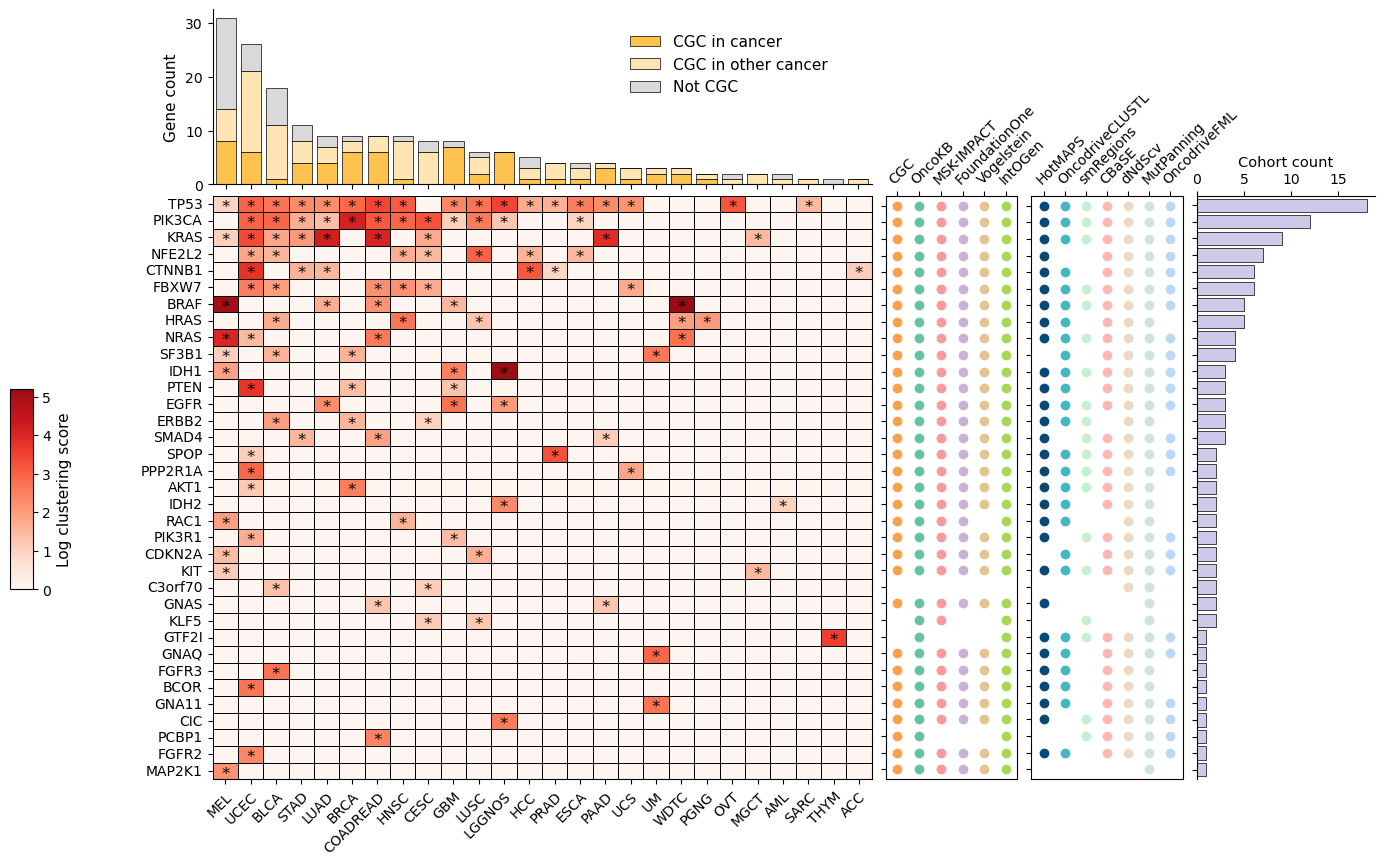

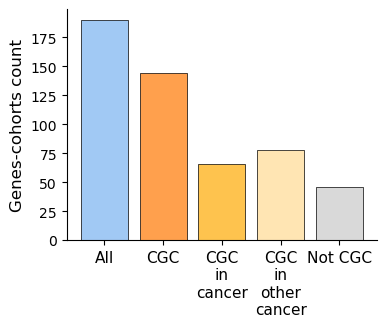

In [626]:
top_cohorts_n=None
top_genes_n=35

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable_subset, 
                                                                                             cohort_df, 
                                                                                             o3d_output_dir=o3d_output_dir,
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_cancer=False)

df_anomaly.columns = [cohort.split("_")[2] for cohort in df_anomaly.columns]
annot_df = get_annot_gene_df(df_binary.index, genetable_subset, uniq_drivers_df, oncokb_df, cgc_df)

plot_landscape(df=df_binary, 
               gene_colors=gene_colors, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               lut=lut, 
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(15,10),
               width_ratios=[1, 0.2, 0.23, 0.27],
               height_ratios=[0.3, 1],
               legend_box=(-2, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_xmargin=0.1,
               wspace=0.05, 
               hspace=0.03,
               filename="landscape_heatmap_tcga.png",
               plot_cgc_specific=True)


# Get summary CGC hits across genetable
plot_o3d_cgc_hits(hits_df)

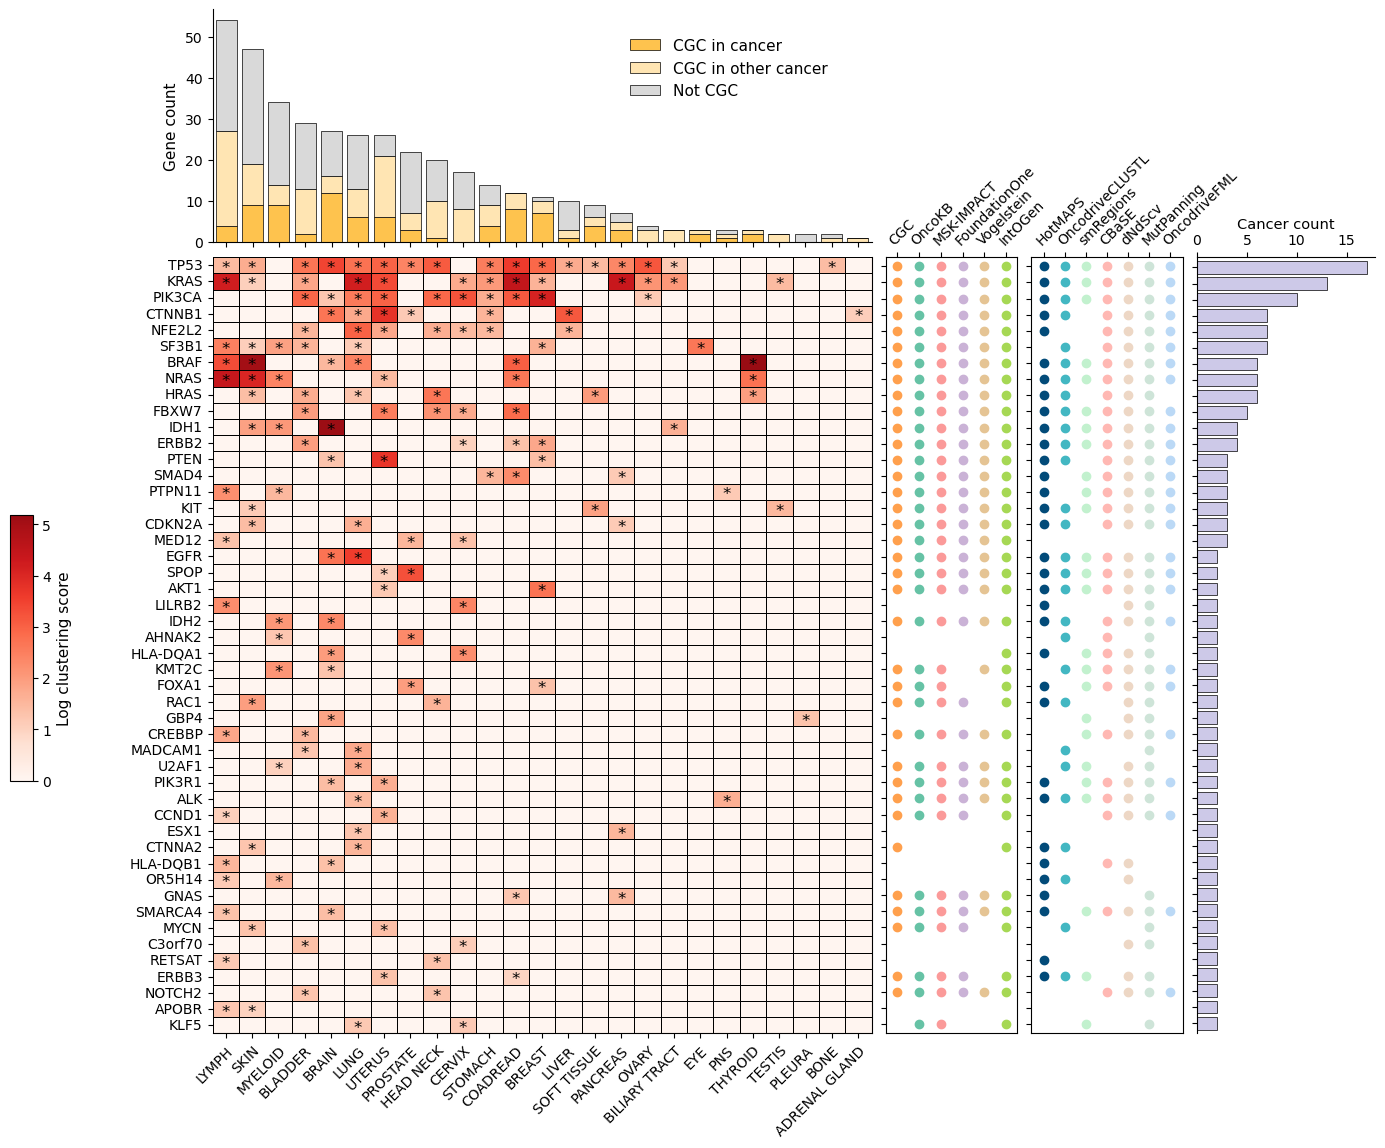

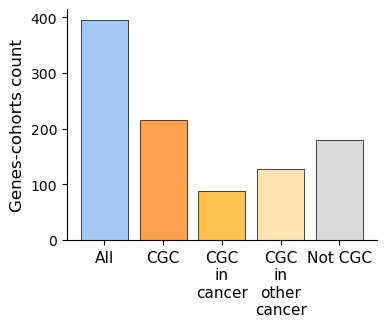

In [627]:
top_cohorts_n=None
top_genes_n=48

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                             cohort_df, 
                                                                                             o3d_output_dir=o3d_output_dir,
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_cancer=True)

df_anomaly.columns = [cancer.replace("_", " ") for cancer in df_anomaly.columns]
gene_colors, lut = get_gene_annotation(df_binary, genetable)
annot_df = get_annot_gene_df(df_binary.index, genetable, uniq_drivers_df, oncokb_df, cgc_df)[annot_cols]

plot_landscape(df=df_binary, 
               gene_colors=gene_colors, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               lut=lut, 
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(15,13.3),
               width_ratios=[1, 0.2, 0.23, 0.27],
               height_ratios=[0.3, 1],
               legend_box=(-2, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_margin=0.012,
               ax6_xmargin=0.1,
               wspace=0.05, 
               hspace=0.03,
               plot_cgc_specific=True,
               right_ax_ylabel="Cancer count",
               filename="landscape_heatmap.png",)

# Get summary CGC hits across genetable
plot_o3d_cgc_hits(hits_df)

### Sort by max score and add max score track

In [1048]:
def plot_landscape(df, 
                   gene_hits_count, 
                   cohort_hits_count,
                   colors_dict,
                   names_dict,
                   annot_df,
                   df_anomaly=None,
                   figsize=(15,14),
                   width_ratios=[1, 0.2],
                   height_ratios=[0.3, 1],
                   legend_box=(-5.5, 1.1),
                   ax1_margin=0.005,
                   ax4_margin=0.005,
                   ax6_margin=0.018,
                   ax6_xmargin=0.07,
                   wspace=0.02, 
                   hspace=0.05,
                   cbar_loc=[-0.01, 0.3, 0.015, .2],
                   intogen_label=False,
                   intogen_label_table=None,
                   filename=None,
                   plot_max_score=False,
                   right_ax_ylabel="Cohort count"):
    

    df_binary = df
    df = df_anomaly
    cmap = create_custom_colormap()
    
    # Define the row and column labels
    row_labels = df.index
    col_labels = df.columns
    #col_labels = [ctype_dict[cohort] for cohort  in col_labels]
    
    gene_sums = gene_hits_count["Oncodrive3D"].values
    cohort_sums = cohort_hits_count["Oncodrive3D"].values
    
    cgc_specific = cohort_hits_count["CGC_specific"].values
    cgc_not_specific = cohort_hits_count["CGC_not_specific"].values
    not_cgc = cohort_hits_count["Not_CGC"].values  

    ncols = 5 if plot_max_score else 4
    
    # Create a figure with a grid layout for heatmap and bars
    fig, ax = plt.subplots(2, ncols, 
                           figsize=figsize, 
                           gridspec_kw={'width_ratios': width_ratios, 'height_ratios': height_ratios})
    ax1 = ax[0,0]
    ax2 = ax[0,1]
    ax3 = ax[1,0]
    ax4 = ax[1,3]
    ax5 = ax[0,2]
    ax6 = ax[1,1]
    ax7 = ax[0,3]
    ax8 = ax[1,2]
    ax9 = ax[0,4] if plot_max_score else None
    ax10 = ax[1,4] if plot_max_score else None
    
    # Create the heatmap
    sns.heatmap(df, annot=False, cmap=cmap, cbar=False, xticklabels=col_labels, yticklabels=row_labels, ax=ax3, lw=0.5, 
                linecolor="black")
    ax3.set_xticklabels(col_labels, rotation=45, rotation_mode="anchor", ha='right') 
    ax3.set_xlabel("Cohort")
    ax3.set_ylabel("Gene")
    ax3.set_xlabel("")
    ax3.set_ylabel("")
    ax3.spines['bottom'].set_visible(True)
    ax3.spines['right'].set_visible(True)

    
    # Add counts of cohort or cancer for each gene
    # ============================================
    
    ax4.barh(np.arange(len(gene_sums)), gene_sums, color='#cdc9e8', edgecolor="black", lw=0.5)
    ax4.set_yticks(np.arange(len(gene_sums)))
    ax4.set_yticklabels([])
    ax4.set_xlabel(right_ax_ylabel, fontsize=10.5)
    ax4.invert_yaxis()
    
    ax4.xaxis.tick_top()
    ax4.xaxis.set_label_position('top')
    ax4.spines['bottom'].set_visible(False)
    ax4.spines['right'].set_visible(False)

    
    # Add max score track
    # ===================
    max_scores = np.log(gene_hits_count["Clustering_score"])
    norm = Normalize(vmin=df_anomaly.min().min(), vmax=df_anomaly.max().max())
    colors = cmap(norm(max_scores))

    
    ax10.barh(np.arange(len(gene_sums)), max_scores, color=colors, edgecolor="black", lw=0.5)
    ax10.set_yticks(np.arange(len(gene_sums)))
    ax10.set_yticklabels([])
    ax10.set_xlabel("Max log\nclustering score", fontsize=10.5)
    ax10.invert_yaxis()
    
    ax10.xaxis.tick_top()
    ax10.xaxis.set_label_position('top')
    ax10.spines['bottom'].set_visible(False)
    ax10.spines['right'].set_visible(False)

    
    # Add annotation track
    # ====================
    lst_dbs = ["cgc", "oncokb", "msk_impact", "fondone", "vogelstein", "intogen"]
    lst_methods = ["hotmaps", "clustl", "smreg", "cbase", "dndscv", "mutpan", "fml"]
    
    genes = annot_df['Gene']
    annot_methods_df = annot_df.copy()[lst_methods]
    annot_df = annot_df[lst_dbs]
    
    # Loop through each column
    indices = annot_df.index.tolist()
    ax6.scatter([0] * len(indices), indices, color="white")
    for j, col in enumerate(annot_df.columns):
        # Get the indices where the value is 1
        indices = annot_df.index[annot_df[col] == 1].tolist()
        ax6.scatter([j] * len(indices), indices, color=colors_dict[names_dict[col]])
    
    ax6.set_yticks(np.arange(len(gene_sums)))
    ax6.set_yticklabels([])
    ax6.set_xticks(range(len(annot_df.columns)))
    ax6.set_xticklabels([names_dict[col] for col in annot_df.columns], rotation=45, rotation_mode="anchor", ha='left') 
    # ax6.set_xlabel("Annotation", fontsize=10.5)
    ax6.invert_yaxis()
    ax6.xaxis.tick_top()
    ax6.xaxis.set_label_position('top')


    # Annotation Intogen methods
    # ==========================
    
    # Loop through each column
    indices = annot_methods_df.index.tolist()
    ax8.scatter([0] * len(indices), indices, color="white")
    for j, col in enumerate(annot_methods_df.columns):
        indices = annot_methods_df.index[annot_methods_df[col] == 1].tolist()
        ax8.scatter([j] * len(indices), indices, color=colors_dict[names_dict[col]])
    
    ax8.set_yticks(np.arange(len(gene_sums)))
    ax8.set_yticklabels([])
    ax8.set_xticks(range(len(annot_methods_df.columns)))
    ax8.set_xticklabels([names_dict[col] for col in annot_methods_df.columns], rotation=45, rotation_mode="anchor", ha='left') 
    
    # ax6.set_xlabel("Annotation", fontsize=10.5)
    ax8.invert_yaxis()
    
    ax8.xaxis.tick_top()
    ax8.xaxis.set_label_position('top')

    
    # Add bars for the top axis 
    # =========================

    ax1.bar(np.arange(len(cohort_hits_count)), cgc_specific, 
            color="#fec34e", edgecolor='black', label='CGC in cancer', lw=0.5)
    ax1.bar(np.arange(len(cohort_hits_count)), cgc_not_specific, bottom=cgc_specific, 
            color="#ffe5b3", edgecolor='black', label='CGC in other cancer', lw=0.5)
    ax1.bar(np.arange(len(cohort_hits_count)), not_cgc, bottom=np.array(cgc_specific) + np.array(cgc_not_specific), 
            color="#d9d9d9", edgecolor='black', label='Not CGC', lw=0.5)

    ax1.set_xticks(np.arange(len(cohort_sums)))
    ax1.set_ylabel("Gene count", fontsize=11)
    ax1.set_xticklabels([])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    
    # Details
    # =======
    
    ax2.remove()
    ax5.remove()
    ax7.remove()
    if plot_max_score:
        ax9.remove()
    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    ax1.margins(x=ax1_margin, tight=True)
    ax4.margins(y=ax4_margin, tight=True)
    ax6.margins(y=ax6_margin, x=ax6_xmargin, tight=True)
    ax8.margins(y=ax6_margin, x=ax6_xmargin, tight=True)
    ax10.margins(y=ax4_margin, tight=True)
    
    handles, labels = ax3.get_legend_handles_labels()
    handles.append(mpatches.Patch(facecolor="#fec34e", edgecolor="black", label='CGC in cancer', lw=0.5))
    handles.append(mpatches.Patch(facecolor="#ffe5b3", edgecolor="black", label="CGC in other cancer", lw=0.5))
    handles.append(mpatches.Patch(facecolor="#d9d9d9", edgecolor="black", label="Not CGC", lw=0.5))
    legend = plt.legend(handles=handles, bbox_to_anchor=legend_box, frameon=False, fontsize=11)
    
    if df_anomaly is not None:
        # Cbar
        cbar_ax = fig.add_axes(cbar_loc) 
        cbar = fig.colorbar(ax3.collections[0], cax=cbar_ax)
        cbar.set_label('Log clustering score', fontsize=11) 
        
        # Overlay stars on top of the heatmap
        for i in range(len(row_labels)):
            for j in range(len(col_labels)):
                if df_binary.iloc[i, j] == 1:
                    ax3.text(j + 0.5, i + 0.65, '*', ha='center', va='center', fontsize=12, color='black')
           
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

#### TCGA

/tmp/jobs/spellegrini/9964934/ipykernel_20268/917191271.py:33: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  max_score_df = o3d_output.groupby("Gene").max().reset_index().sort_values("Clustering_score", ascending=False)


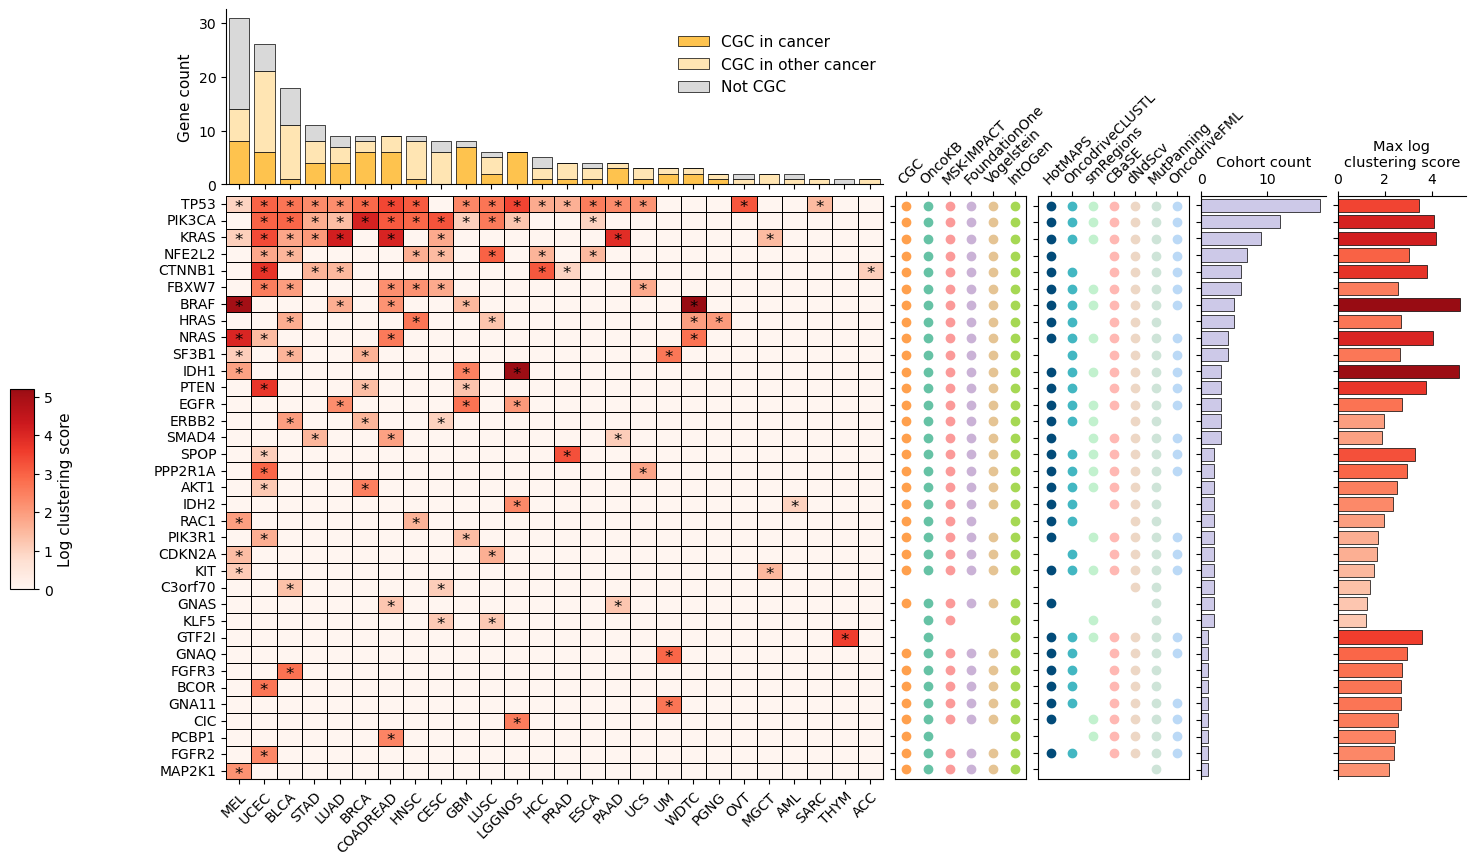

In [217]:
top_cohorts_n=None
top_genes_n=35
df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable_subset, 
                                                                                             cohort_df, 
                                                                                             o3d_output_dir=o3d_output_dir,
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_cancer=False,
                                                                                             sort_by_score_only=False)

df_anomaly.columns = [cohort.split("_")[2] for cohort in df_anomaly.columns]
annot_df = get_annot_gene_df(df_binary.index, genetable_subset, uniq_drivers_df, oncokb_df, cgc_df)

plot_landscape(df=df_binary, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(16,10),
               width_ratios=[1, 0.2, 0.23, 0.19, 0.195],
               height_ratios=[0.3, 1],
               legend_box=(-3.5, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_xmargin=0.1,
               wspace=0.05, 
               hspace=0.03,
               plot_max_score=True)

/tmp/jobs/spellegrini/9964934/ipykernel_20268/917191271.py:33: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  max_score_df = o3d_output.groupby("Gene").max().reset_index().sort_values("Clustering_score", ascending=False)


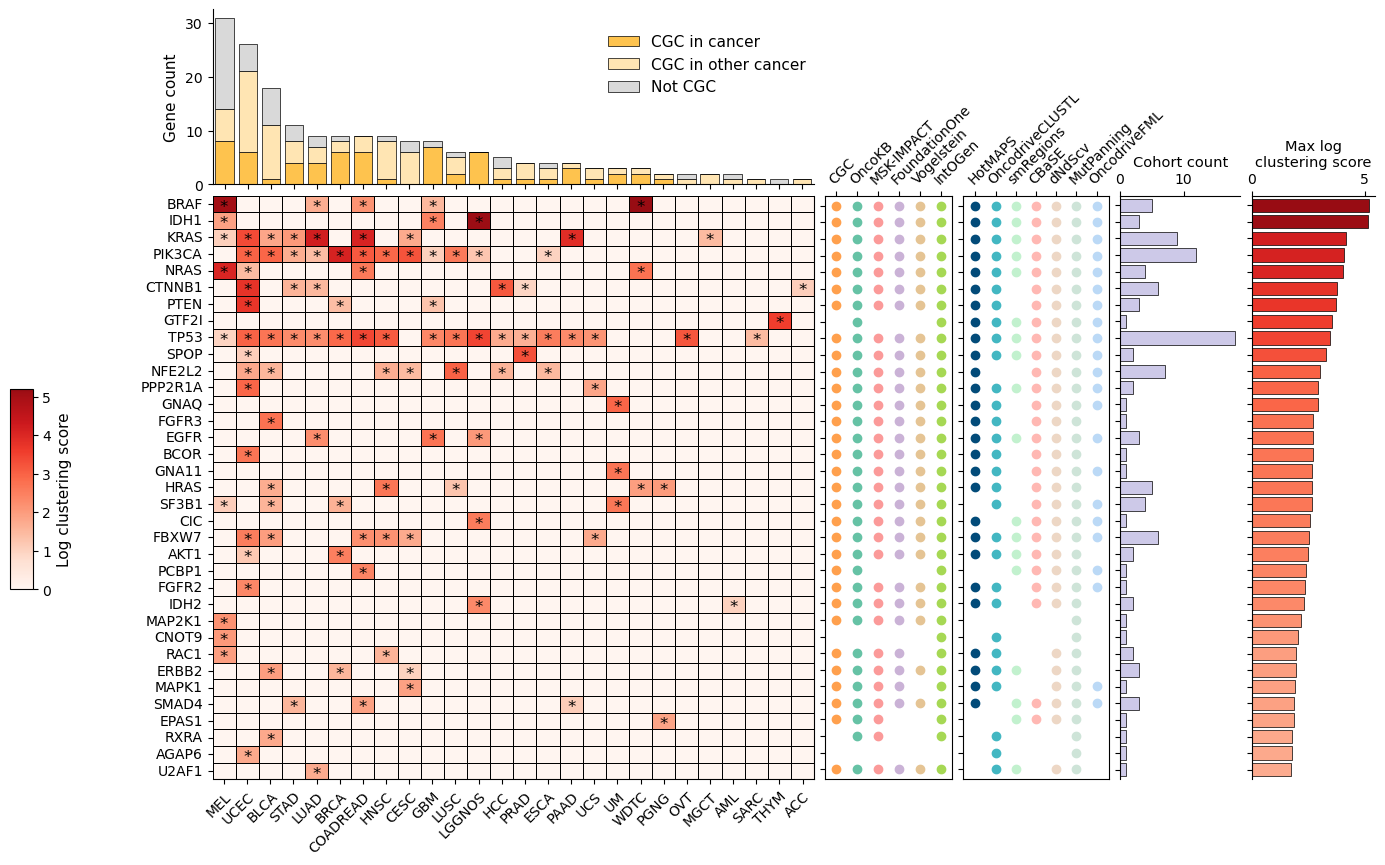

In [399]:
top_cohorts_n=None
top_genes_n=35

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable_subset, 
                                                                                             cohort_df, 
                                                                                             o3d_output_dir=o3d_output_dir,
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_cancer=False,
                                                                                             sort_by_score_only=True)

df_anomaly.columns = [cohort.split("_")[2] for cohort in df_anomaly.columns]
annot_df = get_annot_gene_df(df_binary.index, genetable_subset, uniq_drivers_df, oncokb_df, cgc_df)

plot_landscape(df=df_binary, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(15,10),
               width_ratios=[0.95, 0.2, 0.23, 0.19, 0.195],
               height_ratios=[0.3, 1],
               legend_box=(-3.5, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_xmargin=0.1,
               wspace=0.05, 
               hspace=0.03,
               plot_max_score=True)

#### All cohorts

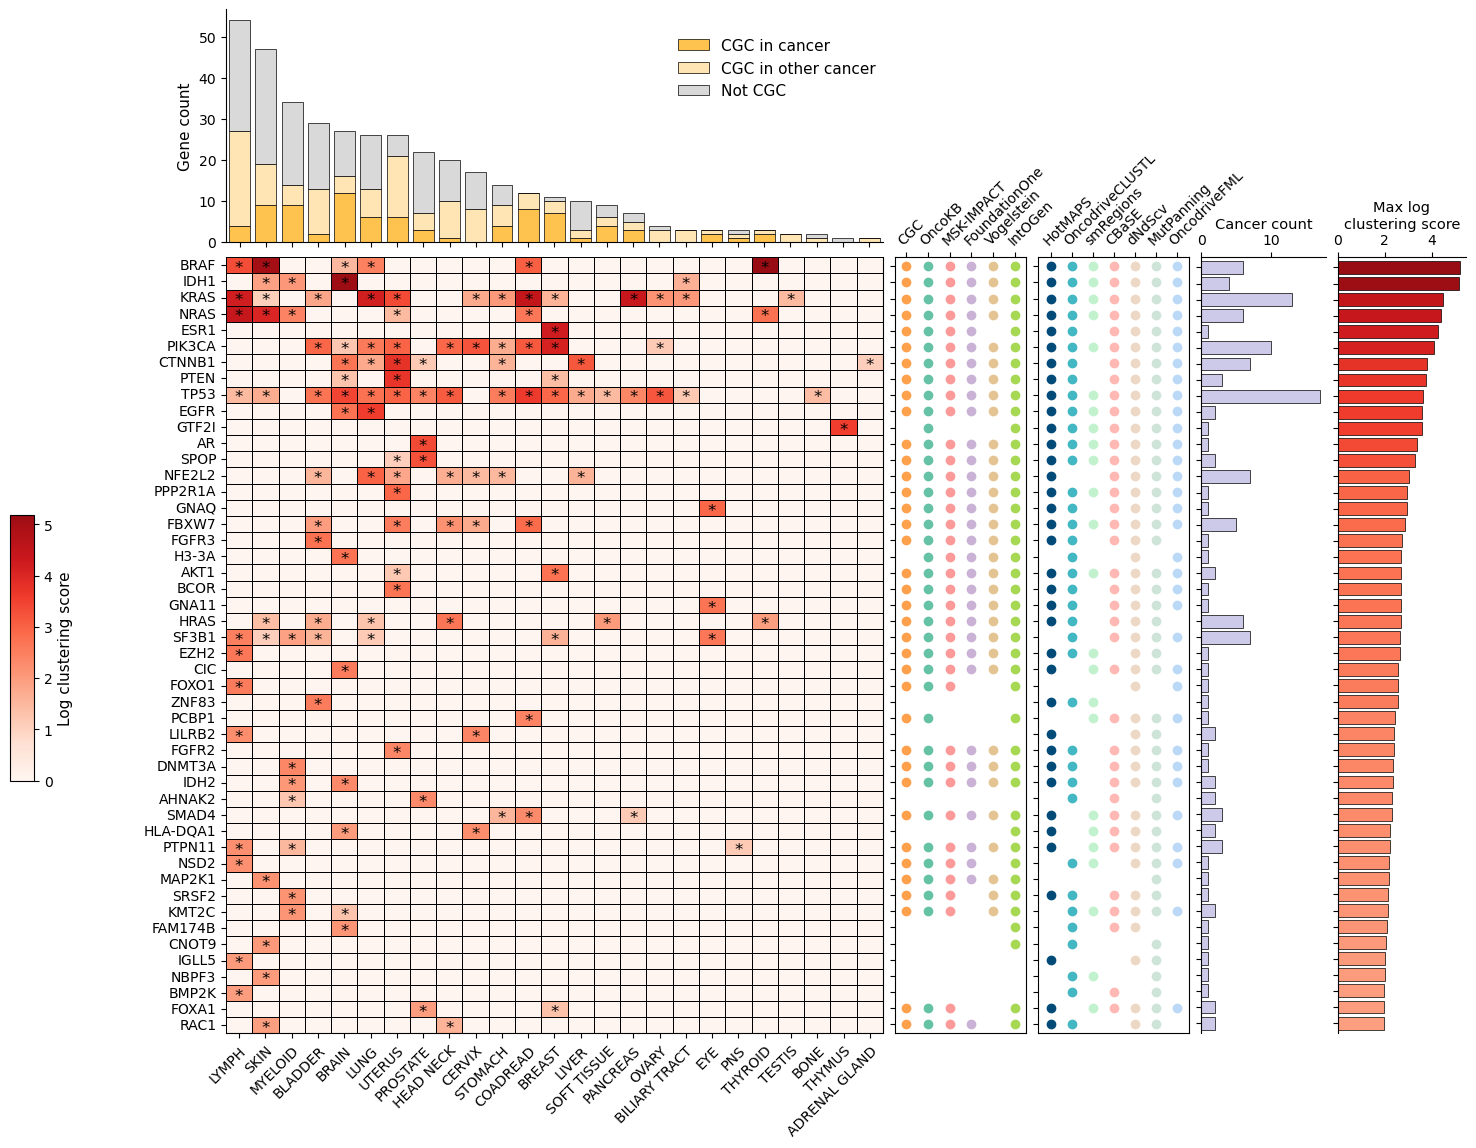

In [397]:
top_cohorts_n=None
top_genes_n=48

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                             cohort_df, 
                                                                                             o3d_output_dir=o3d_output_dir,
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_cancer=True,
                                                                                             sort_by_score_only=True)

df_anomaly.columns = [cancer.replace("_", " ") for cancer in df_anomaly.columns]
annot_df = get_annot_gene_df(df_binary.index, genetable, uniq_drivers_df, oncokb_df, cgc_df)

plot_landscape(df=df_binary, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(16,13.3),
               width_ratios=[1, 0.2, 0.23, 0.19, 0.195],
               height_ratios=[0.3, 1],
               legend_box=(-3.5, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_margin=0.012,
               ax6_xmargin=0.1,
               wspace=0.05, 
               hspace=0.03,
               plot_max_score=True,
               right_ax_ylabel="Cancer count",
               filename="landscape_heatmap_by_score.png",)

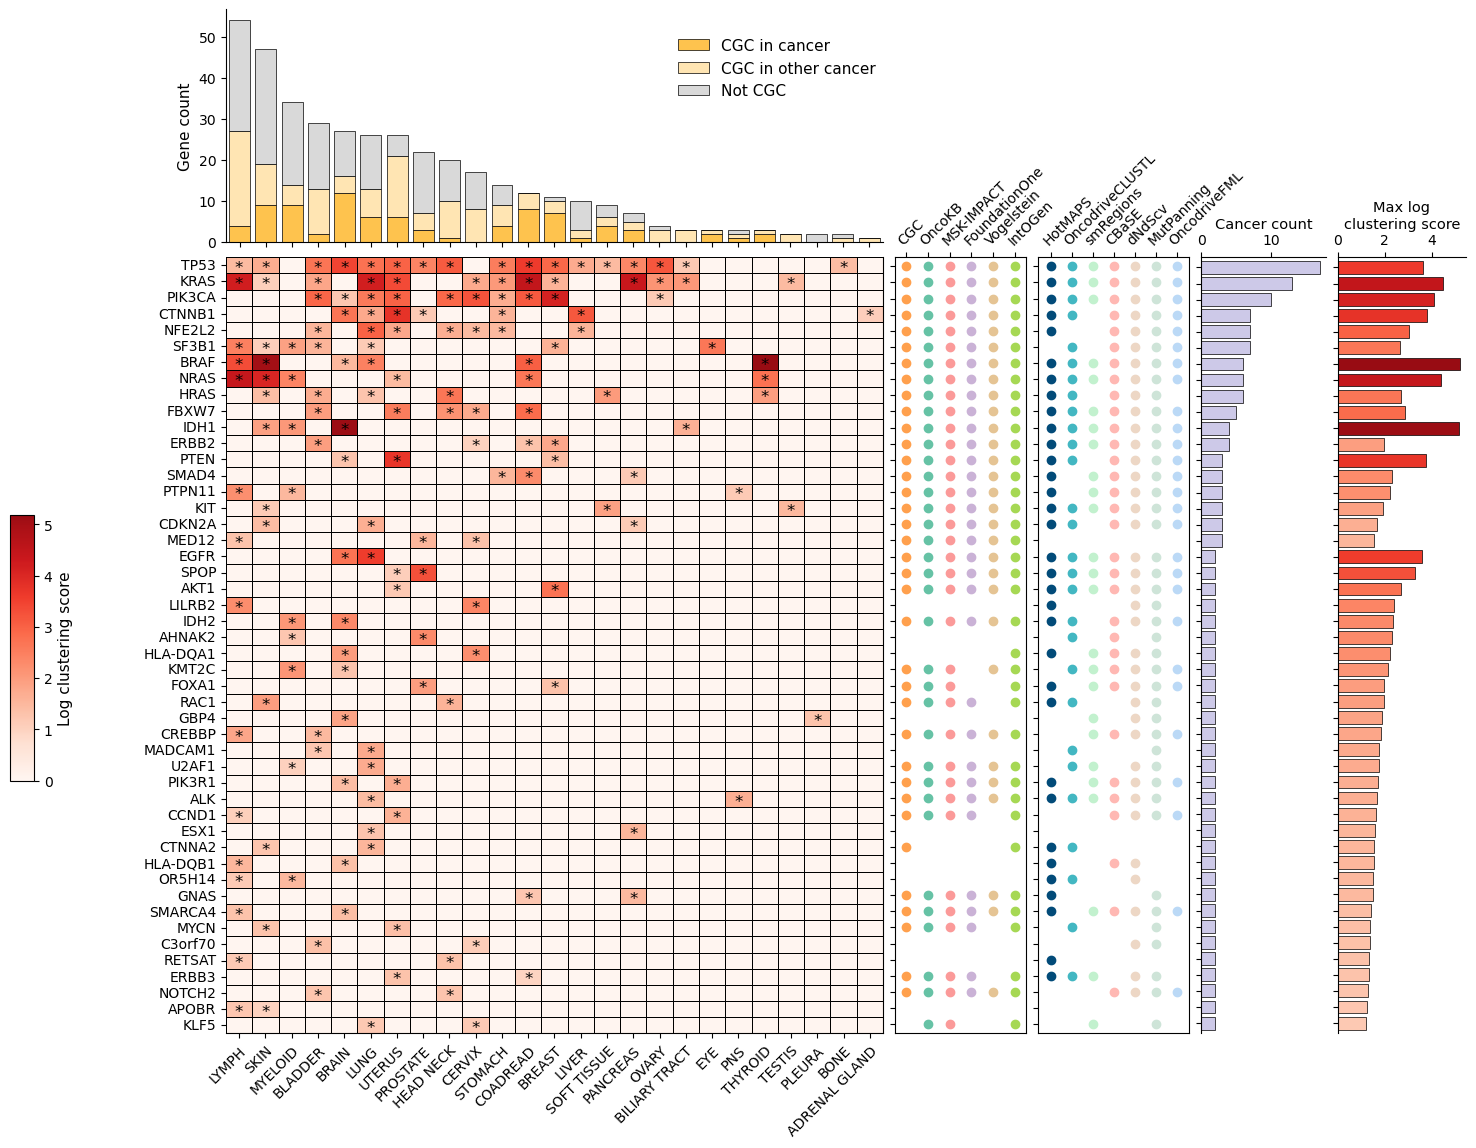

In [274]:
top_cohorts_n=None
top_genes_n=48

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                             cohort_df, 
                                                                                             o3d_output_dir=o3d_output_dir,
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_cancer=True,
                                                                                             sort_by_score_only=False)

df_anomaly.columns = [cancer.replace("_", " ") for cancer in df_anomaly.columns]
annot_df = get_annot_gene_df(df_binary.index, genetable, uniq_drivers_df, oncokb_df, cgc_df)

plot_landscape(df=df_binary, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(16,13.3),
               width_ratios=[1, 0.2, 0.23, 0.19, 0.195],
               height_ratios=[0.3, 1],
               legend_box=(-3.5, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_margin=0.012,
               ax6_xmargin=0.1,
               wspace=0.05, 
               hspace=0.03,
               plot_max_score=True,
               right_ax_ylabel="Cancer count")

### Add number of cohorts and missense mutations tracks

In [180]:
def get_hits(genetable_df, alpha=0.01):
    
    genetable_df = genetable_df[genetable_df["o3d_qval"] < 0.01]
    genetable_df = genetable_df[["Gene", "Uniprot_ID", "Cancer", "Cohort", "CGC", "Fish", "o3d_qval"]].reset_index(drop=True)
    genetable_df = genetable_df.rename(columns={"o3d_qval" : "Oncodrive3D"})
    genetable_df["Oncodrive3D"] = 1
    
    return genetable_df


def get_cgc_specific(hits_df, cgc_df, cohorts_parent_dict):

    hits_df["General_cancer"] = hits_df.Cancer.apply(lambda x: cohorts_parent_dict[x])
    hits_df["CGC_specific"] = hits_df.apply(lambda x: 
                                        x["General_cancer"] in cgc_df[cgc_df["Gene Symbol"] == x["Gene"]].GENERAL_CANCER_TYPE.values[0] 
                                        if x["CGC"] == 1 else 0, axis=1).astype(int)
    hits_df["Not_CGC"] = hits_df.apply(lambda x: 1 if x["CGC"] != 1 else 0, axis=1)
    hits_df["CGC_not_specific"] = hits_df.apply(lambda x: 1 if x["CGC"] == 1 and x["CGC_specific"] == 0 else 0, axis=1)

    return hits_df


def get_cgc_specific_count_for_ttype(hits_df_ttype):

    hits_df_ttype = hits_df_ttype[["Gene", "Oncodrive3D", "CGC_specific", "Not_CGC", "CGC_not_specific"]].drop_duplicates().reset_index(drop=True)
    hits_df_ttype = hits_df_ttype.drop(columns=["Gene"]).sum()

    return hits_df_ttype
    

def get_gene_annotation(df, genetable):
    
    cgc_genes = genetable[genetable["CGC"] == 1].Gene.unique()
    fish_genes = genetable[genetable["Fish"] == 1].Gene.unique()
    gene_annotation = ["CGC" if gene in cgc_genes else "Fishy" if gene in fish_genes else "Not annotated" for gene in df.index]
    gene_annotation = pd.Series(gene_annotation, name="Annotation")
    lut = {"CGC": '#ff7f0e', 
           "Fishy": '#2ca02c', 
           "Not annotated": '#7f7f7f',
           "Not CGC" : '#7f7f7f'}
    gene_colors = gene_annotation.map(lut)
    
    return gene_colors, lut


def get_anomaly_df(genetable_df, o3d_output_dir):
    
    lst_cohort = []
    for cohort in genetable_df.Cohort.unique():
        cohort = "TCGA_WXS_SOFT_TISSUE" if cohort == "TCGA_WXS_SARC" else cohort
        df_cohort = pd.read_csv(f"{o3d_output_dir}/{cohort}/{cohort}.3d_clustering_genes.csv")
        df_cohort = df_cohort[["Cohort", "Gene", "Uniprot_ID", "qval", "C_gene", "C_pos", "Score_obs_sim_top_vol"]]
        df_cohort = df_cohort.dropna(subset="qval").rename(columns={"Score_obs_sim_top_vol" : "Clustering_score"})
        lst_cohort.append(df_cohort)

    anomaly_df = pd.concat(lst_cohort).reset_index(drop=True)
    anomaly_df = anomaly_df.merge(genetable_df[["Cohort", "Gene", "CGC", "Fish"]].drop_duplicates(), on=["Cohort", "Gene"], how="left")
    anomaly_df.Cohort = anomaly_df.Cohort.replace("TCGA_WXS_SOFT_TISSUE", "TCGA_WXS_SARC")
    
    return anomaly_df


def create_custom_colormap(cmap="Reds"):
    colors = sns.color_palette(cmap, as_cmap=True)
    colors = colors(np.linspace(0, 0.9, 256)) # Soften the dark color
    
    return LinearSegmentedColormap.from_list("CustomReds", colors)


def plot_o3d_cgc_hits(hits_df, filename=None):
    """
    Plot summary CGC hits of Oncodrive3D across genetable
    """
    
    s = hits_df[["Oncodrive3D", "CGC", "CGC_specific", "CGC_not_specific", "Not_CGC"]].sum()
    s.index = "All", "CGC", "CGC\nin\ncancer", "CGC\nin\nother\ncancer", "Not CGC"
    
    plt.figure(figsize=(4, 3))
    plt.bar(s.index, s.values, color=["#A1C9F4", "#ffa04d", "#fec34e", "#ffe5b3", "#d9d9d9"], edgecolor='black', lw=0.5)
    
    plt.xlabel(None)
    plt.ylabel('Genes-cohorts count', fontsize=12)
    plt.xticks(fontsize=11)
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()


def get_annot_gene_df(genes_lst,
                      genetable_df,
                      intogen_drivers_df, 
                      oncokb_df, 
                      cgc_df, 
                      alpha = 0.01,
                      lst_methods = ["hotmaps", "clustl", "smreg", "cbase", "dndscv", "mutpan", "fml"]):

    genes = pd.Series(genes_lst)
    
    unique_hits_dict = {}
    unique_hits_dict["cgc"] = cgc_df["Gene Symbol"].values
    unique_hits_dict["oncokb"] = oncokb_df.loc[oncokb_df["OncoKB Annotated"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["msk_impact"] = oncokb_df.loc[oncokb_df["MSK-IMPACT"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["msk_heme"] = oncokb_df.loc[oncokb_df["MSK-HEME"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["fondone"] = oncokb_df.loc[oncokb_df["FOUNDATION ONE"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["fondone_heme"] = oncokb_df.loc[oncokb_df["FOUNDATION ONE HEME"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["vogelstein"] = oncokb_df.loc[oncokb_df["Vogelstein"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["intogen"] = intogen_drivers_df.SYMBOL.values
    
    # Get unique hits for each method in Intogen and O3D
    for method in lst_methods:
        unique_hits_dict[method] = genetable_df[genetable_df[f"{method}_qval"] < alpha].Gene.unique()
    
    # Get df
    annot_df = {}
    annot_df["Gene"] = genes
    for annot in unique_hits_dict.keys():
        annot_df[annot] = genes.isin(unique_hits_dict[annot]).astype(int)
    
    return pd.DataFrame(annot_df)

In [181]:
def get_gene_cohorts_binary(genetable_df, 
                            cohort_df, 
                            o3d_output_dir,
                            top_cohorts_n=None, 
                            top_genes_n=None, 
                            rm_empty_cols=True,
                            log_score=True,
                            cgc_df=None, 
                            cohorts_parent_dict=None,
                            grouped_by_organ=False,
                            sort_by_score_only=False,
                            genes_in_one_cohort=False):

    # Get hits df and clustering score info
    hits_df = get_hits(genetable_df)
    o3d_output = get_anomaly_df(genetable_df, o3d_output_dir)

    # Count of mut
    cohort_mut_count = get_cohort_mut_count(cohort_df, o3d_output_dir)
    cohort_mut_count["Cohort"] = cohort_mut_count.Cohort.replace("TCGA_WXS_SOFT_TISSUE", "TCGA_WXS_SARC")

    # Count by general cancer
    if grouped_by_organ:
        o3d_output = o3d_output.merge(cohort_df.rename(columns={"COHORT" : "Cohort"})[["Cohort", "GENERAL_CANCER_TYPE"]], on="Cohort")
        o3d_output = o3d_output[["GENERAL_CANCER_TYPE", 'Gene', "Clustering_score"]].groupby(["GENERAL_CANCER_TYPE", 'Gene']).max().reset_index()
        anomaly_dict = {f"{gene}-{cancer}" : score for gene, cancer, score in zip(o3d_output["Gene"].values, 
                                                                                  o3d_output["GENERAL_CANCER_TYPE"].values, 
                                                                                  o3d_output["Clustering_score"].values)}
        max_score_df = o3d_output.groupby("Gene").max().reset_index().sort_values("Clustering_score", ascending=False)
        target_col = "General_cancer"
        
    # Count by cohort
    else:
        o3d_output = get_anomaly_df(genetable_df, o3d_output_dir)
        anomaly_dict = {f"{gene}-{cohort}" : score for gene, cohort, score in zip(o3d_output["Gene"].values, 
                                                                                  o3d_output["Cohort"].values, 
                                                                                  o3d_output["Clustering_score"].values)}
        max_score_df = o3d_output.groupby("Gene").max().reset_index().sort_values("Clustering_score", ascending=False)
        target_col = "Cohort"

    hits_df = get_cgc_specific(hits_df, cgc_df, cohorts_tissue_parent_dict)

    # Mut count
    cols_to_drop = ["Uniprot_ID", "Cancer", "Fish"]
    if grouped_by_organ:
        cohort_mut_count["Cohort_count"] = 1
        cohort_mut_count = cohort_mut_count.groupby("General_cancer").sum()
        cols_to_drop.append("Cohort")
    else:
        cohort_mut_count = cohort_mut_count.set_index("Cohort")
        
    hits_df = hits_df.drop(columns=cols_to_drop).drop_duplicates().reset_index(drop=True)
    
    # Get count of cancer a gene has been detected as significant across all cohorts
    gene_hits_count = hits_df.groupby("Gene").apply(lambda x: len(x)).reset_index(name="Oncodrive3D")
    gene_hits_count = gene_hits_count.merge(max_score_df[["Gene", "Clustering_score"]], on="Gene", how="left")
    if sort_by_score_only:
        gene_hits_count = gene_hits_count.sort_values('Clustering_score', ascending=False).set_index("Gene")
    else:
        gene_hits_count = gene_hits_count.sort_values(by=['Oncodrive3D', 'Clustering_score'], ascending=[False, False]).set_index("Gene")
    if genes_in_one_cohort:
        gene_hits_count = gene_hits_count[gene_hits_count["Oncodrive3D"] == 1]
    # For a general cancer type get the number of unique CGC genes in that cancer, other cancer, not CGC
    cohort_hits_count = hits_df.groupby(target_col).apply(lambda x: get_cgc_specific_count_for_ttype(x)).sort_values("Oncodrive3D", ascending=False)
    # Add mut count
    cohort_hits_count = cohort_hits_count.merge(cohort_mut_count, left_index=True, right_index=True)
    
    if top_genes_n is None:
        top_genes_n = len(gene_hits_count)
    if top_cohorts_n is None:
        top_cohorts_n = len(cohort_hits_count)
    top_genes = gene_hits_count[:top_genes_n].index
    top_cohorts = cohort_hits_count[:top_cohorts_n].index

    # Get df anomaly and binary
    df_anomaly = pd.DataFrame(0, index=top_cohorts, columns=top_genes)
    df_binary = pd.DataFrame(0, index=top_cohorts, columns=top_genes)
    for cohort in top_cohorts:
        genes = hits_df[hits_df[target_col] == cohort].Gene.values
        genes = [gene for gene in genes if gene in df_anomaly.columns]
        # Df anomaly
        scores = [np.log(anomaly_dict[f"{gene}-{cohort}"]) if log_score else anomaly_dict[f"{gene}-{cohort}"] for gene in genes]    
        df_anomaly.loc[cohort, genes] = scores
        # Df binary
        df_binary.loc[cohort, genes] = 1

    df_anomaly = df_anomaly.T 
    df_binary = df_binary.T 
    if len(cohort_df) == 1:
        df_anomaly = df_anomaly.loc[hits_df.Gene]
        df_binary = df_binary.loc[hits_df.Gene]
        
    if rm_empty_cols:
        df_anomaly = df_anomaly.loc[:, ~(df_anomaly == 0).all()]
        df_binary = df_binary.loc[:, ~(df_binary == False).all()]

    gene_hits_count = gene_hits_count.loc[df_anomaly.index]
    cohort_hits_count = cohort_hits_count.loc[[cohort for cohort in cohort_hits_count.index if cohort in df_anomaly.columns]]

    return df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count


def get_cohort_mut_count(cohorts_df, o3d_output_dir):

    lst_rows = []

    for cohort, ttype in cohort_df[["COHORT", "GENERAL_CANCER_TYPE"]].values:
        cohort = "TCGA_WXS_SOFT_TISSUE" if cohort == "TCGA_WXS_SARC" else cohort
        path_csv = f"{o3d_output_dir}/{cohort}/{cohort}.3d_clustering_genes.csv"
        if os.path.exists(path_csv):
            df_o3d = pd.read_csv(path_csv)
            mut, clust_mut = df_o3d[["Mut_in_gene", "Clust_mut"]].sum().values
            lst_rows.append((cohort, ttype, mut, clust_mut))
        else:
            print(f"Path doesn't exist: {path_csv}")

    return pd.DataFrame(lst_rows, columns=["Cohort", "General_cancer", "Mut", "Clust_mut"]).astype({"Mut" : int, "Clust_mut" : int})

In [182]:
def plot_landscape(df, 
                   gene_hits_count, 
                   cohort_hits_count,
                   colors_dict,
                   names_dict,
                   annot_df,
                   df_anomaly=None,
                   figsize=(15,14),
                   width_ratios=[1, 0.2],
                   height_ratios=[0.3, 1],
                   legend_box=(-5.5, 1.1),
                   ax1_margin=0.005,
                   ax4_margin=0.005,
                   ax6_margin=0.018,
                   ax6_xmargin=0.07,
                   wspace=0.02, 
                   hspace=0.05,
                   cbar_loc=[-0.01, 0.3, 0.015, .2],
                   intogen_label=False,
                   intogen_label_table=None,
                   filename=None,
                   plot_max_score=False,
                   plot_cohort_count_top=False,
                   plot_cohort_count_right=True,
                   log_mut_count=True,
                   grouped_by_organ=False):
    

    df_binary = df
    df = df_anomaly
    cmap = create_custom_colormap()
    
    # Define the row and column labels
    row_labels = df.index
    col_labels = df.columns
    #col_labels = [ctype_dict[cohort] for cohort  in col_labels]
    
    gene_sums = gene_hits_count["Oncodrive3D"].values
    cohort_sums = cohort_hits_count["Oncodrive3D"].values
    
    cgc_specific = cohort_hits_count["CGC_specific"].values
    cgc_not_specific = cohort_hits_count["CGC_not_specific"].values
    not_cgc = cohort_hits_count["Not_CGC"].values  

    ncols = 5 if plot_max_score else 4
    nrows = 4
    
    # Create a figure with a grid layout for heatmap and bars
    fig, ax = plt.subplots(nrows, ncols, 
                           figsize=figsize, 
                           gridspec_kw={'width_ratios': width_ratios, 'height_ratios': height_ratios})
    ax1 = ax[2,0]
    ax2 = ax[2,1]
    ax3 = ax[3,0]
    ax4 = ax[3,3]
    ax5 = ax[2,2]
    ax6 = ax[3,1]
    ax7 = ax[2,3]
    ax8 = ax[3,2]
    ax9 = ax[2,4] if plot_max_score else None
    if plot_cohort_count_right:
        if plot_max_score:
            ax10 = ax[3,4]
        else:
            ax10 = None
        # ax10 = ax[3,4] if plot_max_score else None
    else:
        if plot_max_score:
            ax[3,4].remove()
            ax10 = ax4
        else:
            ax10 = None
        # ax10 = ax4 if plot_max_score else None
    ax11 = ax[1,0]
    ax12 = ax[0,0]

    n = 0 if plot_max_score else 1
    for i in range(2):
        for j in range(1, 5-n):
            ax[i,j].remove()

    
    # Create the heatmap
    sns.heatmap(df, annot=False, cmap=cmap, cbar=False, xticklabels=col_labels, yticklabels=row_labels, ax=ax3, lw=0.5, 
                linecolor="black")
    ax3.set_xticklabels(col_labels, rotation=45, rotation_mode="anchor", ha='right') 
    ax3.set_xlabel("Cohort")
    ax3.set_ylabel("Gene")
    ax3.set_xlabel("")
    ax3.set_ylabel("")
    ax3.spines['bottom'].set_visible(True)
    ax3.spines['right'].set_visible(True)

    
    # Add counts of cohort or organ for each gene
    # ============================================
    
    if grouped_by_organ:
        ax4_ylabel = "Organs count"
        cancer_or_organ = "organ"
    else:
        ax4_ylabel = "Cohorts count"
        cancer_or_organ = "cancer"
    if plot_cohort_count_right:
        ax4.barh(np.arange(len(gene_sums)), gene_sums, color='#cdc9e8', edgecolor="black", lw=0.5)
        ax4.set_yticks(np.arange(len(gene_sums)))
        ax4.set_yticklabels([])
        ax4.set_xlabel(ax4_ylabel, fontsize=10.5)
        ax4.invert_yaxis()
        
        ax4.xaxis.tick_top()
        ax4.xaxis.set_label_position('top')
        ax4.spines['bottom'].set_visible(False)
        ax4.spines['right'].set_visible(False)

    
    # Add max score track
    # ===================
    
    if plot_max_score:
        max_scores = np.log(gene_hits_count["Clustering_score"])
        norm = Normalize(vmin=df_anomaly.min().min(), vmax=df_anomaly.max().max())
        colors = cmap(norm(max_scores))
    
        
        ax10.barh(np.arange(len(gene_sums)), max_scores, color=colors, edgecolor="black", lw=0.5)
        ax10.set_yticks(np.arange(len(gene_sums)))
        ax10.set_yticklabels([])
        ax10.set_xlabel("Max log\nclustering score", fontsize=10.5)
        ax10.invert_yaxis()
        
        ax10.xaxis.tick_top()
        ax10.xaxis.set_label_position('top')
        ax10.spines['bottom'].set_visible(False)
        ax10.spines['right'].set_visible(False)

    
    # Add annotation track
    # ====================
    lst_dbs = ["cgc", "oncokb", "msk_impact", "fondone", "vogelstein", "intogen"]
    lst_methods = ["hotmaps", "clustl", "smreg", "cbase", "dndscv", "mutpan", "fml"]
    
    genes = annot_df['Gene']
    annot_methods_df = annot_df.copy()[lst_methods]
    annot_df = annot_df[lst_dbs]
    
    # Loop through each column
    indices = annot_df.index.tolist()
    ax6.scatter([0] * len(indices), indices, color="white")
    for j, col in enumerate(annot_df.columns):
        # Get the indices where the value is 1
        indices = annot_df.index[annot_df[col] == 1].tolist()
        ax6.scatter([j] * len(indices), indices, color=colors_dict[names_dict[col]])
    
    ax6.set_yticks(np.arange(len(gene_sums)))
    ax6.set_yticklabels([])
    ax6.set_xticks(range(len(annot_df.columns)))
    ax6.set_xticklabels([names_dict[col] for col in annot_df.columns], rotation=45, rotation_mode="anchor", ha='left') 
    # ax6.set_xlabel("Annotation", fontsize=10.5)
    ax6.invert_yaxis()
    ax6.xaxis.tick_top()
    ax6.xaxis.set_label_position('top')


    # Annotation Intogen methods
    # ==========================
    
    # Loop through each column
    indices = annot_methods_df.index.tolist()
    ax8.scatter([0] * len(indices), indices, color="white")
    for j, col in enumerate(annot_methods_df.columns):
        indices = annot_methods_df.index[annot_methods_df[col] == 1].tolist()
        ax8.scatter([j] * len(indices), indices, color=colors_dict[names_dict[col]])
    
    ax8.set_yticks(np.arange(len(gene_sums)))
    ax8.set_yticklabels([])
    ax8.set_xticks(range(len(annot_methods_df.columns)))
    ax8.set_xticklabels([names_dict[col] for col in annot_methods_df.columns], rotation=45, rotation_mode="anchor", ha='left') 
    
    # ax6.set_xlabel("Annotation", fontsize=10.5)
    ax8.invert_yaxis()
    
    ax8.xaxis.tick_top()
    ax8.xaxis.set_label_position('top')

    
    # Add bars for the top axis 
    # =========================

    ax1.bar(np.arange(len(cohort_hits_count)), cgc_specific, 
            color="#fec34e", edgecolor='black', label=f'CGC in {cancer_or_organ}', lw=0.5)
    ax1.bar(np.arange(len(cohort_hits_count)), cgc_not_specific, bottom=cgc_specific, 
            color="#ffe5b3", edgecolor='black', label=f'CGC in other {cancer_or_organ}', lw=0.5)
    ax1.bar(np.arange(len(cohort_hits_count)), not_cgc, bottom=np.array(cgc_specific) + np.array(cgc_not_specific), 
            color="#d9d9d9", edgecolor='black', label='Not CGC', lw=0.5)

    ax1.set_xticks(np.arange(len(cohort_sums)))
    ax1.set_ylabel("Genes count", fontsize=11)
    ax1.set_xticklabels([])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)


    # Add mut count
    # =============
    
    mut_count = cohort_hits_count["Mut"].values     
    if log_mut_count:
        ax11_ylabel = "Log mut\ncount" if plot_cohort_count_top else "Log mut count"
        mut_count = np.log(mut_count)
    else:
        ax11_ylabel = "Mutations count"
    ax11.bar(np.arange(len(cohort_hits_count)), mut_count, 
         color="#BDD7E7", edgecolor='black', lw=0.5)
    # mut_count = cohort_hits_count["Mut"].values
    # clust_mut_count = cohort_hits_count["Clust_mut"].values
    # mut_count -= clust_mut_count
    # ax11.bar(np.arange(len(cohort_hits_count)), mut_count, 
    #         color="#fec34e", edgecolor='black', label='Missense mutations', lw=0.5)
    # ax11.bar(np.arange(len(cohort_hits_count)), clust_mut_count, bottom=mut_count, 
    #         color="#ffe5b3", edgecolor='black', label='Mutations in clusters', lw=0.5)

    ax11.set_xticks(np.arange(len(cohort_sums)))
    ax11.set_ylabel(ax11_ylabel, fontsize=11)
    ax11.set_xticklabels([])
    ax11.spines['top'].set_visible(False)
    ax11.spines['right'].set_visible(False)


    # Add cohort count
    # ================
    
    if plot_cohort_count_top:
        ax12.bar(np.arange(len(cohort_hits_count)), cohort_hits_count["Cohort_count"].values, 
             color="#c7eaea", edgecolor='black', lw=0.5)
        ax12.set_xticks(np.arange(len(cohort_sums)))
        ax12.set_ylabel("Cohorts count", fontsize=11)
        ax12.set_xticklabels([])
        ax12.spines['top'].set_visible(False)
        ax12.spines['right'].set_visible(False)
    else:
        ax12.remove()
    
    
    # Details
    # =======
    
    ax2.remove()
    ax5.remove()
    ax7.remove()
    if plot_max_score:
        ax9.remove()
    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    ax1.margins(x=ax1_margin, tight=True)
    ax11.margins(x=ax1_margin, tight=True)
    ax4.margins(y=ax4_margin, tight=True)
    ax6.margins(y=ax6_margin, x=ax6_xmargin, tight=True)
    ax8.margins(y=ax6_margin, x=ax6_xmargin, tight=True)
    if plot_max_score:
        ax10.margins(y=ax4_margin, tight=True)
    if plot_cohort_count_top:
        ax12.margins(x=ax1_margin, tight=True)
    
    handles, labels = ax3.get_legend_handles_labels()
    handles.append(mpatches.Patch(facecolor="#fec34e", edgecolor="black", label=f'CGC in {cancer_or_organ}', lw=0.5))
    handles.append(mpatches.Patch(facecolor="#ffe5b3", edgecolor="black", label=f"CGC in other {cancer_or_organ}", lw=0.5))
    handles.append(mpatches.Patch(facecolor="#d9d9d9", edgecolor="black", label="Not CGC", lw=0.5))
    legend = plt.legend(handles=handles, bbox_to_anchor=legend_box, frameon=False, fontsize=11)
    
    if df_anomaly is not None:
        # Cbar
        cbar_ax = fig.add_axes(cbar_loc) 
        cbar = fig.colorbar(ax3.collections[0], cax=cbar_ax)
        cbar.set_label('Log clustering score', fontsize=11) 
    
        # Overlay stars on top of the heatmap
        for i in range(len(row_labels)):
            for j in range(len(col_labels)):
                if df_binary.iloc[i, j] == 1:
                    ax3.text(j + 0.5, i + 0.65, '*', ha='center', va='center', fontsize=12, color='black')

    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

In [183]:
colors_dict = {"Oncodrive3D" : "#ffad48", 
              "HotMAPS" : "#024b79", 
              "OncodriveCLUSTL" : "#43b7c2", 
              "smRegions" : "#c2f1ce", 
              "CBaSE" : "#ffb8b3", 
              "SEISMIC" : "#ede5ff", 
              "dNdScv" : "#edd7c5", 
              "MutPanning" : "#cee4d8", 
              "OncodriveFML" : "#bbd9f6",
              "IntOGen" : "#A6D854",
              "OncoKB" : "#66C2A5",
              "CGC" : "#FFA04D",
              "MSK-IMPACT" : "#FB9A99",
              "MSK-IMPACT Heme" : "#E31A1C",
              "FoundationOne" : "#CAB2D6",
              "FoundationOne Heme" : "#6A3D9A",
              "Vogelstein" : "#E5C494"}

names_dict = {"o3d" : "Oncodrive3D", 
             "hotmaps" : "HotMAPS", 
             "clustl" : "OncodriveCLUSTL", 
             "smreg" : "smRegions", 
             "cbase" : "CBaSE", 
             "seismic" : "SEISMIC", 
             "dndscv" : "dNdScv", 
             "mutpan" : "MutPanning", 
             "fml" : "OncodriveFML",
             "intogen" : "IntOGen",
             "oncokb" : "OncoKB",
             "cgc" : "CGC",
             "msk_impact" : "MSK-IMPACT",
             "msk_heme" : "MSK-IMPACT Heme",
             "fondone" : "FoundationOne",
             "fondone_heme" : "FoundationOne Heme", 
             "vogelstein" : "Vogelstein"}

annot_cols = ["Gene", 
              "cgc", 
              "oncokb", 
              "msk_impact", 
              "fondone", 
              "vogelstein", 
              "intogen", 
              "hotmaps", 
              "clustl", 
              "smreg", 
              "cbase",
              "dndscv", 
              "mutpan", 
              "fml"]

#### TCGA

Path doesn't exist: /workspace/projects/clustering_3d/o3d_analysys/datasets//output/cancer_202404/o3d_output/human_mane_raw/run_2024-07-01_16-04-14/PEDCBIOP_WXS_TALL_REL/PEDCBIOP_WXS_TALL_REL.3d_clustering_genes.csv


/tmp/jobs/spellegrini/9964934/ipykernel_19740/3385835942.py:38: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  max_score_df = o3d_output.groupby("Gene").max().reset_index().sort_values("Clustering_score", ascending=False)


Oncodrive3D  CGC_specific  Not_CGC  CGC_not_specific  \
Cohort                                                                    
TCGA_WXS_MEL                31             8       17                 6   
TCGA_WXS_UCEC               26             6        5                15   
TCGA_WXS_BLCA               18             1        7                10   
TCGA_WXS_STAD               11             4        3                 4   
TCGA_WXS_LUAD                9             4        2                 3   
TCGA_WXS_BRCA                9             6        1                 2   
TCGA_WXS_COADREAD            9             6        0                 3   
TCGA_WXS_HNSC                9             1        1                 7   
TCGA_WXS_CESC                8             0        2                 6   
TCGA_WXS_GBM                 8             7        1                 0   
TCGA_WXS_LUSC                6             2        1                 3   
TCGA_WXS_LGGNOS              6             6        0                 0   
TCGA_WXS_HCC                 5             1        2                 2   
TCGA_WXS_PRAD                4             1        0                 3   
TCGA_WXS_ESCA                4             1        1                 2   
TCGA_WXS_PAAD                4             3        0                 1   
TCGA_WXS_UCS                 3             1        0                 2   
TCGA_WXS_UM                  3             2        0                 1   
TCGA_WXS_WDTC                3             2        0                 1   
TCGA_WXS_PGNG                2             1        0                 1   
TCGA_WXS_OVT                 2             0        1                 1   
TCGA_WXS_MGCT                2             0        0                 2   
TCGA_WXS_AML                 2             0        1                 1   
TCGA_WXS_SARC                1             0        0                 1   
TCGA_WXS_THYM                1             0        1                 0   
TCGA_WXS_ACC                 1             0        0                 1   

                  General_cancer     Mut  Clust_mut  
Cohort                                               
TCGA_WXS_MEL                SKIN  199877       1674  
TCGA_WXS_UCEC             UTERUS   65768       1183  
TCGA_WXS_BLCA            BLADDER   64303        584  
TCGA_WXS_STAD            STOMACH   42258        363  
TCGA_WXS_LUAD               LUNG   98457        646  
TCGA_WXS_BRCA             BREAST   47827        701  
TCGA_WXS_COADREAD       COADREAD   41668        672  
TCGA_WXS_HNSC          HEAD_NECK   53606        541  
TCGA_WXS_CESC             CERVIX   25831        173  
TCGA_WXS_GBM               BRAIN   21904        363  
TCGA_WXS_LUSC               LUNG   88145        506  
TCGA_WXS_LGGNOS            BRAIN   13099        806  
TCGA_WXS_HCC               LIVER   27536        242  
TCGA_WXS_PRAD           PROSTATE   12552        132  
TCGA_WXS_ESCA            STOMACH   18619        186  
TCGA_WXS_PAAD           PANCREAS    5320        186  
TCGA_WXS_UCS              UTERUS    2923         81  
TCGA_WXS_UM                  EYE    1165         99  
TCGA_WXS_WDTC            THYROID    6462        350  
TCGA_WXS_PGNG        SOFT_TISSUE    1534         30  
TCGA_WXS_OVT               OVARY   26607        271  
TCGA_WXS_MGCT             TESTIS    1733         29  
TCGA_WXS_AML             MYELOID    4050         79  
TCGA_WXS_SARC        SOFT_TISSUE   10611         44  
TCGA_WXS_THYM             THYMUS    2187         66  
TCGA_WXS_ACC       ADRENAL_GLAND    3836          8

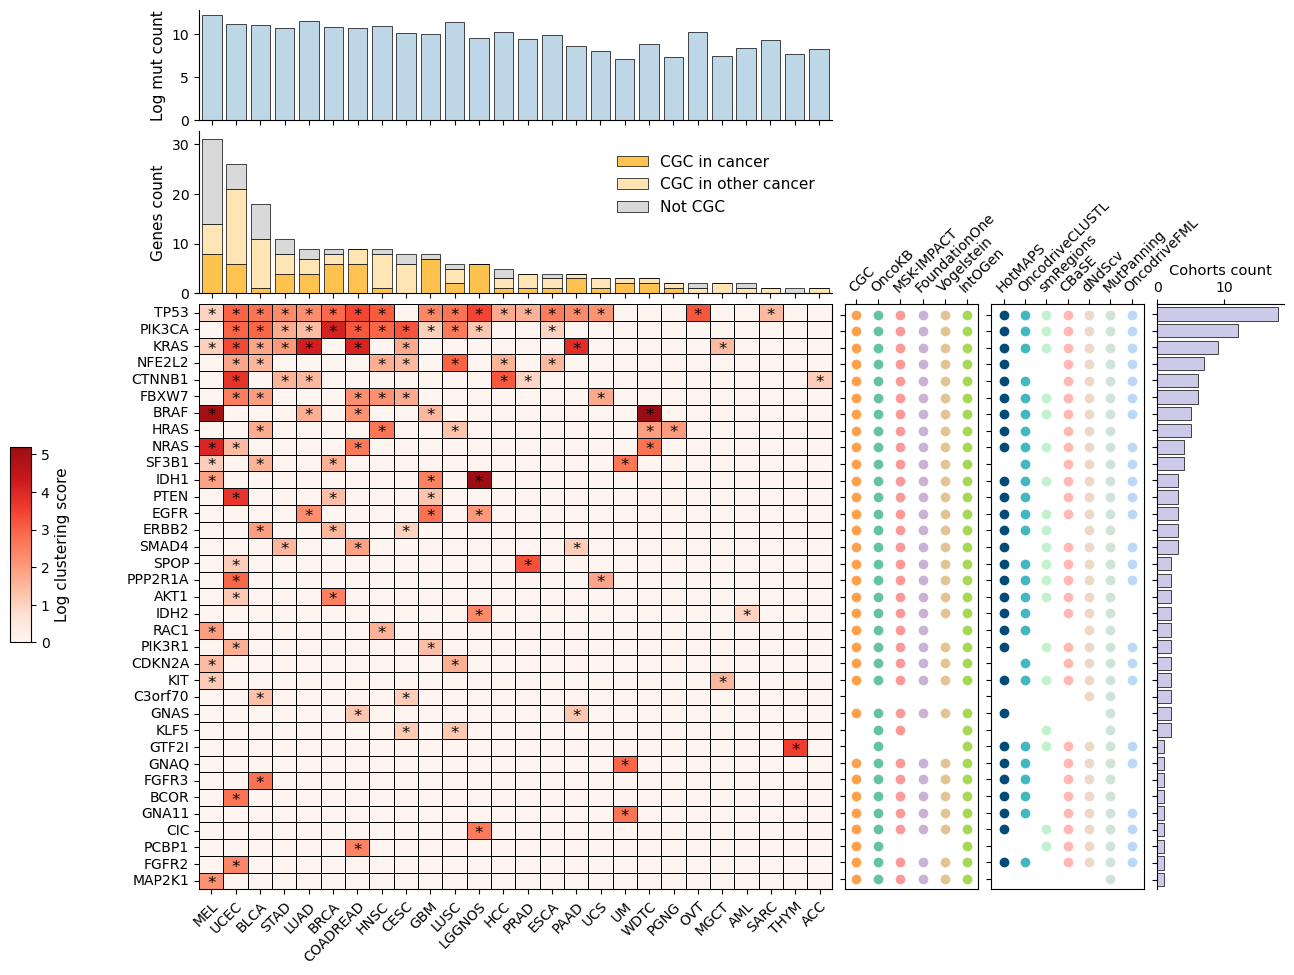

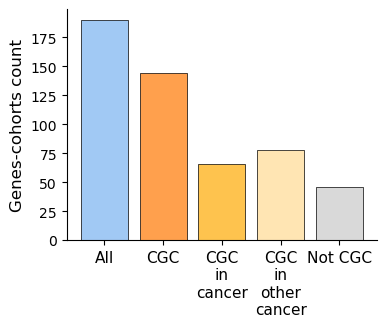

In [184]:
top_cohorts_n=None
top_genes_n=35

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable_subset, 
                                                                                             cohort_df, 
                                                                                             o3d_output_dir=o3d_output_dir,
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_organ=False,
                                                                                             sort_by_score_only=False)

display(cohort_hits_count)
df_anomaly.columns = [cohort.split("_")[2] for cohort in df_anomaly.columns]
annot_df = get_annot_gene_df(df_binary.index, genetable_subset, uniq_drivers_df, oncokb_df, cgc_df)

plot_landscape(df=df_binary, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(14,13),
               width_ratios=[0.95, 0.2, 0.23, 0.19],
               height_ratios=[0.17, 0.17, 0.25, 0.9],
               cbar_loc=[-0.01, 0.3, 0.015, .15],
               legend_box=(-2.6, 1.28),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_xmargin=0.1,
               wspace=0.05, 
               hspace=0.045,
               plot_cohort_count_top=False,
               plot_max_score=False)

# Get summary CGC hits across genetable
plot_o3d_cgc_hits(hits_df)

Path doesn't exist: /workspace/projects/clustering_3d/o3d_analysys/datasets//output/cancer_202404/o3d_output/human_mane_raw/run_2024-07-01_16-04-14/PEDCBIOP_WXS_TALL_REL/PEDCBIOP_WXS_TALL_REL.3d_clustering_genes.csv


/tmp/jobs/spellegrini/9964934/ipykernel_19740/1104244601.py:38: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  max_score_df = o3d_output.groupby("Gene").max().reset_index().sort_values("Clustering_score", ascending=False)


Oncodrive3D  CGC_specific  Not_CGC  CGC_not_specific  \
Cohort                                                                    
TCGA_WXS_MEL                31             8       17                 6   
TCGA_WXS_UCEC               26             6        5                15   
TCGA_WXS_BLCA               18             1        7                10   
TCGA_WXS_STAD               11             4        3                 4   
TCGA_WXS_LUAD                9             4        2                 3   
TCGA_WXS_BRCA                9             6        1                 2   
TCGA_WXS_COADREAD            9             6        0                 3   
TCGA_WXS_HNSC                9             1        1                 7   
TCGA_WXS_CESC                8             0        2                 6   
TCGA_WXS_GBM                 8             7        1                 0   
TCGA_WXS_LUSC                6             2        1                 3   
TCGA_WXS_LGGNOS              6             6        0                 0   
TCGA_WXS_HCC                 5             1        2                 2   
TCGA_WXS_PRAD                4             1        0                 3   
TCGA_WXS_ESCA                4             1        1                 2   
TCGA_WXS_PAAD                4             3        0                 1   
TCGA_WXS_UCS                 3             1        0                 2   
TCGA_WXS_UM                  3             2        0                 1   
TCGA_WXS_WDTC                3             2        0                 1   
TCGA_WXS_PGNG                2             1        0                 1   
TCGA_WXS_OVT                 2             0        1                 1   
TCGA_WXS_MGCT                2             0        0                 2   
TCGA_WXS_AML                 2             0        1                 1   
TCGA_WXS_SARC                1             0        0                 1   
TCGA_WXS_THYM                1             0        1                 0   
TCGA_WXS_ACC                 1             0        0                 1   

                  General_cancer     Mut  Clust_mut  
Cohort                                               
TCGA_WXS_MEL                SKIN  199877       1674  
TCGA_WXS_UCEC             UTERUS   65768       1183  
TCGA_WXS_BLCA            BLADDER   64303        584  
TCGA_WXS_STAD            STOMACH   42258        363  
TCGA_WXS_LUAD               LUNG   98457        646  
TCGA_WXS_BRCA             BREAST   47827        701  
TCGA_WXS_COADREAD       COADREAD   41668        672  
TCGA_WXS_HNSC          HEAD_NECK   53606        541  
TCGA_WXS_CESC             CERVIX   25831        173  
TCGA_WXS_GBM               BRAIN   21904        363  
TCGA_WXS_LUSC               LUNG   88145        506  
TCGA_WXS_LGGNOS            BRAIN   13099        806  
TCGA_WXS_HCC               LIVER   27536        242  
TCGA_WXS_PRAD           PROSTATE   12552        132  
TCGA_WXS_ESCA            STOMACH   18619        186  
TCGA_WXS_PAAD           PANCREAS    5320        186  
TCGA_WXS_UCS              UTERUS    2923         81  
TCGA_WXS_UM                  EYE    1165         99  
TCGA_WXS_WDTC            THYROID    6462        350  
TCGA_WXS_PGNG        SOFT_TISSUE    1534         30  
TCGA_WXS_OVT               OVARY   26607        271  
TCGA_WXS_MGCT             TESTIS    1733         29  
TCGA_WXS_AML             MYELOID    4050         79  
TCGA_WXS_SARC        SOFT_TISSUE   10611         44  
TCGA_WXS_THYM             THYMUS    2187         66  
TCGA_WXS_ACC       ADRENAL_GLAND    3836          8

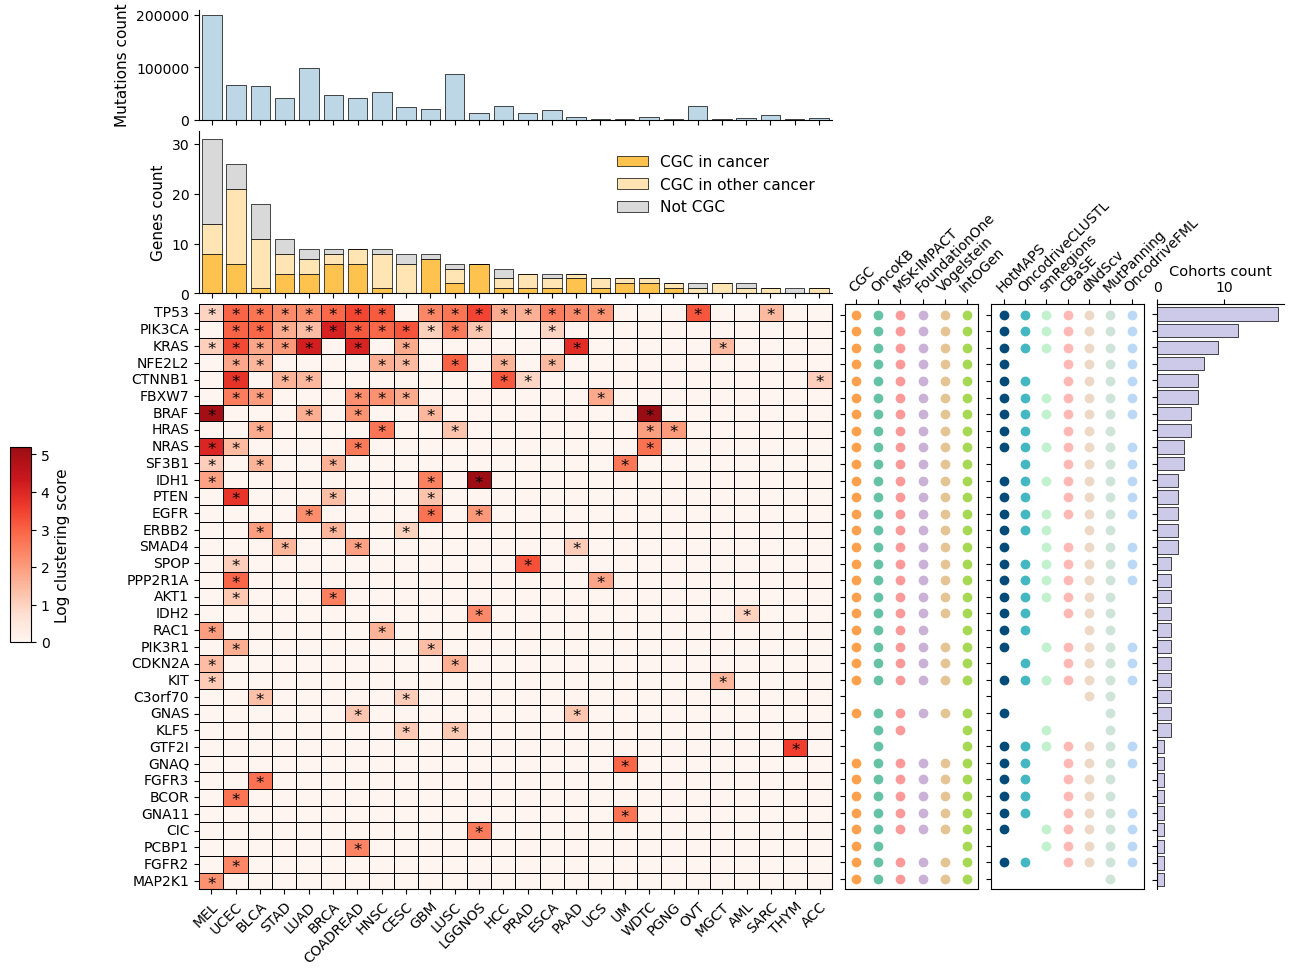

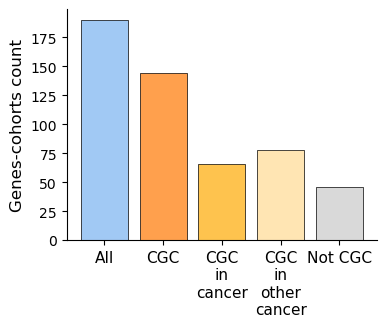

In [240]:
top_cohorts_n=None
top_genes_n=35

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable_subset, 
                                                                                             cohort_df, 
                                                                                             o3d_output_dir=o3d_output_dir,
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_organ=False,
                                                                                             sort_by_score_only=False)

display(cohort_hits_count)
df_anomaly.columns = [cohort.split("_")[2] for cohort in df_anomaly.columns]
annot_df = get_annot_gene_df(df_binary.index, genetable_subset, uniq_drivers_df, oncokb_df, cgc_df)

plot_landscape(df=df_binary, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(14,13),
               width_ratios=[0.95, 0.2, 0.23, 0.19],
               height_ratios=[0.17, 0.17, 0.25, 0.9],
               cbar_loc=[-0.01, 0.3, 0.015, .15],
               legend_box=(-2.6, 1.28),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_xmargin=0.1,
               wspace=0.05, 
               hspace=0.045,
               log_mut_count=False,
               plot_cohort_count_top=False,
               plot_max_score=False)

plot_o3d_cgc_hits(hits_df)

#### All cohorts

Path doesn't exist: /workspace/projects/clustering_3d/o3d_analysys/datasets//output/cancer_202404/o3d_output/human_mane_raw/run_2024-07-01_16-04-14/PEDCBIOP_WXS_TALL_REL/PEDCBIOP_WXS_TALL_REL.3d_clustering_genes.csv


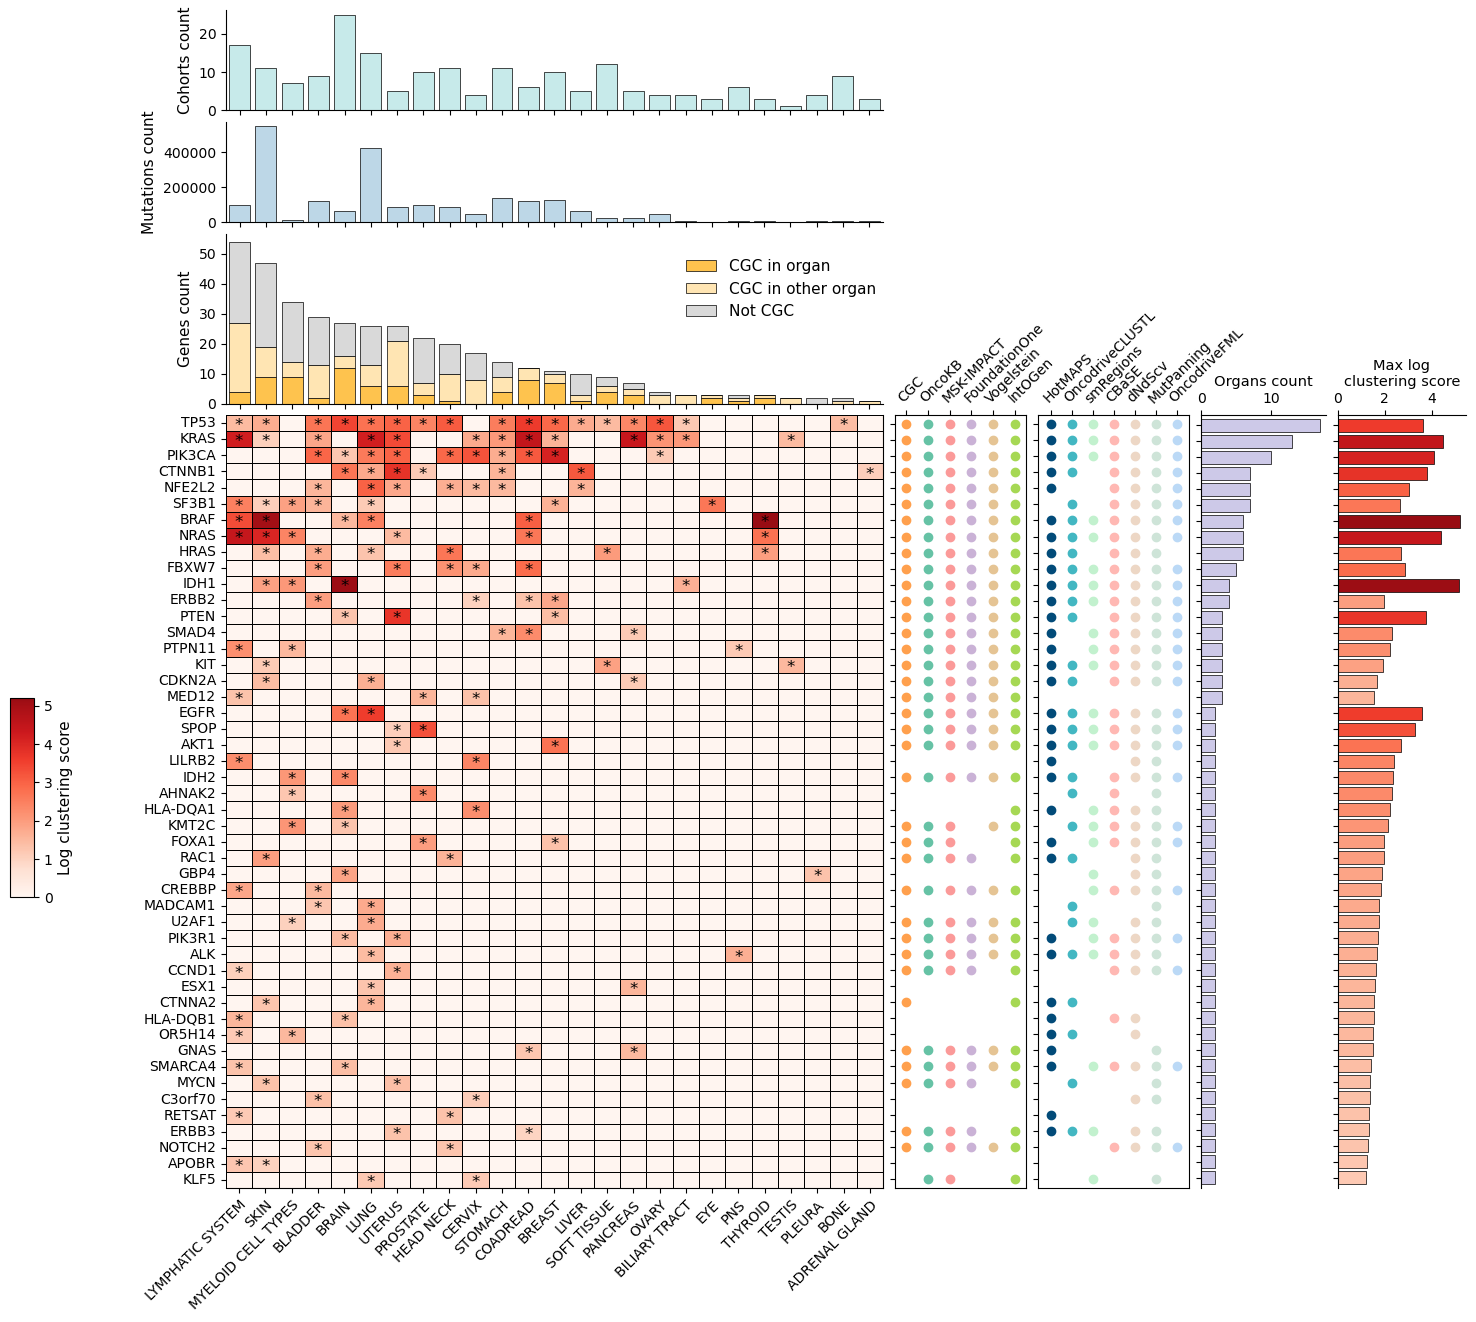

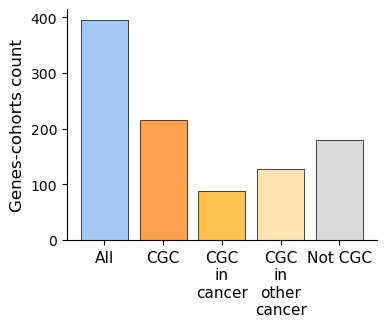

In [241]:
top_cohorts_n=None
top_genes_n=48

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                             cohort_df, 
                                                                                             o3d_output_dir=o3d_output_dir,
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_organ=True,
                                                                                             sort_by_score_only=False)

df_anomaly.columns = [cancer.replace("_", " ") for cancer in df_anomaly.columns]
df_anomaly.columns = [cancer.replace("LYMPH", "LYMPHATIC SYSTEM") for cancer in df_anomaly.columns]
df_anomaly.columns = [cancer.replace("MYELOID", "MYELOID CELL TYPES") for cancer in df_anomaly.columns]
annot_df = get_annot_gene_df(df_binary.index, genetable, uniq_drivers_df, oncokb_df, cgc_df)

plot_landscape(df=df_binary, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(16,15.3),
               width_ratios=[1, 0.2, 0.23, 0.19, 0.195],
               height_ratios=[0.13, 0.13, 0.22, 1],
               cbar_loc=[-0.01, 0.3, 0.015, .13],
               legend_box=(-3.5, 1.22),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_margin=0.012,
               ax6_xmargin=0.1,
               wspace=0.05, 
               hspace=0.04,
               plot_max_score=True,
               plot_cohort_count_top=True,
               log_mut_count=False,
               grouped_by_organ=True)

plot_o3d_cgc_hits(hits_df)

Path doesn't exist: /workspace/projects/clustering_3d/o3d_analysys/datasets//output/cancer_202404/o3d_output/human_mane_raw/run_2024-07-01_16-04-14/PEDCBIOP_WXS_TALL_REL/PEDCBIOP_WXS_TALL_REL.3d_clustering_genes.csv


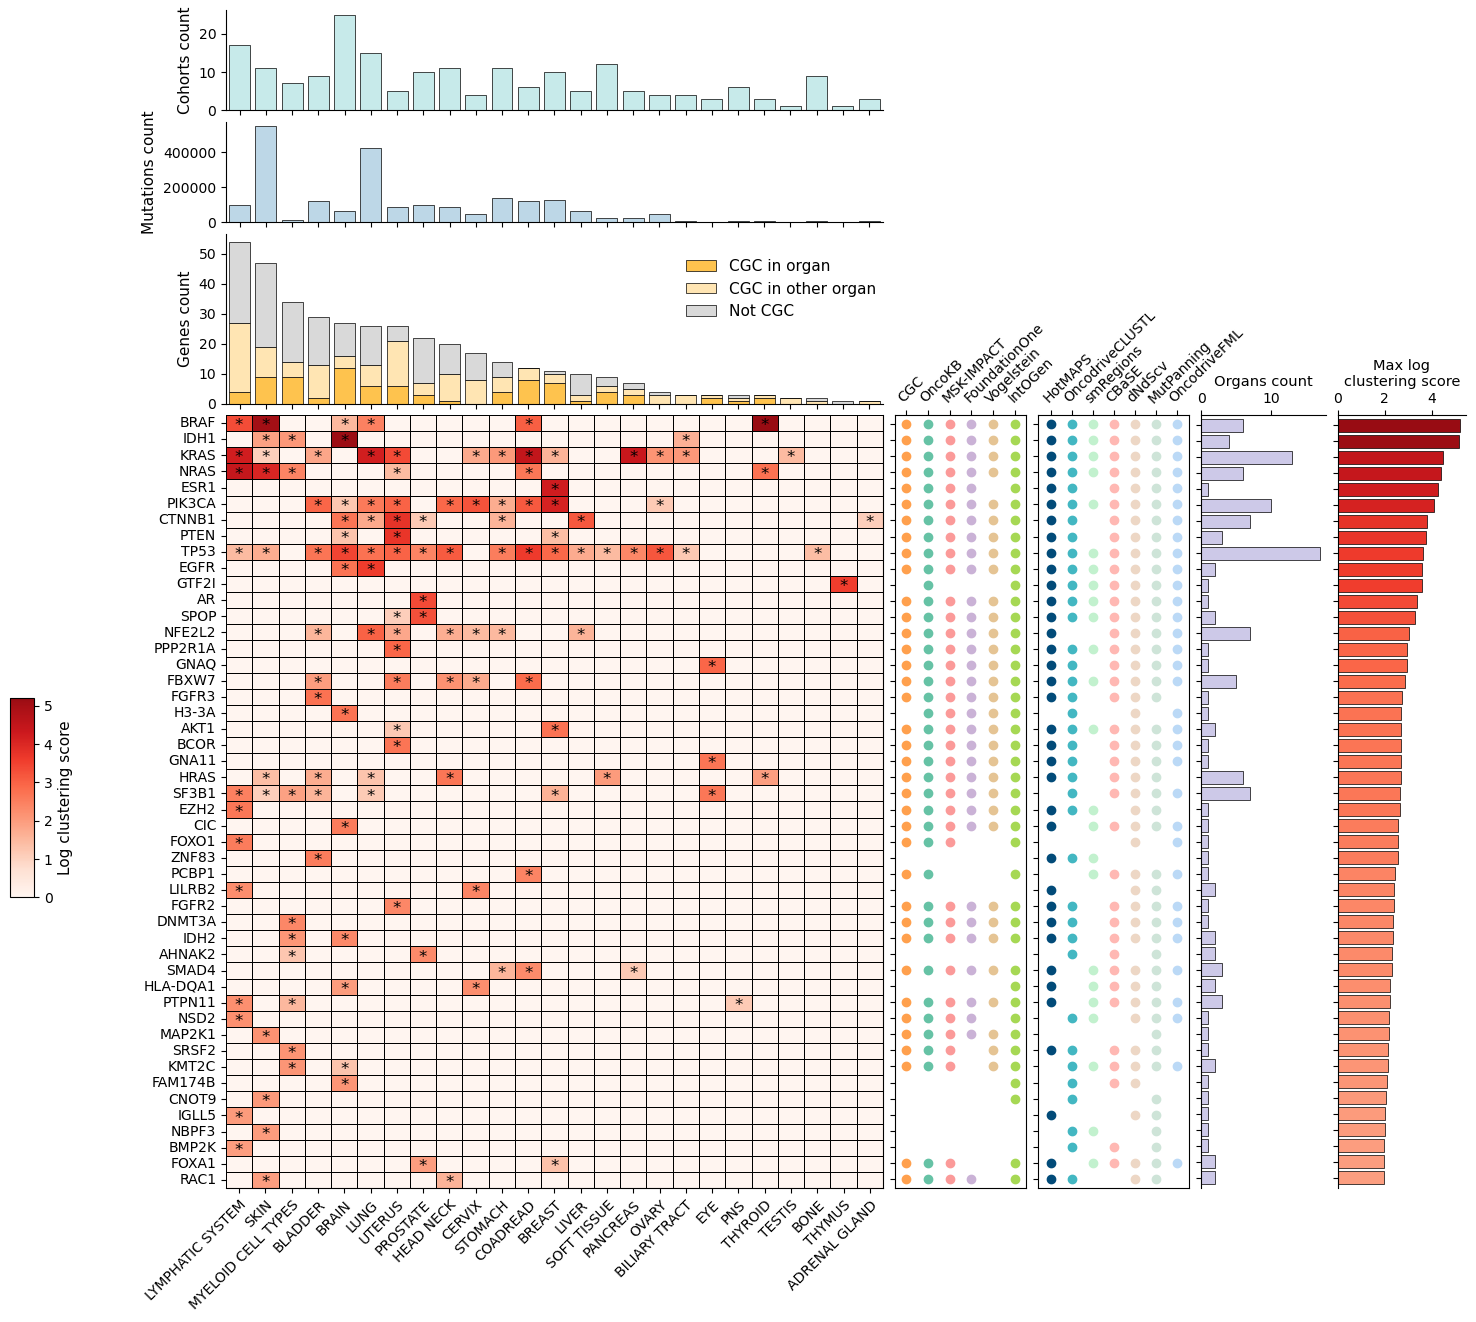

In [237]:
top_cohorts_n=None
top_genes_n=48

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                             cohort_df, 
                                                                                             o3d_output_dir=o3d_output_dir,
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_organ=True,
                                                                                             sort_by_score_only=True)

df_anomaly.columns = [cancer.replace("_", " ") for cancer in df_anomaly.columns]
df_anomaly.columns = [cancer.replace("LYMPH", "LYMPHATIC SYSTEM") for cancer in df_anomaly.columns]
df_anomaly.columns = [cancer.replace("MYELOID", "MYELOID CELL TYPES") for cancer in df_anomaly.columns]
annot_df = get_annot_gene_df(df_binary.index, genetable, uniq_drivers_df, oncokb_df, cgc_df)

plot_landscape(df=df_binary, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(16,15.3),
               width_ratios=[1, 0.2, 0.23, 0.19, 0.195],
               height_ratios=[0.13, 0.13, 0.22, 1],
               cbar_loc=[-0.01, 0.3, 0.015, .13],
               legend_box=(-3.5, 1.22),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_margin=0.012,
               ax6_xmargin=0.1,
               wspace=0.05, 
               hspace=0.04,
               plot_max_score=True,
               plot_cohort_count_top=True,
               log_mut_count=False,
               grouped_by_organ=True)

##### Plot for genes detected in only one organ

Path doesn't exist: /workspace/projects/clustering_3d/o3d_analysys/datasets//output/cancer_202404/o3d_output/human_mane_raw/run_2024-07-01_16-04-14/PEDCBIOP_WXS_TALL_REL/PEDCBIOP_WXS_TALL_REL.3d_clustering_genes.csv


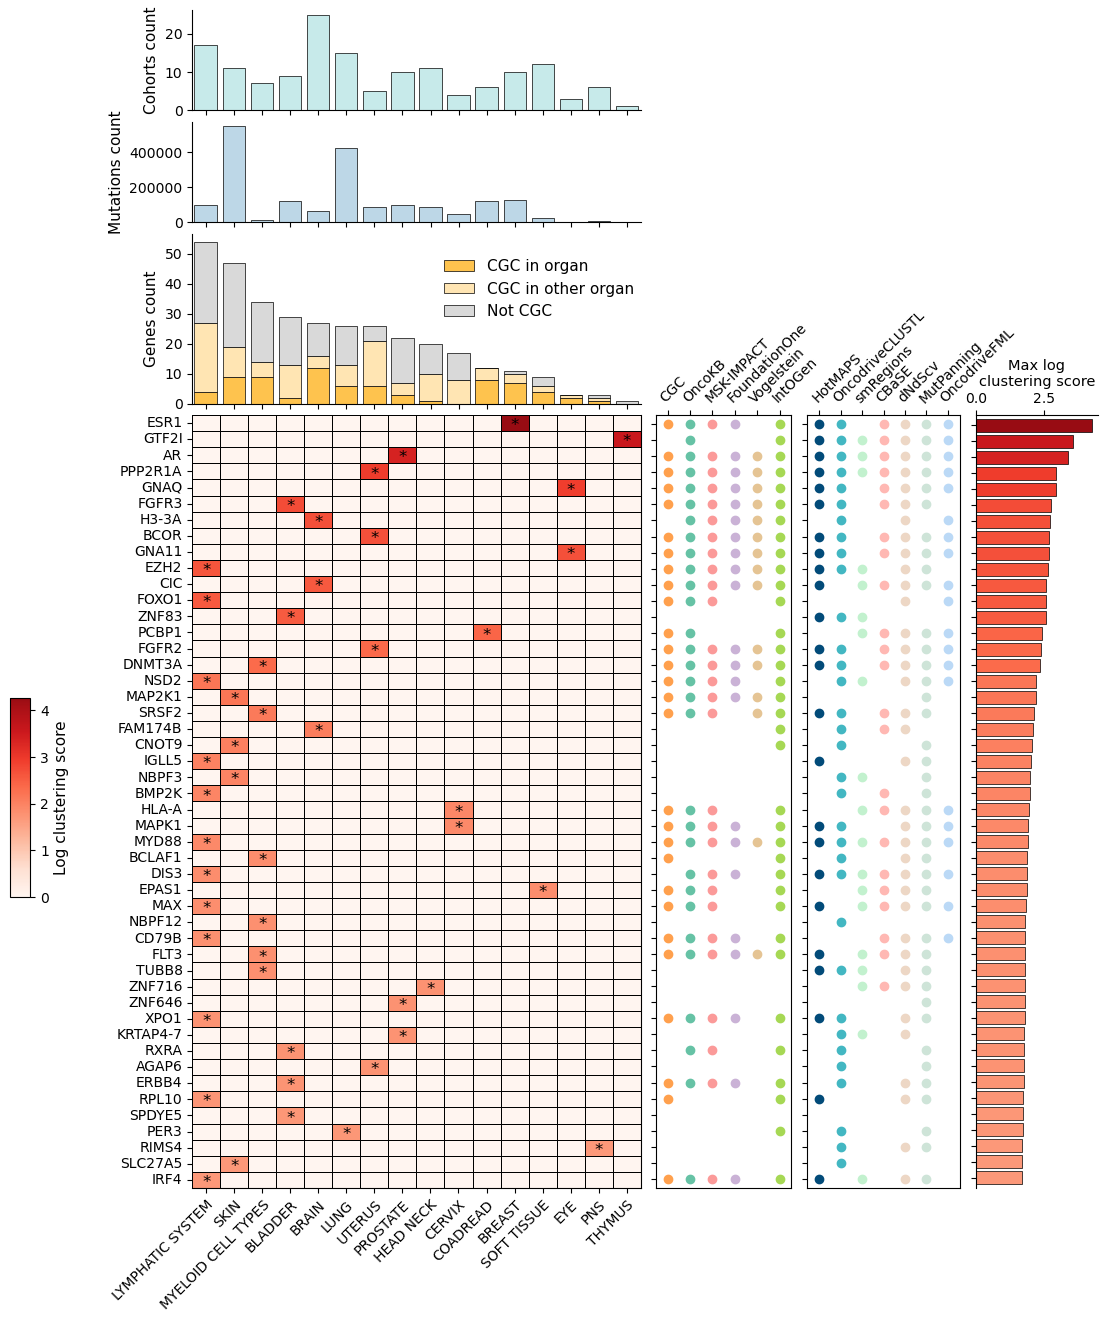

In [239]:
top_cohorts_n=None
top_genes_n=48

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                             cohort_df, 
                                                                                             o3d_output_dir=o3d_output_dir,
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_organ=True,
                                                                                             sort_by_score_only=False,
                                                                                             genes_in_one_cohort=True)

df_anomaly.columns = [cancer.replace("_", " ") for cancer in df_anomaly.columns]
df_anomaly.columns = [cancer.replace("LYMPH", "LYMPHATIC SYSTEM") for cancer in df_anomaly.columns]
df_anomaly.columns = [cancer.replace("MYELOID", "MYELOID CELL TYPES") for cancer in df_anomaly.columns]
annot_df = get_annot_gene_df(df_binary.index, genetable, uniq_drivers_df, oncokb_df, cgc_df)

plot_landscape(df=df_binary, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(13.5,15.3),
               width_ratios=[0.7, 0.21, 0.24, 0.19, 0.195],
               height_ratios=[0.13, 0.13, 0.22, 1],
               cbar_loc=[-0.01, 0.3, 0.015, .13],
               legend_box=(-2.7, 1.22),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_margin=0.012,
               ax6_xmargin=0.1,
               wspace=0.08, 
               hspace=0.04,
               plot_max_score=True,
               plot_cohort_count_top=True,
               plot_cohort_count_right=False,
               log_mut_count=False,
               grouped_by_organ=True)

### Look for interesting cases

#### Check cohorts and mut count

In [973]:
set([cohort.split("_")[0] for cohort in cohort_df.COHORT])

{'CBIOP',
 'CGCI',
 'CPTAC',
 'HARTWIG',
 'ICGC',
 'OTHER',
 'PCAWG',
 'PEDCBIOP',
 'STJUDE',
 'TARGET',
 'TCGA'}

In [975]:
cohort_df[cohort_df.COHORT.str.startswith("TARGET")]

COHORT CANCER_TYPE PLATFORM  MUTATIONS  SAMPLES
170    TARGET_WGS_NBL_US         NBL      WGS      15573      212
241     TARGET_WGS_WT_US          WT      WGS       1534       34
242  TARGET_WXS_AML_2020         AML      WXS        962       22
245   TARGET_WXS_OS_2020          OS      WXS      18875       97

In [952]:
hits_df = get_hits(genetable)
len(hits_df.Cohort.unique())

135

In [955]:
len(genetable.Cohort.unique())

214

In [966]:
# I got 4 cohorts in MYELOID but I have 7, cause I am looking at only the ones that I have hits
ix = cohort_df[cohort_df["GENERAL_CANCER_TYPE"] == "MYELOID"].COHORT.str.startswith("ICGC")
cohort_df[cohort_df["GENERAL_CANCER_TYPE"] == "MYELOID"][~ix]

COHORT CANCER_TYPE PLATFORM  MUTATIONS  SAMPLES  \
6          STJUDE_WGS_D_AML_2018         AML      WGS      30265       21   
176        PCAWG_WGS_MYELOID_AML         AML      WGS      20309       13   
183        PCAWG_WGS_MYELOID_MPN         MDS      WGS      25023       23   
188  OTHER_WXS_AML_PRY_BEAT_2018         AML      WXS      79225      257   
217         PEDCBIOP_WXS_AML_PRY         AML      WXS        233       28   
242          TARGET_WXS_AML_2020         AML      WXS        962       22   
246                 TCGA_WXS_AML         AML      WXS       8313      140   

    GENERAL_CANCER_TYPE  
6               MYELOID  
176             MYELOID  
183             MYELOID  
188             MYELOID  
217             MYELOID  
242             MYELOID  
246             MYELOID

#### Check for IntOGen results matching with what I see

In [240]:
#### MED12 in IntOGen results to be detected by combination, CBaSE, OncodriveCLUSTL but they all have a qval > 0.01
display(genetable[(genetable["Gene"] == "MED12") & (genetable["cbase_qval"] < 0.1)][["Gene", "Cancer", "Cohort", "cbase_pval", "cbase_qval"]])
display(genetable[(genetable["Gene"] == "MED12") & (genetable["clustl_qval"] < 0.1)][["Gene", "Cancer", "Cohort", "clustl_pval", "clustl_qval"]])

Gene  Cancer           Cohort  cbase_pval  cbase_qval
3321799  MED12  LGGNOS  TCGA_WXS_LGGNOS    0.000185    0.093243
4132040  MED12    CESC    TCGA_WXS_CESC    0.000110    0.068667

Gene Cancer                Cohort  clustl_pval  clustl_qval
1627394  MED12   PRAD  CBIOP_WXS_PRAD_BROAD     0.013592     0.084334

#### Look for individual cases

In [221]:
df_complete = o3d_output.groupby("Gene").apply(
    lambda x: x.sort_values("Clustering_score", ascending=False).iloc[0]).sort_values("Clustering_score", ascending=False)
df_complete[:30]

GENERAL_CANCER_TYPE     Gene  Clustering_score
Gene                                                  
BRAF                THYROID     BRAF        179.618281
IDH1                  BRAIN     IDH1        170.296501
KRAS               COADREAD     KRAS         88.347831
NRAS                  LYMPH     NRAS         81.875684
ESR1                 BREAST     ESR1         70.640336
PIK3CA               BREAST   PIK3CA         60.347787
CTNNB1               UTERUS   CTNNB1         43.402745
PTEN                 UTERUS     PTEN         41.634486
TP53               COADREAD     TP53         37.386387
EGFR                   LUNG     EGFR         35.581750
GTF2I                THYMUS    GTF2I         35.263297
AR                 PROSTATE       AR         28.932888
SPOP               PROSTATE     SPOP         26.355313
NFE2L2                 LUNG   NFE2L2         20.512420
PPP2R1A              UTERUS  PPP2R1A         18.677192
GNAQ                    EYE     GNAQ         18.591696
FBXW7              COADREAD    FBXW7         17.195667
FGFR3               BLADDER    FGFR3         15.401595
H3-3A                 BRAIN    H3-3A         14.937598
AKT1                 BREAST     AKT1         14.870668
BCOR                 UTERUS     BCOR         14.761121
GNA11                   EYE    GNA11         14.753669
HRAS              HEAD_NECK     HRAS         14.531444
SF3B1                   EYE    SF3B1         14.147752
EZH2                  LYMPH     EZH2         14.046783
CIC                   BRAIN      CIC         13.067384
FOXO1                 LYMPH    FOXO1         13.000404
ZNF83               BLADDER    ZNF83         12.892111
PCBP1              COADREAD    PCBP1         11.223980
LILRB2               CERVIX   LILRB2         10.958535

In [477]:
o3d_output[o3d_output["Gene"] == "ZNF83"]

Cohort   Gene Uniprot_ID    qval  C_gene  \
17443            CBIOP_WXS_BLCA_BGI  ZNF83     P51522  0.0000     1.0   
26444  CBIOP_WXS_SCLC_UCOLOGNE_2015  ZNF83     P51522  0.4982     0.0   
30109   OTHER_WGS_DLBCL_NATCOM_2018  ZNF83     P51522  1.0000     0.0   

           C_pos  Clustering_score  CGC  Fish  
17443  [293 290]         12.892111    0     0  
26444  [280 281]          3.046575    0     0  
30109        NaN          1.377934    0     0

In [493]:
o3d_output[o3d_output["Gene"] == "LILRB2"]

Cohort    Gene Uniprot_ID  qval  C_gene  \
19044    CGCI_WGS_CESC_2020  LILRB2     Q8N423   0.0     1.0   
19489    CBIOP_WXS_ACY_2019  LILRB2     Q8N423   1.0     0.0   
25265  CBIOP_WXS_LUAD_BROAD  LILRB2     Q8N423   1.0     0.0   
25759      CGCI_WGS_BL_2020  LILRB2     Q8N423   0.0     1.0   

                       C_pos  Clustering_score  CGC  Fish  
19044  [374 373 372 371 375]          2.394119  0.0   0.0  
19489                    NaN          0.489121  0.0   0.0  
25265                    NaN         -0.078369  0.0   0.0  
25759  [374 373 372 371 375]          2.263069  0.0   0.0

## Clustering score density plots

### TCGA

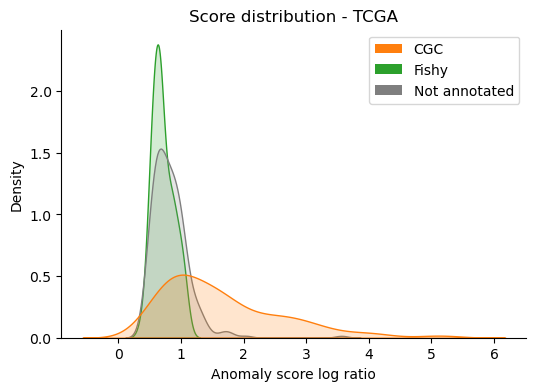

In [562]:
gene_colors, lut = get_gene_annotation(df_binary, genetable_subset)

# Get df with scores
o3d_output = get_anomaly_df(genetable_subset, o3d_output_dir)
o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])
o3d_output = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)
o3d_output["Annotation"] = o3d_output.apply(lambda x: "CGC" if x["CGC"] == 1 else "Fishy" if x["Fish"] == 1 else "Not annotated", axis=1)

## Plot 
plt.figure(figsize=(6, 4))
palette = {'CGC': lut["CGC"], 'Fishy': lut["Fishy"], 'Not annotated': lut["Not annotated"]}
sns.kdeplot(data=o3d_output, x='Clustering_score', hue='Annotation', fill=True, common_norm=False, palette=palette, alpha=0.2)

# Add labels and a legend
plt.xlabel('Anomaly score log ratio')
plt.ylabel('Density')
plt.title("Score distribution - TCGA", fontsize=12)

handles = [mpatches.Patch(facecolor=lut["CGC"], label="CGC"),
           mpatches.Patch(facecolor=lut["Fishy"], label="Fishy"),
           mpatches.Patch(facecolor=lut["Not annotated"], label="Not annotated")]
plt.legend(handles=handles)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig("score_distribution_tcga.png", dpi=300, bbox_inches='tight')
plt.show()

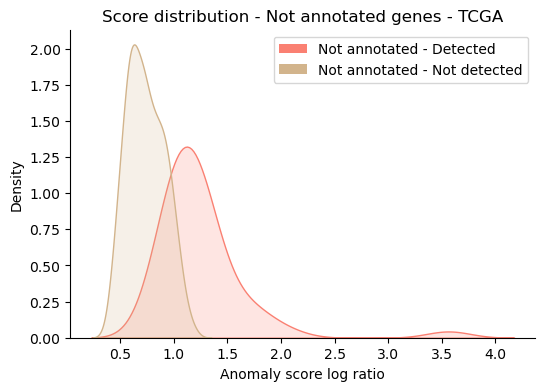

In [563]:
# Get df with scores
o3d_output = get_anomaly_df(genetable_subset, o3d_output_dir)
o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])
o3d_output = o3d_output[(o3d_output["CGC"] == 0) & (o3d_output["Fish"] == 0)]
o3d_output["Annotation"] = o3d_output["C_gene"]
o3d_output = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)

## Plot 
plt.figure(figsize=(6, 4))
palette = {1: "salmon", 0: "tan"}
sns.kdeplot(data=o3d_output, x='Clustering_score', hue='Annotation', fill=True, common_norm=False, palette=palette, alpha=0.2)

# Add labels and a legend
plt.xlabel('Anomaly score log ratio')
plt.ylabel('Density')
plt.title("Score distribution - Not annotated genes - TCGA", fontsize=12)

handles = [mpatches.Patch(facecolor="salmon", label="Not annotated - Detected"),
           mpatches.Patch(facecolor="tan", label="Not annotated - Not detected")]
plt.legend(handles=handles)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig("score_distribution_Not annotated_tcga.png", dpi=300, bbox_inches='tight')
plt.show()

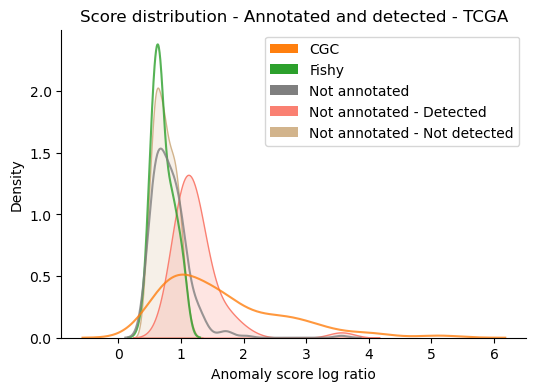

In [564]:
# Get df with scores with annotations
o3d_output = get_anomaly_df(genetable_subset, o3d_output_dir)
o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])
o3d_output2 = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)
o3d_output2["Annotation"] = o3d_output2.apply(lambda x: "CGC" if x["CGC"] == 1 else "Fishy" if x["Fish"] == 1 else "Not annotated", axis=1)

# Get df with scores of not annotated genes
o3d_output = get_anomaly_df(genetable_subset, o3d_output_dir)
o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])
o3d_output = o3d_output[(o3d_output["CGC"] == 0) & (o3d_output["Fish"] == 0)]
o3d_output["Annotation"] = o3d_output["C_gene"]
o3d_output = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)
o3d_output["Annotation"] = o3d_output["Annotation"].map({1 : "Not annotated - Detected", 0 : "Not annotated - Not detected"})

# Concat
o3d_output = pd.concat((o3d_output, o3d_output2)).reset_index(drop=True)


## Plot 
plt.figure(figsize=(6, 4))
palette = {'CGC': lut["CGC"], 'Fishy': lut["Fishy"], 'Not annotated': lut["Not annotated"], "Not annotated - Detected" : "salmon", "Not annotated - Not detected" : "tan"}
annotation_ix = (o3d_output["Annotation"] == "CGC") | (o3d_output["Annotation"] == "Fishy") | (o3d_output["Annotation"] == "Not annotated")
sns.kdeplot(data=o3d_output[~annotation_ix], x='Clustering_score', hue='Annotation', fill=True, common_norm=False, palette=palette, alpha=0.2)
sns.kdeplot(data=o3d_output[annotation_ix], x='Clustering_score', hue='Annotation', fill=False, common_norm=False, palette=palette, alpha=0.8)

# Add labels and a legend
plt.xlabel('Anomaly score log ratio')
plt.ylabel('Density')
plt.title("Score distribution - Annotated and detected - TCGA", fontsize=12)

handles = [mpatches.Patch(facecolor=lut["CGC"], label="CGC"),
           mpatches.Patch(facecolor=lut["Fishy"], label="Fishy"),
           mpatches.Patch(facecolor=lut["Not annotated"], label="Not annotated"),
           mpatches.Patch(facecolor="salmon", label="Not annotated - Detected"),
           mpatches.Patch(facecolor="tan", label="Not annotated - Not detected")]
plt.legend(handles=handles)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig("score_distribution_annotated_detected_tcga.png", dpi=300, bbox_inches='tight')
plt.show()

### All cohorts

#### Show tracks for example genes

In [ ]:
top_cohorts_n=None
top_genes_n=48

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                             cohort_df, 
                                                                                             o3d_output_dir=o3d_output_dir,
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_organ=True,
                                                                                             sort_by_score_only=False)

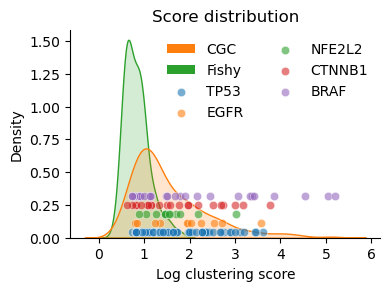

In [29]:
## Score distribution - CGC & Fishy - All cohorts

gene_colors, lut = get_gene_annotation(df_binary, genetable)

# Get df with scores
o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])
o3d_output = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)
o3d_output["Annotation"] = o3d_output.apply(lambda x: "CGC" if x["CGC"] == 1 else "Fishy" if x["Fish"] == 1 else "Not annotated", axis=1)
o3d_output = o3d_output[o3d_output["Annotation"] != "Not annotated"]

# Plot
plt.figure(figsize=(4, 2.7))
palette = {'CGC': lut["CGC"], 'Fishy': lut["Fishy"], 'Not annotated': lut["Not annotated"]}
sns.kdeplot(data=o3d_output, x='Clustering_score', hue='Annotation', fill=True, common_norm=False, palette=palette, alpha=0.2)
sns.scatterplot(data=o3d_output[o3d_output["Gene"] == "TP53"], x='Clustering_score', y=0.04, alpha=0.6, label="TP53")
sns.scatterplot(data=o3d_output[o3d_output["Gene"] == "EGFR"], x='Clustering_score', y=0.11, alpha=0.6, label="EGFR")
sns.scatterplot(data=o3d_output[o3d_output["Gene"] == "NFE2L2"], x='Clustering_score', y=0.18, alpha=0.6, label="NFE2L2")
sns.scatterplot(data=o3d_output[o3d_output["Gene"] == "CTNNB1"], x='Clustering_score', y=0.25, alpha=0.6, label="CTNNB1")
sns.scatterplot(data=o3d_output[o3d_output["Gene"] == "BRAF"], x='Clustering_score', y=0.32, alpha=0.6, label="BRAF")

# Add labels and a legend

plt.xlabel('Log clustering score')
plt.ylabel('Density')
plt.title("Score distribution", fontsize=12)

handles = [mpatches.Patch(facecolor=lut["CGC"], label="CGC"),
           mpatches.Patch(facecolor=lut["Fishy"], label="Fishy"),]
           #mpatches.Patch(facecolor=lut["Not annotated"], label="Not annotated")]

handles_scatter, labels_scatter = plt.gca().get_legend_handles_labels()

# Combine both sets of handles and labels
combined_handles = handles + handles_scatter
combined_labels = [handle.get_label() for handle in handles] + labels_scatter

# Add combined legend
plt.legend(combined_handles, combined_labels, frameon=False, ncols=2)



plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig("score_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

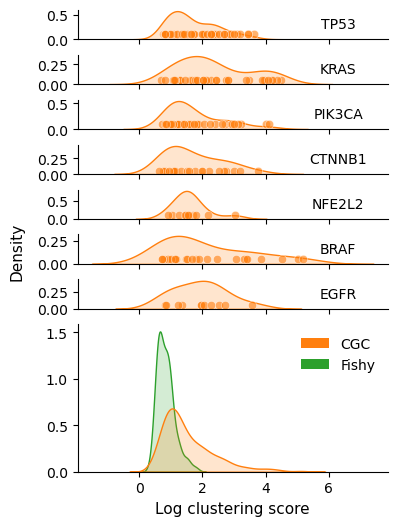

In [49]:
# Score distribution - CGC & Fishy - All cohorts
# ===============================================


# Get df with scores
# ------------------
o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])
o3d_output = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)
o3d_output["Annotation"] = o3d_output.apply(lambda x: "CGC" if x["CGC"] == 1 else "Fishy" if x["Fish"] == 1 else "Not annotated", axis=1)
o3d_output = o3d_output[o3d_output["Annotation"] != "Not annotated"]


# Plot
# ----

gene_colors, lut = get_gene_annotation(df_binary, genetable)
palette = {'CGC': lut["CGC"], 'Fishy': lut["Fishy"], 'Not annotated': lut["Not annotated"]}
genes = ["TP53", "KRAS", "PIK3CA", "CTNNB1", "NFE2L2", "BRAF", "EGFR"]
h_ratios = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5]


fig, ax = plt.subplots(len(h_ratios), 1, 
                       figsize=(4, 6), 
                       gridspec_kw={'height_ratios': h_ratios},
                       sharex=True)

sns.kdeplot(data=o3d_output, x='Clustering_score', hue='Annotation', fill=True, common_norm=False, palette=palette, alpha=0.2, ax=ax[len(genes)])

for i, gene in enumerate(genes):
    annotation = o3d_output[o3d_output["Gene"] == gene].Annotation.unique()[0]
    sns.kdeplot(data=o3d_output[o3d_output["Gene"] == gene], x='Clustering_score', fill=True, common_norm=False, color=palette[annotation], alpha=0.2, ax=ax[i])

    n = max(ax[i].get_yticks())
    sns.scatterplot(data=o3d_output[o3d_output["Gene"] == gene], x='Clustering_score', y=n*0.1, alpha=0.6, color=palette[annotation], ax=ax[i])
    ax[i].set_ylabel(gene, fontsize=10, rotation=0, va='center')
    ax[i].yaxis.set_label_coords(0.84, 0.5)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
ax[i+1].spines['right'].set_visible(False)
ax[i+1].spines['top'].set_visible(False)

handles = [mpatches.Patch(facecolor=lut["CGC"], label="CGC"),
           mpatches.Patch(facecolor=lut["Fishy"], label="Fishy"),]
           #mpatches.Patch(facecolor=lut["Not annotated"], label="Not annotated")]
plt.legend(handles=handles, frameon=False, fontsize=10)

plt.xlabel('Log clustering score', fontsize=11)
ax[len(genes)].set_ylabel("Density", fontsize=11)
ax[len(genes)].yaxis.set_label_coords(-0.17, 1.5)
plt.subplots_adjust(hspace=0.35)
    
plt.show()

/tmp/ipykernel_22745/1611404038.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o3d_output_noannot["Annotation"] = o3d_output_noannot["C_gene"]
/tmp/ipykernel_22745/1611404038.py:43: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=o3d_output2[o3d_output2["Gene"] == gene], x='Clustering_score',


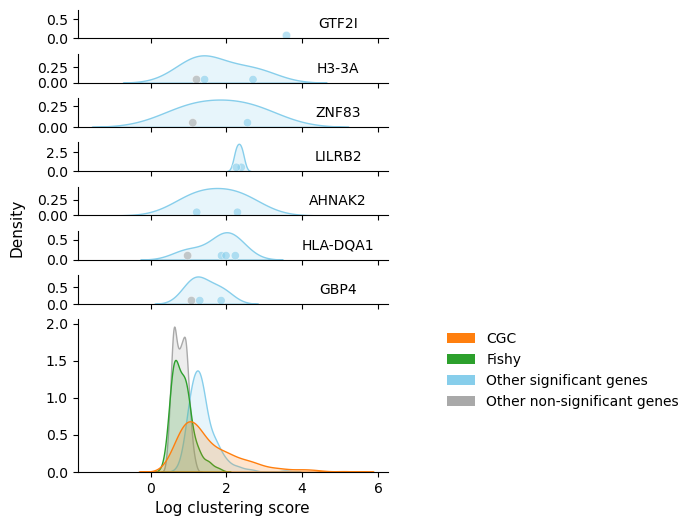

In [51]:
# Score distribution - Annotated and detected - All cohorts - Show only non CGC genes
# ===================================================================================


# Get df with scores with annotations
# -----------------------------------

o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])

o3d_output_annot = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)
o3d_output_annot["Annotation"] = o3d_output_annot.apply(lambda x: "CGC" if x["CGC"] == 1 else "Fishy" if x["Fish"] == 1 else "Not annotated", axis=1)
o3d_output_annot = o3d_output_annot[o3d_output_annot["Annotation"] != "Not annotated"]

# Get df with scores of not annotated genes
o3d_output_noannot = o3d_output[(o3d_output["CGC"] == 0) & (o3d_output["Fish"] == 0)]
o3d_output_noannot["Annotation"] = o3d_output_noannot["C_gene"]
o3d_output_noannot = o3d_output_noannot[o3d_output_noannot["qval"] < 1].reset_index(drop=True)
o3d_output_noannot["Annotation"] = o3d_output_noannot["Annotation"].map({1 : "Other significant genes", 0 : "Other non significant genes"})

o3d_output2 = pd.concat((o3d_output_annot, o3d_output_noannot)).reset_index(drop=True)


# Plot 
# ----
# cgc_genes = ["TP53", "EGFR", "NFE2L2", "CTNNB1", "BRAF"]
# non_cgc_genes = ["GTF2I", "H3-3A", "ZNF83", "LILRB2", "AHNAK2", "HLA-DQA1", "GBP4"]
genes = ["GTF2I", "H3-3A", "ZNF83", "LILRB2", "AHNAK2", "HLA-DQA1", "GBP4"]

palette = {'CGC': lut["CGC"], 'Fishy': lut["Fishy"], "Other significant genes" : "skyblue", "Other non significant genes" : "darkgray"}
h_ratios = [0.1 for gene in genes] + [0.53]

fig, ax = plt.subplots(len(h_ratios), 1, 
                       figsize=(4, 6), 
                       gridspec_kw={'height_ratios': h_ratios},
                       sharex=True)

sns.kdeplot(data=o3d_output2, x='Clustering_score', hue='Annotation', fill=True, common_norm=False, palette=palette, alpha=0.2, ax=ax[len(genes)])

for i, gene in enumerate(genes):
    annotation = o3d_output2[o3d_output2["Gene"] == gene].Annotation.unique()
    annotation = annotation[0] if len(annotation) == 1 else 'Other significant genes'
    sns.kdeplot(data=o3d_output2[o3d_output2["Gene"] == gene], x='Clustering_score', 
                fill=True, common_norm=False, color=palette[annotation], alpha=0.2, ax=ax[i])
    
    n = max(ax[i].get_yticks())
    sns.scatterplot(data=o3d_output2[o3d_output2["Gene"] == gene], x='Clustering_score', 
                    y=n*0.1, alpha=0.6, hue="Annotation", palette=palette, ax=ax[i], legend=False)
    
    ax[i].set_ylabel(gene, fontsize=10, rotation=0, va='center')
    ax[i].yaxis.set_label_coords(0.84, 0.5)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    y_ticks = np.linspace(0, n, 3)[:2]  
    ax[i].set_yticks(y_ticks)
    if gene == "GTF2I":
        ax[i].set_ylim([0, 0.75])

ax[i+1].spines['right'].set_visible(False)
ax[i+1].spines['top'].set_visible(False)

# Add labels and a legend
plt.xlabel('Log clustering score')
plt.ylabel('Density')

handles = [mpatches.Patch(facecolor=lut["CGC"], label="CGC"),
           mpatches.Patch(facecolor=lut["Fishy"], label="Fishy"),
           mpatches.Patch(facecolor="skyblue", label="Other significant genes"),
           mpatches.Patch(facecolor="darkgray", label="Other non-significant genes")]
plt.legend(handles=handles, bbox_to_anchor=[0.8,0,1.18,1], frameon=False, fontsize=10)


plt.xlabel('Log clustering score', fontsize=11)
ax[len(genes)].set_ylabel("Density", fontsize=11)
ax[len(genes)].yaxis.set_label_coords(-0.17, 1.6)
plt.subplots_adjust(hspace=0.35)

#plt.savefig("score_distribution_annotated_detected.png", dpi=300, bbox_inches='tight')
plt.show()

In [38]:
# # Score distribution - Annotated and detected - All cohorts
# # =========================================================


# # Get df with scores with annotations
# # -----------------------------------

# o3d_output = get_anomaly_df(genetable, o3d_output_dir)
# o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])

# o3d_output_annot = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)
# o3d_output_annot["Annotation"] = o3d_output_annot.apply(lambda x: "CGC" if x["CGC"] == 1 else "Fishy" if x["Fish"] == 1 else "Not annotated", axis=1)
# o3d_output_annot = o3d_output_annot[o3d_output_annot["Annotation"] != "Not annotated"]

# # Get df with scores of not annotated genes
# o3d_output_noannot = o3d_output[(o3d_output["CGC"] == 0) & (o3d_output["Fish"] == 0)]
# o3d_output_noannot["Annotation"] = o3d_output_noannot["C_gene"]
# o3d_output_noannot = o3d_output_noannot[o3d_output_noannot["qval"] < 1].reset_index(drop=True)
# o3d_output_noannot["Annotation"] = o3d_output_noannot["Annotation"].map({1 : "Other significant genes", 0 : "Other non significant genes"})

# o3d_output2 = pd.concat((o3d_output_annot, o3d_output_noannot)).reset_index(drop=True)


# # Plot 
# # ----
# cgc_genes = ["TP53", "EGFR", "NFE2L2", "CTNNB1", "BRAF"]
# non_cgc_genes = ["GTF2I", "H3-3A", "ZNF83", "LILRB2", "AHNAK2", "HLA-DQA1", "GBP4"]
# genes = cgc_genes + non_cgc_genes

# palette = {'CGC': lut["CGC"], 'Fishy': lut["Fishy"], "Other significant genes" : "skyblue", "Other non significant genes" : "darkgray"}
# h_ratios = [0.1 for gene in genes] + [0.55]

# fig, ax = plt.subplots(len(h_ratios), 1, 
#                        figsize=(4, 9), 
#                        gridspec_kw={'height_ratios': h_ratios},
#                        sharex=True)

# sns.kdeplot(data=o3d_output2, x='Clustering_score', hue='Annotation', fill=True, common_norm=False, palette=palette, alpha=0.2, ax=ax[len(genes)])

# for i, gene in enumerate(genes):
#     annotation = o3d_output2[o3d_output2["Gene"] == gene].Annotation.unique()
#     annotation = annotation[0] if len(annotation) == 1 else 'Other significant genes'
#     sns.kdeplot(data=o3d_output2[o3d_output2["Gene"] == gene], x='Clustering_score', 
#                 fill=True, common_norm=False, color=palette[annotation], alpha=0.2, ax=ax[i])
    
#     n = max(ax[i].get_yticks())
#     sns.scatterplot(data=o3d_output2[o3d_output2["Gene"] == gene], x='Clustering_score', 
#                     y=n*0.1, alpha=0.6, hue="Annotation", palette=palette, ax=ax[i], legend=False)
    
#     ax[i].set_ylabel(gene, fontsize=10, rotation=0, va='center')
#     ax[i].yaxis.set_label_coords(0.84, 0.5)
#     ax[i].spines['right'].set_visible(False)
#     ax[i].spines['top'].set_visible(False)

#     y_ticks = np.linspace(0, n, 3)[:2]  
#     ax[i].set_yticks(y_ticks)
#     if gene == "GTF2I":
#         ax[i].set_ylim([0, 0.75])

# ax[i+1].spines['right'].set_visible(False)
# ax[i+1].spines['top'].set_visible(False)

# # Add labels and a legend
# plt.xlabel('Log clustering score')
# plt.ylabel('Density')

# handles = [mpatches.Patch(facecolor=lut["CGC"], label="CGC"),
#            mpatches.Patch(facecolor=lut["Fishy"], label="Fishy"),
#            mpatches.Patch(facecolor="skyblue", label="Other significant genes"),
#            mpatches.Patch(facecolor="darkgray", label="Other non-significant genes")]
# plt.legend(handles=handles, bbox_to_anchor=[0,0,1.18,1], frameon=False, fontsize=10)


# plt.xlabel('Log clustering score', fontsize=11)
# ax[len(genes)].set_ylabel("Density", fontsize=11)
# ax[len(genes)].yaxis.set_label_coords(-0.17, 2)
# # fig.suptitle("Score distribution - Annotated and detected", fontsize=12)
# # plt.subplots_adjust(top=0.92) 

# #plt.savefig("score_distribution_annotated_detected.png", dpi=300, bbox_inches='tight')
# plt.show()

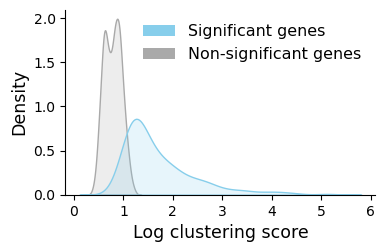

In [42]:
## Score distribution - Significant & non-significant - All cohorts

gene_colors, lut = get_gene_annotation(df_binary, genetable)

# Get df with scores
o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])
o3d_output = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)
o3d_output["C_gene"] = o3d_output["C_gene"].map({1 : "Significant", 0 : "Non-significant"})

# Plot
plt.figure(figsize=(4, 2.4))
palette = {'Significant': "skyblue", 'Non-significant': "darkgray"}
sns.kdeplot(data=o3d_output, x='Clustering_score', hue='C_gene', fill=True, common_norm=False, palette=palette, alpha=0.2)

# Add labels and a legend
plt.xlabel('Log clustering score', fontsize=12.5)
plt.ylabel('Density', fontsize=12.5)
#plt.title("Score distribution - Significant & non - All cohorts", fontsize=12)

handles = [mpatches.Patch(facecolor="skyblue", label="Significant genes"),
           mpatches.Patch(facecolor="darkgray", label="Non-significant genes"),]
           #mpatches.Patch(facecolor=lut["Not annotated"], label="Not annotated")]
plt.legend(handles=handles, frameon=False, fontsize=11.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig("score_distribution_significant_nonsignificant.png", dpi=300, bbox_inches='tight')
plt.show()

#### Test distributions

/tmp/ipykernel_22745/3391429150.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=o3d_output, x="Annotation", y="Clustering_score", palette=palette, linewidth = 1, alpha = 0.5)


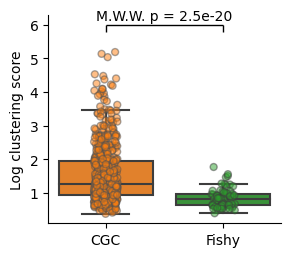

In [161]:
fig, ax = plt.subplots(figsize=(3, 2.7))  
sns.boxplot(data=o3d_output, x="Annotation", y="Clustering_score", palette=palette, showfliers = False)
sns.stripplot(data=o3d_output, x="Annotation", y="Clustering_score", palette=palette, linewidth = 1, alpha = 0.5)
plt.hlines(y=6, xmin=0, xmax=1, colors='black', linewidth=1)
plt.vlines(x=0, ymin=5.8, ymax=6, colors='black', linewidth=1)
plt.vlines(x=1, ymin=5.8, ymax=6, colors='black', linewidth=1)
plt.text(x=0.5, y=6.05, s=f'M.W.W. p = {p_value:.1e}', ha='center', va='bottom', fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel(None)
plt.ylabel("Log clustering score")
plt.show()

In [103]:
cgc_score= o3d_output[o3d_output["Annotation"] == "CGC"].Clustering_score.values
fishy_score= o3d_output[o3d_output["Annotation"] == "Fishy"].Clustering_score.values
stat, p_value = stats.mannwhitneyu(cgc_score, fishy_score, alternative='greater')
p_value

2.5202171778703703e-20

#### Just the basic plot

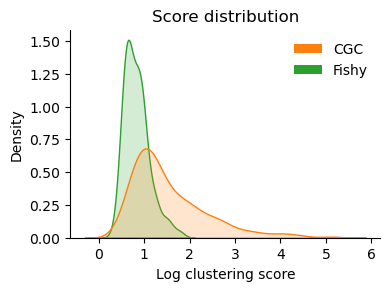

In [488]:
## Score distribution - CGC & Fishy - All cohorts

gene_colors, lut = get_gene_annotation(df_binary, genetable)

# Get df with scores
o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])
o3d_output = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)
o3d_output["Annotation"] = o3d_output.apply(lambda x: "CGC" if x["CGC"] == 1 else "Fishy" if x["Fish"] == 1 else "Not annotated", axis=1)
o3d_output = o3d_output[o3d_output["Annotation"] != "Not annotated"]

# Plot
plt.figure(figsize=(4, 2.7))
palette = {'CGC': lut["CGC"], 'Fishy': lut["Fishy"], 'Not annotated': lut["Not annotated"]}
sns.kdeplot(data=o3d_output, x='Clustering_score', hue='Annotation', fill=True, common_norm=False, palette=palette, alpha=0.2)

# Add labels and a legend
plt.xlabel('Log clustering score')
plt.ylabel('Density')
plt.title("Score distribution", fontsize=12)

handles = [mpatches.Patch(facecolor=lut["CGC"], label="CGC"),
           mpatches.Patch(facecolor=lut["Fishy"], label="Fishy"),]
           #mpatches.Patch(facecolor=lut["Not annotated"], label="Not annotated")]
plt.legend(handles=handles, frameon=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig("score_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

/tmp/jobs/spellegrini/9964934/ipykernel_20268/1813599401.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o3d_output_noannot["Annotation"] = o3d_output_noannot["C_gene"]


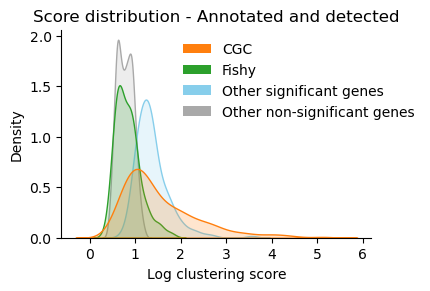

In [489]:
## Score distribution - Annotated and detected - All cohorts

# Get df with scores with annotations
o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])

o3d_output_annot = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)
o3d_output_annot["Annotation"] = o3d_output_annot.apply(lambda x: "CGC" if x["CGC"] == 1 else "Fishy" if x["Fish"] == 1 else "Not annotated", axis=1)
o3d_output_annot = o3d_output_annot[o3d_output_annot["Annotation"] != "Not annotated"]

# Get df with scores of not annotated genes
o3d_output_noannot = o3d_output[(o3d_output["CGC"] == 0) & (o3d_output["Fish"] == 0)]
o3d_output_noannot["Annotation"] = o3d_output_noannot["C_gene"]
o3d_output_noannot = o3d_output_noannot[o3d_output_noannot["qval"] < 1].reset_index(drop=True)
o3d_output_noannot["Annotation"] = o3d_output_noannot["Annotation"].map({1 : "Other significant genes", 0 : "Other non significant genes"})

o3d_output2 = pd.concat((o3d_output_annot, o3d_output_noannot)).reset_index(drop=True)


## Plot 
plt.figure(figsize=(4, 2.7))
palette = {'CGC': lut["CGC"], 'Fishy': lut["Fishy"], "Other significant genes" : "skyblue", "Other non significant genes" : "darkgray"}
# annotation_ix = (o3d_output["Annotation"] == "CGC") | (o3d_output["Annotation"] == "Fishy") | (o3d_output["Annotation"] == "Not annotated")
sns.kdeplot(data=o3d_output2, x='Clustering_score', hue='Annotation', fill=True, common_norm=False, palette=palette, alpha=0.2)
# sns.kdeplot(data=o3d_output[annotation_ix], x='Clustering_score', hue='Annotation', fill=False, common_norm=False, palette=palette, alpha=0.8)

# Add labels and a legend
plt.xlabel('Log clustering score')
plt.ylabel('Density')
plt.title("Score distribution - Annotated and detected", fontsize=12)

handles = [mpatches.Patch(facecolor=lut["CGC"], label="CGC"),
           mpatches.Patch(facecolor=lut["Fishy"], label="Fishy"),
           mpatches.Patch(facecolor="skyblue", label="Other significant genes"),
           mpatches.Patch(facecolor="darkgray", label="Other non-significant genes")]
plt.legend(handles=handles, bbox_to_anchor=[0,0,1.18,1], frameon=False)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig("score_distribution_annotated_detected.png", dpi=300, bbox_inches='tight')
plt.show()

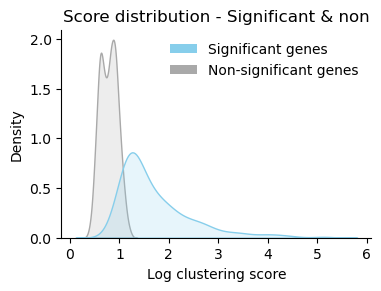

In [490]:
## Score distribution - Significant & non-significant - All cohorts

gene_colors, lut = get_gene_annotation(df_binary, genetable)

# Get df with scores
o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])
o3d_output = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)
o3d_output["C_gene"] = o3d_output["C_gene"].map({1 : "Significant", 0 : "Non-significant"})

# Plot
plt.figure(figsize=(4, 2.7))
palette = {'Significant': "skyblue", 'Non-significant': "darkgray"}
sns.kdeplot(data=o3d_output, x='Clustering_score', hue='C_gene', fill=True, common_norm=False, palette=palette, alpha=0.2)

# Add labels and a legend
plt.xlabel('Log clustering score')
plt.ylabel('Density')
plt.title("Score distribution - Significant & non", fontsize=12)

handles = [mpatches.Patch(facecolor="skyblue", label="Significant genes"),
           mpatches.Patch(facecolor="darkgray", label="Non-significant genes"),]
           #mpatches.Patch(facecolor=lut["Not annotated"], label="Not annotated")]
plt.legend(handles=handles, frameon=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig("score_distribution_significant_nonsignificant.png", dpi=300, bbox_inches='tight')
plt.show()

#### Max score distribution

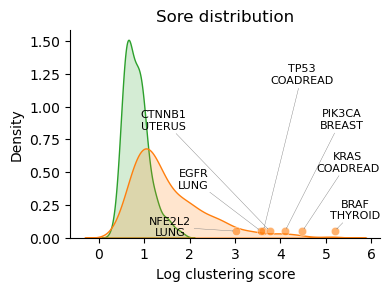

In [80]:
# Max score distribution - CGC & Fishy - All cohorts
# ==================================================


# Get df with scores
# ------------------

o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])
o3d_output = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)
o3d_output["Annotation"] = o3d_output.apply(lambda x: "CGC" if x["CGC"] == 1 else "Fishy" if x["Fish"] == 1 else "Not annotated", axis=1)
o3d_output = o3d_output[o3d_output["Annotation"] != "Not annotated"]

# Get max
idx = o3d_output.groupby("Gene")["Clustering_score"].idxmax()
o3d_output_max = o3d_output.loc[idx].reset_index(drop=True)
o3d_output_max = o3d_output_max.merge(cohort_df[["COHORT", "GENERAL_CANCER_TYPE"]].rename(columns={"COHORT" : "Cohort"}), 
                                      on="Cohort", how="left")

# Plot
# ----

expand_text_xy=(3.1, 2)
genes = ["TP53", "KRAS", "PIK3CA", "CTNNB1", "NFE2L2", "BRAF", "EGFR"]
#non_cgc_genes = ["GTF2I", "H3-3A", "ZNF83", "LILRB2", "AHNAK2", "HLA-DQA1", "GBP4"]


fig, ax = plt.subplots(figsize=(4, 2.7))    
palette = {'CGC': lut["CGC"], 'Fishy': lut["Fishy"], 'Not annotated': lut["Not annotated"]}
sns.kdeplot(data=o3d_output, x='Clustering_score', hue='Annotation', fill=True, common_norm=False, palette=palette, alpha=0.2, legend=False)

# Text annotations
annotations = []
for i, gene in enumerate(genes):
    o3d_output_gene = o3d_output_max[o3d_output_max["Gene"] == gene]
    ttype = o3d_output_gene.GENERAL_CANCER_TYPE.unique()[0]
    annotation = o3d_output_gene.Annotation.unique()[0]
    sns.scatterplot(data=o3d_output_gene, x='Clustering_score',
                    y=0.05, alpha=0.6, color=palette[annotation])
    annotations.append(ax.text(o3d_output_gene["Clustering_score"], 0.05, f"{gene}\n{ttype}", fontsize=8, color='black'))
adjust_text(annotations, expand=expand_text_xy, 
            arrowprops=dict(arrowstyle='->', color='gray'), lw=0.3, ax=ax)

# Add labels and a legend
plt.xlabel('Log clustering score')
plt.ylabel('Density')
plt.title("Sore distribution", fontsize=12)

# handles = [mpatches.Patch(facecolor=lut["CGC"], label="CGC"),
#            mpatches.Patch(facecolor=lut["Fishy"], label="Fishy"),]
#            #mpatches.Patch(facecolor=lut["Not annotated"], label="Not annotated")]
# plt.legend(handles=handles, frameon=False, loc="upper center")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig("score_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_22745/2094422249.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o3d_output_noannot["Annotation"] = o3d_output_noannot["C_gene"]


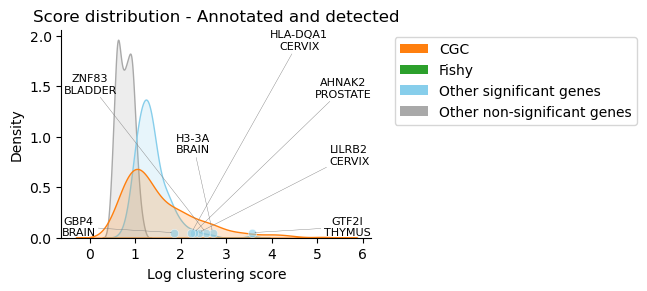

In [79]:
# Max score distribution - Annotated and detected - All cohorts
# =============================================================

# Get df with scores
# ------------------

o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])

o3d_output_annot = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)
o3d_output_annot["Annotation"] = o3d_output_annot.apply(lambda x: "CGC" if x["CGC"] == 1 else "Fishy" if x["Fish"] == 1 else "Not annotated", axis=1)
o3d_output_annot = o3d_output_annot[o3d_output_annot["Annotation"] != "Not annotated"]

# Get df with scores of not annotated genes
o3d_output_noannot = o3d_output[(o3d_output["CGC"] == 0) & (o3d_output["Fish"] == 0)]
o3d_output_noannot["Annotation"] = o3d_output_noannot["C_gene"]
o3d_output_noannot = o3d_output_noannot[o3d_output_noannot["qval"] < 1].reset_index(drop=True)
o3d_output_noannot["Annotation"] = o3d_output_noannot["Annotation"].map({1 : "Other significant genes", 0 : "Other non significant genes"})

o3d_output2 = pd.concat((o3d_output_annot, o3d_output_noannot)).reset_index(drop=True)

# Get max
idx = o3d_output2.groupby("Gene")["Clustering_score"].idxmax()
o3d_output2_max = o3d_output2.loc[idx].reset_index(drop=True)
o3d_output2_max = o3d_output2_max.merge(cohort_df[["COHORT", "GENERAL_CANCER_TYPE"]].rename(columns={"COHORT" : "Cohort"}), 
                                        on="Cohort", how="left")

o3d_output2 = o3d_output2[o3d_output2["Annotation"] != "Fishy"]

# Plot 
# ----

expand_text_xy=(3.6, 3.2)
genes = ["GTF2I", "H3-3A", "ZNF83", "LILRB2", "AHNAK2", "HLA-DQA1", "GBP4"]

fig, ax = plt.subplots(figsize=(4, 2.7))     
palette = {'CGC': lut["CGC"], 'Fishy': lut["Fishy"], "Other significant genes" : "skyblue", "Other non significant genes" : "darkgray"}
sns.kdeplot(data=o3d_output2, x='Clustering_score', hue='Annotation', fill=True, common_norm=False, palette=palette, alpha=0.2)

# Text annotations
annotations = []
for i, gene in enumerate(genes):
    o3d_output_gene = o3d_output2_max[o3d_output2_max["Gene"] == gene]
    ttype = o3d_output_gene.GENERAL_CANCER_TYPE.unique()[0]
    annotation = o3d_output_gene.Annotation.unique()
    annotation = annotation[0] if len(annotation) == 1 else 'Other significant genes'
    sns.scatterplot(data=o3d_output_gene, x='Clustering_score',
                    y=0.05, alpha=0.6, color=palette[annotation])
    annotations.append(ax.text(o3d_output_gene["Clustering_score"], 0.05, f"{gene}\n{ttype}", fontsize=8, color='black'))
adjust_text(annotations, expand=expand_text_xy, 
            arrowprops=dict(arrowstyle='->', color='gray'), lw=0.3, ax=ax)

# Add labels and a legend
plt.xlabel('Log clustering score')
plt.ylabel('Density')
plt.title("Score distribution - Annotated and detected", fontsize=12)

handles = [mpatches.Patch(facecolor=lut["CGC"], label="CGC"),
           mpatches.Patch(facecolor=lut["Fishy"], label="Fishy"),
           mpatches.Patch(facecolor="skyblue", label="Other significant genes"),
           mpatches.Patch(facecolor="darkgray", label="Other non-significant genes")]
plt.legend(handles=handles, bbox_to_anchor=[0.7,0,1.18,1], frameon=True)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig("score_distribution_annotated_detected.png", dpi=300, bbox_inches='tight')
plt.show()

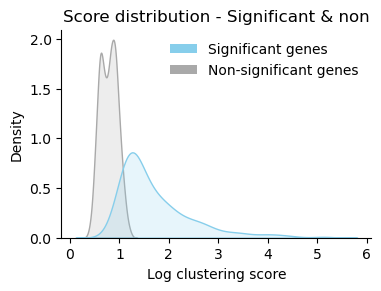

In [494]:
# Max score distribution - Significant & non-significant - All cohorts
# ================================================================

gene_colors, lut = get_gene_annotation(df_binary, genetable)

# Get df with scores
o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])
o3d_output = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)
o3d_output["C_gene"] = o3d_output["C_gene"].map({1 : "Significant", 0 : "Non-significant"})

# Get max
idx = o3d_output.groupby("Gene")["Clustering_score"].idxmax()
o3d_outputo3d_output2 = o3d_output.loc[idx].reset_index(drop=True)
o3d_output = o3d_output.merge(cohort_df[["COHORT", "GENERAL_CANCER_TYPE"]].rename(columns={"COHORT" : "Cohort"}), 
                              on="Cohort", how="left")

# Plot
plt.figure(figsize=(4, 2.7))
palette = {'Significant': "skyblue", 'Non-significant': "darkgray"}
sns.kdeplot(data=o3d_output, x='Clustering_score', hue='C_gene', fill=True, common_norm=False, palette=palette, alpha=0.2)

# Add labels and a legend
plt.xlabel('Log clustering score')
plt.ylabel('Density')
plt.title("Score distribution - Significant & non", fontsize=12)

handles = [mpatches.Patch(facecolor="skyblue", label="Significant genes"),
           mpatches.Patch(facecolor="darkgray", label="Non-significant genes"),]
           #mpatches.Patch(facecolor=lut["Not annotated"], label="Not annotated")]
plt.legend(handles=handles, frameon=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig("score_distribution_significant_nonsignificant.png", dpi=300, bbox_inches='tight')
plt.show()

## Highlight some interesting cases

In [369]:
def int_lst_from_str(str_lst):
    
    numbers = re.findall(r'\d+', str_lst)
    
    return np.array([int(num) for num in numbers])


def get_pos_clust_freq(gene_df, pos):

    tot_count = len(gene_df)
    count = sum([pos in gene_df.iloc[i].C_pos for i in range(tot_count)])
    
    return count / tot_count


def get_gene_clust_conservation(anomaly_df, gene):
    
    # Get df with cluster pos as list
    df = anomaly_df.copy()
    df = df[df["C_gene"] == 1]
    df = df[df["Gene"] == gene]
    df["C_pos"] = df.apply(lambda x: int_lst_from_str(x["C_pos"]), axis=1)
    
    # Get conservation of each cluster pos
    cluster_pos = np.sort(np.unique(np.concatenate(df["C_pos"].values)))
    final_df = pd.DataFrame({"Pos" : cluster_pos})
    print("Cohorts:", len(df))
    final_df["clusters_conservation"] = final_df.apply(lambda x: get_pos_clust_freq(df, x["Pos"]), axis=1)
    
    return final_df


def write_defattr_file(file_path, gene, uni_id, df, attr_name="clusters_conservation"):

    header = f"""#
#  Cluster conservation for {uni_id} ({gene})
#
#  Use this file to assign the attribute in Chimera with the 
#  Define Attribute tool or the command defattr.
#"""

    with open(file_path, "w") as file:
        # Write the data to the file
        file.write(header)

    with open(file_path, "a") as file:
        file.write(f"\nattribute: {attr_name}")
        file.write("\nrecipient: residues")

        for res, attr in zip(df["Pos"], df[attr_name]):
            file.write('\n\t:' + str(res) + '\t' + str(attr))

In [370]:
gene = "IDH1"
df = get_anomaly_df(genetable, o3d_output_dir)

uni_id = df[df["Gene"] == gene].Uniprot_ID.unique()[0]
print("\n>", gene, uni_id)
gene_conservation = get_gene_clust_conservation(df, gene)
gene_conservation["Pos"].values


> IDH1 O75874
Cohorts: 10


array([132])

In [1503]:
gene_conservation

Pos  Conservation
0  132           1.0

In [371]:
for gene in ["PIK3CA", "MUC6", "BRAF", "KRAS", "TP53", "CTNNB1", "EGFR", "NFE2L2", "MUC6"]:

    df = get_anomaly_df(genetable, o3d_output_dir)

    uni_id = df[df["Gene"] == gene].Uniprot_ID.unique()[0]
    print("\n>", gene, uni_id)
    gene_conservation = get_gene_clust_conservation(df, gene)
    display(gene_conservation)

    file_path = f"{gene}_clusters_conservation.defattr"
    write_defattr_file(file_path, gene, uni_id, gene_conservation)


> PIK3CA P42336
Cohorts: 37


Pos  clusters_conservation
0      9               0.027027
1     38               0.108108
2     39               0.054054
3     69               0.027027
4     81               0.054054
5     83               0.027027
6     88               0.108108
7     90               0.027027
8     93               0.108108
9    104               0.054054
10   106               0.081081
11   107               0.027027
12   108               0.081081
13   111               0.081081
14   112               0.027027
15   115               0.081081
16   118               0.054054
17   344               0.108108
18   345               0.108108
19   378               0.054054
20   420               0.027027
21   449               0.027027
22   453               0.027027
23   471               0.027027
24   538               0.027027
25   539               0.135135
26   542               0.891892
27   545               0.972973
28   546               0.567568
29   547               0.027027
30   548               0.027027
31   549               0.027027
32   600               0.054054
33   905               0.027027
34   909               0.027027
35   956               0.027027
36  1037               0.027027
37  1040               0.054054
38  1043               0.324324
39  1044               0.108108
40  1045               0.027027
41  1047               0.513514
42  1048               0.027027
43  1049               0.243243
44  1052               0.027027


> MUC6 Q6W4X9
Cohorts: 10


Pos  clusters_conservation
0  213                    1.0


> BRAF P15056
Cohorts: 17


Pos  clusters_conservation
0   464               0.058824
1   466               0.117647
2   469               0.117647
3   501               0.117647
4   574               0.117647
5   581               0.176471
6   594               0.470588
7   596               0.176471
8   597               0.411765
9   600               1.000000
10  601               0.411765
11  602               0.058824
12  604               0.058824


> KRAS P01116
Cohorts: 32


Pos  clusters_conservation
0    12                1.00000
1    13                0.84375
2    14                0.09375
3    16                0.03125
4    18                0.06250
5    19                0.09375
6    22                0.03125
7    34                0.09375
8    58                0.03125
9    59                0.18750
10   60                0.06250
11   61                0.84375
12   62                0.06250
13   63                0.12500
14   64                0.06250
15   65                0.03125
16  117                0.06250
17  146                0.06250


> TP53 P04637
Cohorts: 68


Pos  clusters_conservation
0     95               0.014706
1    105               0.132353
2    106               0.044118
3    107               0.058824
4    109               0.044118
..   ...                    ...
131  287               0.044118
132  289               0.014706
133  331               0.014706
134  334               0.029412
135  337               0.029412

[136 rows x 2 columns]


> CTNNB1 P35222
Cohorts: 18


Pos  clusters_conservation
0    29               0.055556
1    31               0.055556
2    32               0.888889
3    33               0.888889
4    34               0.944444
5    35               0.222222
6    36               0.222222
7    37               0.777778
8    41               0.333333
9    45               0.277778
10  333               0.055556
11  335               0.055556


> EGFR P00533
Cohorts: 9


Pos  clusters_conservation
0    62               0.222222
1    63               0.111111
2    84               0.222222
3   108               0.444444
4   252               0.222222
5   254               0.111111
6   256               0.222222
7   263               0.333333
8   270               0.111111
9   289               0.444444
10  596               0.111111
11  598               0.222222
12  608               0.111111
13  620               0.111111
14  624               0.111111
15  628               0.111111
16  718               0.111111
17  719               0.111111
18  724               0.111111
19  750               0.111111
20  751               0.111111
21  752               0.111111
22  753               0.111111
23  769               0.111111
24  790               0.111111
25  796               0.111111
26  797               0.111111
27  833               0.111111
28  834               0.222222
29  835               0.111111
30  857               0.111111
31  858               0.555556
32  861               0.222222


> NFE2L2 Q16236
Cohorts: 12


Pos  clusters_conservation
0    24               0.583333
1    26               0.250000
2    27               0.166667
3    28               0.166667
4    29               0.666667
5    30               0.250000
6    31               0.583333
7    32               0.083333
8    34               0.500000
9    77               0.416667
10   79               0.666667
11   80               0.500000
12   81               0.666667
13   82               0.666667


> MUC6 Q6W4X9
Cohorts: 10


Pos  clusters_conservation
0  213                    1.0

In [1475]:
!ls

BRAF_clusters_conservation.defattr    landscape.ipynb
CTNNB1_clusters_conservation.defattr  NFE2L2_clusters_conservation.defattr
EGFR_clusters_conservation.defattr    TP53_clusters_conservation.defattr
KRAS_clusters_conservation.defattr    tp53_clusters_conservation_tcga.defattr


In [1478]:
!cat TP53_clusters_conservation.defattr | head

#
#  Cluster conservation for P04637 (TP53)
#
#  Use this file to assign the attribute in Chimera with the 
#  Define Attribute tool or the command defattr.
#
attribute: clusters_conservation
recipient: residues
	:95	0.014705882352941176
	:105	0.1323529411764706


## Show clusters in one protein-tissue

In [13]:
gene = "CTNNB1"
df = get_anomaly_df(genetable, o3d_output_dir)

uni_id = df[df["Gene"] == gene].Uniprot_ID.unique()[0]
print("\n>", gene, uni_id)
gene_conservation = get_gene_clust_conservation(df, gene)
gene_conservation["Pos"].values


> CTNNB1 P35222
Cohorts: 18


array([ 29,  31,  32,  33,  34,  35,  36,  37,  41,  45, 333, 335])

In [22]:
df[(df["Cohort"] == "TCGA_WXS_STAD") & (df["Gene"] == "CTNNB1")]

Cohort    Gene Uniprot_ID  qval  C_gene          C_pos  \
61111  TCGA_WXS_STAD  CTNNB1     P35222   0.0     1.0  [34 32 33 37]   

       Anomaly_score  CGC  Fish  
61111       4.839807    1     0

In [39]:
df = pd.read_csv(f"{o3d_output_dir}/TCGA_WXS_STAD.3d_clustering_pos.csv")
df = df[df["Gene"] == "CTNNB1"].iloc[:,:15]
df

Gene Uniprot_ID  F  Pos  Mut_in_gene  Mut_in_res  Mut_in_vol  \
2480  CTNNB1     P35222  1   34           15           3          10   
2481  CTNNB1     P35222  1   32           15           2           6   
2482  CTNNB1     P35222  1   33           15           1           6   
2483  CTNNB1     P35222  1   37           15           4           4   
2484  CTNNB1     P35222  1   84           15           1           1   
2485  CTNNB1     P35222  1  339           15           1           1   
2486  CTNNB1     P35222  1  123           15           1           1   
2487  CTNNB1     P35222  1  575           15           1           1   
2488  CTNNB1     P35222  1  622           15           1           1   

      Obs_anomaly  Ratio_obs_sim    pval  C  C_ext  Cluster  Rank  Tot_samples  
2480     0.553665       4.839807  0.0000  1    0.0      0.0     0           13  
2481     0.282225       2.723132  0.0000  1    0.0      0.0     1           13  
2482     0.282217       2.914884  0.0000  1    0.0      0.0     2           13  
2483     0.168252       1.832283  0.0023  1    0.0      1.0     3           13  
2484     0.025071       0.284954  1.0000  0    NaN      NaN     4           13  
2485     0.021566       0.255591  1.0000  0    NaN      NaN     5           13  
2486     0.021445       0.264853  1.0000  0    NaN      NaN     6           13  
2487     0.018637       0.238560  1.0000  0    NaN      NaN     7           13  
2488     0.018302       0.242417  1.0000  0    NaN      NaN     8           13

In [48]:
df_attr = df[["Pos", "Ratio_obs_sim"]].reset_index(drop=True)
df_attr["Ratio_obs_sim"] = np.log(df_attr["Ratio_obs_sim"])
df_attr = df_attr.rename(columns={"Ratio_obs_sim" : "log_ratio_obs_sim"})
df_attr

Pos  log_ratio_obs_sim
0   34           1.576875
1   32           1.001783
2   33           1.069830
3   37           0.605563
4   84          -1.255427
5  339          -1.364177
6  123          -1.328581
7  575          -1.433134
8  622          -1.417094

In [49]:
file_path = f"ctnnb1_log_ratio_obs_sim.defattr"
write_defattr_file(file_path, gene, uni_id, df_attr, "log_ratio_obs_sim")

# CH

In [263]:
def plot_landscape(df, gene_colors, lut, 
                   df_anomaly=None,
                   figsize=(16,14),
                   width_ratios=[1, 0.2],
                   height_ratios=[0.3, 1],
                   legend_box=(-5.5, 1.02),
                   ax1_margin=0.005,
                   ax4_margin=0.005,
                   wspace=0.02, 
                   hspace=0.05,
                   cbar_loc=[-0.01, 0.2, 0.02, .3],
                   filename="landscape_heatmap_tcga.png"):
    
    if df_anomaly is not None:
        df_binary = df
        df = df_anomaly
        cmap = "OrRd"
        cmap = create_custom_colormap()
    else:
        colors = ["lightgray", "gray"] 
        cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

    # Define the row and column labels
    row_labels = df.index
    col_labels = df.columns
    #col_labels = [ctype_dict[cohort] for cohort  in col_labels]

    gene_sums = gene_hits_count["Oncodrive3D"].values
    cohort_sums = cohort_hits_count["Oncodrive3D"].values

    # Create a figure with a grid layout for heatmap and bars
    fig, ax = plt.subplots(2, 2, figsize=figsize, gridspec_kw={'width_ratios': width_ratios, 'height_ratios': height_ratios})
    ax1 = ax[0,0]
    ax2 = ax[0,1]
    ax3 = ax[1,0]
    ax4 = ax[1,1]

    # Create the heatmap
    sns.heatmap(df, annot=False, cmap=cmap, cbar=False, xticklabels=col_labels, yticklabels=row_labels, ax=ax3, lw=1, linecolor="black")
    ax3.set_xticklabels(col_labels, rotation=45, rotation_mode="anchor", ha='right') 
    ax3.set_xlabel("Cohort")
    ax3.set_ylabel("Gene")
    ax3.set_xlabel("")
    ax3.set_ylabel("")
    ax3.spines['bottom'].set_visible(True)
    ax3.spines['right'].set_visible(True)
    for i, label in enumerate(ax3.get_yticklabels()):
        label.set_color(gene_colors[i])

    # Add bars for the top axis
    ax4.barh(np.arange(len(gene_sums)), gene_sums, color='#cdc9e8', edgecolor="black")
    ax4.set_yticks(np.arange(len(gene_sums)))
    ax4.set_yticklabels([])
    ax4.set_xlabel("Cohort count")
    ax4.invert_yaxis()

    ax4.xaxis.tick_top()
    ax4.xaxis.set_label_position('top')
    ax4.spines['bottom'].set_visible(False)
    ax4.spines['right'].set_visible(False)

    # Add bars for the right axis
    row_sums = np.sum(df, axis=1)
    ax1.bar(np.arange(len(cohort_sums)), cohort_sums, color='#ffddb3', edgecolor="black")
    ax1.set_xticks(np.arange(len(cohort_sums)))
    ax1.set_ylabel("Gene count")
    ax1.set_xticklabels([])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    # Details
    ax2.remove()
    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    ax1.margins(x=ax1_margin, tight=True)
    ax4.margins(y=ax4_margin, tight=True)

    handles, labels = ax3.get_legend_handles_labels()
    handles.append(mpatches.Patch(facecolor=lut["CGC"], edgecolor="black", label='CGC', lw=0.5))
    handles.append(mpatches.Patch(facecolor=lut["Fishy"], edgecolor="black", label="Fishy", lw=0.5))
    handles.append(mpatches.Patch(facecolor="#bfbfbf", edgecolor="black", label="Not annotated", lw=0.5))
    legend = plt.legend(handles=handles, bbox_to_anchor=legend_box, frameon=False, 
                        title="Gene annotation", title_fontsize=11, fontsize=11)
    for text in legend.get_texts():
        text.set_color(lut[text.get_text()])
    
    if df_anomaly is not None:
        # Set cbar
        cbar_ax = fig.add_axes(cbar_loc) 
        cbar = fig.colorbar(ax3.collections[0], cax=cbar_ax)
        cbar.set_label('Anomaly score log ratio', fontsize=11) 
        
        # Overlay stars on top of the heatmap
        for i in range(len(row_labels)):
            for j in range(len(col_labels)):
                if df_binary.iloc[i, j] == 1:
                    ax3.text(j + 0.5, i + 0.65, '*', ha='center', va='center', fontsize=12, color='black')

    ax1.remove()
    ax4.remove()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

In [188]:
!ls /workspace/projects/clustering_3d/evaluation/genetables_dir/run_20230512_ch

OTHER_WGS_HMF_FULL.genetable.tsv	 OTHER_WXS_TCGA_FULL.genetable.tsv
OTHER_WXS_CH_IMPACT_PANEL.genetable.tsv


In [189]:
genetables_path = "/workspace/projects/clustering_3d/evaluation/genetables_dir/run_20230512_ch/OTHER_WXS_CH_IMPACT_PANEL.genetable.tsv"
df = pd.read_csv(genetables_path, sep="\t")
df = df.rename(columns={"3dclust_pval" : "o3d_pval",
                       "3dclust_qval" : "o3d_qval",
                       "3dclust_rank" : "o3d_rank",
                       "Fishy_Genes" : "Fish"})
df = df.drop(columns=["CGC"]).rename(columns={"CH" : "CGC"})
df["Cohort"] = "OTHER_WXS_CH_IMPACT_PANEL"

RUN = "run_20230512_ch"
datasets = "/workspace/projects/clustering_3d/o3d_analysys/datasets"
o3d_output_dir = "/workspace/projects/clustering_3d/o3d_analysys/datasets/output/ch/o3d_output/run_20230512_ch/results"

In [192]:
cohort_df = pd.DataFrame({"COHORT" : ["OTHER_WXS_CH_IMPACT_PANEL"], 
                          "MUTATIONS" : [10000], 
                          "SAMPLES" : [1000]})

top_cohorts_n=1
top_genes_n=30

o3d_output = get_anomaly_df(df, o3d_output_dir)
anomaly_dict = {f"{gene}-{cohort}" : score for gene, cohort, score in zip(o3d_output["Gene"].values, 
                                                                          o3d_output["Cohort"].values, 
                                                                          o3d_output["Clustering_score"].values)}

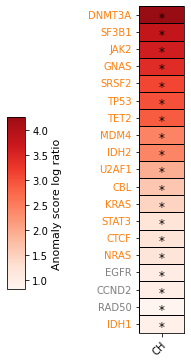

In [193]:
df_anomaly, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(df, 
                                                                                  cohort_df, 
                                                                                  top_cohorts_n=top_cohorts_n, 
                                                                                  top_genes_n=top_genes_n, 
                                                                                  anomaly_dict=anomaly_dict)

df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(df, 
                                                                                 cohort_df, 
                                                                                 top_cohorts_n=top_cohorts_n, 
                                                                                 top_genes_n=top_genes_n, 
                                                                                 anomaly_dict=False)

df_binary.columns = [cohort.split("_")[2] for cohort in df_binary.columns]
df_anomaly.columns = [cohort.split("_")[2] for cohort in df_anomaly.columns]
gene_colors, lut = get_gene_annotation(df_binary, df)

plot_landscape(df=df_binary, gene_colors=gene_colors, lut=lut, df_anomaly=df_anomaly,
               figsize=(1,8),
               width_ratios=[1, 0.2],
               height_ratios=[0.3, 1],
               legend_box=(-10.5, 0.95),
               ax1_margin=0.005,
               ax4_margin=0.005,
               wspace=0.03, 
               hspace=0.05,
               cbar_loc=[-1.7, 0.2, 0.25, .3],
               filename="landscape_heatmap_ch.png")

# Mouse

In [283]:
genetables_path = "/workspace/projects/clustering_3d/evaluation/tool_output/run_20230608_mouse/Liver_strelka_2017.3d_clustering_genes.csv"
genetables_path

'/workspace/projects/clustering_3d/evaluation/tool_output/run_20230608_mouse/Liver_strelka_2017.3d_clustering_genes.csv'

In [284]:
df = pd.read_csv(genetables_path)
df = df[df["qval"] < 0.01]
df = df[["Gene", "Score_obs_sim_top_vol"]].set_index("Gene")
max_value = df.values[np.isfinite(df.values)].max()
df.replace([np.inf, -np.inf], max_value * 2, inplace=True)
df = np.log(df)
df

Ratio_obs_sim_top_vol
Gene                                
Hras                        5.200429
Braf                        4.507282
H2-M5                       4.181026
Nrcam                       4.026246
Ncl                         3.545151
Itga9                       3.314650
Nkx2-5                      3.080942
Olfr1242                    2.865297
Egfr                        2.791804
Gm5134                      2.790034
Oaf                         2.687669
Rdh10                       2.540607
9530002B09Rik               2.531061
Chd5                        2.478544
Fam126b                     2.426056
Zfp184                      2.238610
Pbp2                        2.072148
Kras                        2.037784
Olfr945                     2.000847
Ccdc9                       1.902428
Gm20721                     1.865102
Rap1gap                     1.842599
Mylk                        1.839614
Unk                         1.818758
Tdrd6                       1.793359
Mab21l4                     1.764456
Zmynd10                     1.658111
Plcl1                       1.469585
Vmn2r74                     1.394370
St8sia3                     1.289419
Soat2                       1.260621
Ebf3                        1.250487
Saxo1                       1.229132
Evpl                        1.222975
Tnc                         1.166462
Txk                         1.141845
Tepsin                      1.130674
Angel2                      1.123802
Ankrd63                     1.119855
Bpifb5                      1.092903
Rps25                       1.066693
Nol6                        1.010233
Lrfn5                       0.998239
Ifi47                       0.991459
Npas1                       0.980945
Pdxdc1                      0.980442
Ccdc178                     0.979058
Krt77                       0.976469
Dot1l                       0.969957
Sh2d3c                      0.964840
Vmn2r22                     0.964778
Ccdc54                      0.962734
Adamtsl3                    0.925541
Pum1                        0.911668
Ccdc33                      0.899077
Scn1a                       0.869858
Nbas                        0.862043
Zswim4                      0.789646

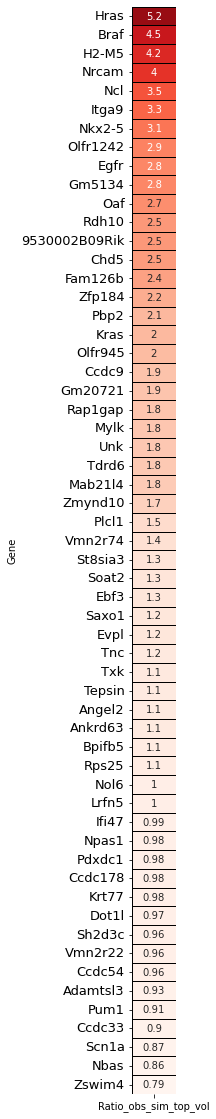

In [313]:
fig = plt.figure(figsize=(0.8,20))
sns.heatmap(df, annot=True, cmap=cmap, cbar=False, lw=1, linecolor="black")
plt.yticks(fontsize=13)

plt.savefig("landscape_mouse.png", dpi=300, bbox_inches='tight')
plt.show()

# Clusters solvent accessibility and more

In [602]:
import os
from tqdm.notebook import tqdm

o3d_datasets = "/workspace/nobackup/scratch/oncodrive3d/datasets_mane_240506"
seq_df = pd.read_csv(f"{o3d_datasets}/seq_for_mut_prob.tsv", sep="\t")
gene_to_uni_id_dict = {gene : uni_id for gene, uni_id in seq_df[["Gene", "Uniprot_ID"]].values}
plddt = pd.read_csv(f"{o3d_datasets}/confidence.tsv", sep="\t")
plddt = plddt[["Uniprot_ID", "Confidence"]]
pacc = pd.read_csv("/workspace/nobackup/scratch/oncodrive3d/annotations_mane_240506/pdb_tool_df.tsv", sep="\t")
pacc = pacc[["Uniprot_ID", "pACC"]]

/tmp/jobs/spellegrini/9964934/ipykernel_20268/1521345198.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  plddt = pd.read_csv(f"{o3d_datasets}/confidence.tsv", sep="\t")
/tmp/jobs/spellegrini/9964934/ipykernel_20268/1521345198.py:9: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  pacc = pd.read_csv("/workspace/nobackup/scratch/oncodrive3d/annotations_mane_240506/pdb_tool_df.tsv", sep="\t")


### Retrieve cluster mean of pACC and other metrics

In [603]:
%%time

lst_result = []
for cohort in cohort_df.COHORT:
    if not cohort.startswith("ICGC"):
        gene_df_path = f"{o3d_output_dir}/{cohort}/{cohort}.3d_clustering_genes.csv"
        res_df_path = f"{o3d_output_dir}/{cohort}/{cohort}.3d_clustering_pos.csv"
        
        if os.path.isfile(gene_df_path) and os.path.isfile(res_df_path):
            gene_df = pd.read_csv(gene_df_path)
            res_df = pd.read_csv(res_df_path)

            hits = gene_df[gene_df["C_gene"] == 1]
            hits = hits["Gene"].values

            for gene in hits:
                print(cohort, gene)
                hits_res = res_df[(res_df["Gene"] == gene) & (res_df["C"] == 1)]
                plddt_gene = plddt[plddt["Uniprot_ID"] == gene_to_uni_id_dict[gene]]
                plddt_gene = plddt_gene.Confidence
                pacc_gene = pacc[pacc["Uniprot_ID"] == gene_to_uni_id_dict[gene]]
                pacc_gene = pacc_gene.pACC
                mean_values = hits_res.groupby("Cluster").apply(lambda x: lst_result.append((cohort, gene,
                                                                                             drivers_df[drivers_df["SYMBOL"] == gene].ROLE.unique()[0] 
                                                                                             if len(drivers_df[drivers_df["SYMBOL"] == gene].ROLE.unique()) > 0 
                                                                                             else "NA",
                                                                                             x.Cluster.unique()[0], x.Pos.values, 
                                                                                             np.mean(plddt_gene.iloc[x.Pos.values - 1]), 
                                                                                             np.mean(pacc_gene.iloc[x.Pos.values - 1]),
                                                                                             np.mean(x.PAE_vol))))

cluster_info = pd.DataFrame(lst_result, columns=["Cohort", "Gene", "Gene_action", "Cluster", "Pos", "pLDDT", "pACC", "PAE"])
cluster_info = cluster_info[cluster_info["Gene_action"] != "ambiguous"]
cluster_info

HARTWIG_WGS_BLCA_2023 PIK3CA
HARTWIG_WGS_BLCA_2023 RXRA
HARTWIG_WGS_BLCA_2023 FGFR3
HARTWIG_WGS_BLCA_2023 FBXW7
HARTWIG_WGS_BLCA_2023 TP53
CBIOP_WGS_STAD_ONCOSG_2018 TP53
CBIOP_WXS_CM_VALLEN_2018 BRAF
CBIOP_WXS_CM_VALLEN_2018 NRAS
CBIOP_WXS_CM_VALLEN_2018 NBPF3
CBIOP_WXS_CM_VALLEN_2018 ZNF804A
CBIOP_WXS_CM_VALLEN_2018 CTAGE6
CBIOP_WXS_CM_VALLEN_2018 TP53
CBIOP_WXS_CM_VALLEN_2018 CTNNA2
CBIOP_WXS_CM_VALLEN_2018 PPP6C
CBIOP_WXS_BLCA_VALLEN_2018 FAM186A
CBIOP_WXS_BLCA_VALLEN_2018 FGFR3
CBIOP_WXS_BLCA_VALLEN_2018 CUX2
HARTWIG_WGS_HCC_2023 CTNNB1
HARTWIG_WGS_UCEC_2023 FBXW7
HARTWIG_WGS_UCEC_2023 PIK3CA
HARTWIG_WGS_COADREAD_2023 KRAS
HARTWIG_WGS_COADREAD_2023 TP53
HARTWIG_WGS_COADREAD_2023 BRAF
HARTWIG_WGS_COADREAD_2023 FBXW7
HARTWIG_WGS_COADREAD_2023 PIK3CA
HARTWIG_WGS_COADREAD_2023 NRAS
HARTWIG_WGS_COADREAD_2023 SMAD4
HARTWIG_WGS_COADREAD_2023 PCBP1
HARTWIG_WGS_COADREAD_2023 ERBB2
HARTWIG_WGS_COADREAD_2023 BCL9L
HARTWIG_WGS_COADREAD_2023 ERBB3
HARTWIG_WGS_GB_2023 EGFR
CBIOP_WGS_PRAD_EURURO

<timed exec>:9: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.


HARTWIG_WGS_SKCM_2023 BRAF
HARTWIG_WGS_SKCM_2023 NRAS
HARTWIG_WGS_SKCM_2023 MAP2K1
HARTWIG_WGS_SKCM_2023 IDH1
HARTWIG_WGS_SKCM_2023 RAC1
HARTWIG_WGS_SKCM_2023 CNOT9
HARTWIG_WGS_SKCM_2023 KNSTRN
HARTWIG_WGS_SKCM_2023 ZFX
HARTWIG_WGS_SKCM_2023 CRNKL1
HARTWIG_WGS_SKCM_2023 ADH4
HARTWIG_WGS_COAD_2023 KRAS
HARTWIG_WGS_COAD_2023 TP53
HARTWIG_WGS_COAD_2023 BRAF
HARTWIG_WGS_COAD_2023 PIK3CA
HARTWIG_WGS_COAD_2023 SMAD4
HARTWIG_WGS_CHOL_2023 KRAS
HARTWIG_WGS_CHOL_2023 IDH1
HARTWIG_WGS_CHOL_2023 TP53
HARTWIG_WGS_ESCC_2023 TP53
HARTWIG_WGS_ESCC_2023 PIK3CA
HARTWIG_WGS_ESCC_2023 SMAD4
CBIOP_WXS_DLBC_BROAD_2012 EZH2
CBIOP_WXS_DLBC_BROAD_2012 MEF2C
CPTAC_WXS_GBM_2020 CREM
CPTAC_WXS_GBM_2020 ITPRID2
CBIOP_WXS_HCC_AMC_PRV CTNNB1
CBIOP_WXS_HCC_AMC_PRV IFITM3
CBIOP_WXS_HCC_AMC_PRV TP53
CBIOP_WXS_CLL_BROAD_2013 SF3B1
CBIOP_WXS_CLL_BROAD_2013 MYD88
CBIOP_WXS_CLL_BROAD_2013 XPO1
CBIOP_WXS_EGC_TMUCIH_2015 PIK3CA
CBIOP_WXS_EGC_TMUCIH_2015 TP53
CBIOP_WXS_CSCC_UCSF_2018 TP53
CBIOP_WXS_CSCC_UCSF_2018 HRAS
CBIOP_

Cohort    Gene Gene_action  Cluster              Pos  \
0    HARTWIG_WGS_BLCA_2023  PIK3CA         Act      0.0  [542, 545, 539]   
1    HARTWIG_WGS_BLCA_2023    RXRA         Act      0.0       [427, 429]   
2    HARTWIG_WGS_BLCA_2023   FGFR3         Act      0.0       [248, 249]   
3    HARTWIG_WGS_BLCA_2023   FGFR3         Act      1.0            [373]   
4    HARTWIG_WGS_BLCA_2023   FBXW7         Act      0.0       [505, 465]   
..                     ...     ...         ...      ...              ...   
921          TCGA_WXS_PRAD   MED12         Act      0.0     [1223, 1224]   
922          TCGA_WXS_PRAD  CTNNB1         Act      0.0         [32, 33]   
923          TCGA_WXS_PGNG    HRAS         Act      0.0             [13]   
924          TCGA_WXS_PGNG    HRAS         Act      1.0             [61]   
925          TCGA_WXS_PGNG   EPAS1         Act      0.0  [531, 530, 532]   

         pLDDT       pACC       PAE  
0    93.733333  51.666667  0.841270  
1    97.750000  22.000000  0.500000  
2    53.510000  30.000000  0.850000  
3    65.940000  72.000000  0.000000  
4    98.680000  13.000000  0.500000  
..         ...        ...       ...  
921  92.055000   0.500000  0.500000  
922  37.105000  85.500000  0.800000  
923  94.820000  36.000000  4.444444  
924  85.100000  34.000000  0.000000  
925  52.330000  79.666667  1.000000  

[926 rows x 8 columns]

### Plot distributions

In [726]:
df_info_na = cluster_info[cluster_info["Gene_action"] == "NA"].groupby("Gene").apply(lambda x: (len(x.Cohort.unique()), len(x)))
pd.DataFrame(df_info_na.tolist(), index=df_info_na.index, columns=["# cohorts", "# clusters"]).sort_values("# clusters", ascending=False)[:30]

# cohorts  # clusters
Gene                           
IGLL5             2          14
EGR1              1           4
AHNAK2            2           3
OR5H14            2           2
ESX1              2           2
TBR1              2           2
GBP4              2           2
HLA-DQB1          2           2
RETSAT            2           2
CTAGE6            2           2
COL21A1           1           2
C3orf70           2           2
PLXNB1            1           2
ZAN               1           2
CDC27             1           2
SLC27A5           1           2
MADCAM1           2           2
APOBR             2           2
ANKRD30A          1           2
LILRB2            2           2
ZNF780B           1           2
MEF2C             2           2
SIGLEC10          1           1
SH3RF3            1           1
NBPF3             1           1
NDUFS1            1           1
NPEPPS            1           1
SEL1L2            1           1
SCEL              1           1
RIMS4             1           1

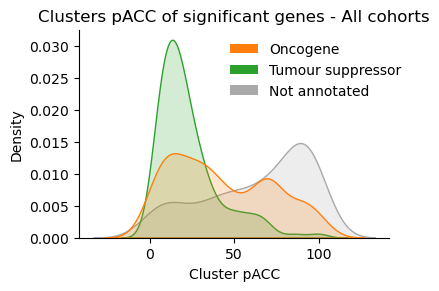

In [785]:
lut = {"Act": '#ff7f0e', 
       "LoF": '#2ca02c',
       "ambiguous" : "#b300b2",
       "NA": 'darkgray'}

## Plot 
plt.figure(figsize=(4, 2.7))
palette = {'Act': '#ff7f0e', 'LoF': '#2ca02c', "ambiguous" : "#b300b2", 'NA': 'darkgray'}
sns.kdeplot(data=cluster_info, x='pACC', hue='Gene_action', fill=True, common_norm=False, palette=palette, alpha=0.2)

# Add labels and a legend
plt.xlabel('Cluster pACC')
plt.ylabel('Density')
plt.title("Clusters pACC of significant genes - All cohorts", fontsize=12)

handles = [mpatches.Patch(facecolor=lut["Act"], label="Oncogene"),
           mpatches.Patch(facecolor=lut["LoF"], label="Tumour suppressor"),
           mpatches.Patch(facecolor=lut["NA"], label="Not annotated")]
plt.legend(handles=handles, frameon=False, bbox_to_anchor=[0,0,1.08,1])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig("pacc_cluster_distribution_by_action.png", dpi=300, bbox_inches='tight')
plt.show()

In [597]:
lut = {"Act": '#ff7f0e', 
       "LoF": '#2ca02c',
       "ambiguous" : "#b300b2",
       "NA": 'darkgray'}

## Plot 
plt.figure(figsize=(4, 2.7))
palette = {'Act': '#ff7f0e', 'LoF': '#2ca02c', "ambiguous" : "#b300b2", 'NA': 'darkgray'}
sns.kdeplot(data=cluster_info, x='pLDDT', hue='Gene_action', fill=True, common_norm=False, palette=palette, alpha=0.2)

# Add labels and a legend
plt.xlabel('Cluster pLDDT')
plt.ylabel('Density')
plt.title("Clusters pLDDT of significant genes - All cohorts", fontsize=12)

handles = [mpatches.Patch(facecolor=lut["Act"], label="Oncogene"),
           mpatches.Patch(facecolor=lut["LoF"], label="Tumour suppressor"),
           mpatches.Patch(facecolor=lut["NA"], label="Not annotated")]
plt.legend(handles=handles, loc="upper left", frameon=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("plddt_cluster_distribution_by_action.png", dpi=300, bbox_inches='tight')
plt.show()

NameError: name 'cluster_info' is not defined

<Figure size 400x270 with 0 Axes>

/tmp/jobs/spellegrini/9964934/ipykernel_1413/1621273303.py:29: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=cluster_info, x='PAE', fill=True, common_norm=False, palette=palette, alpha=0.2, color="skyblue")


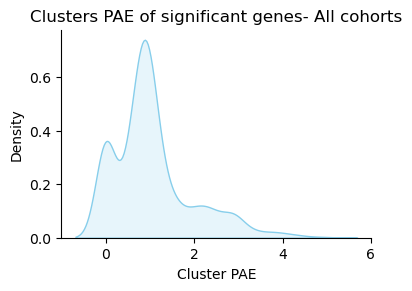

In [794]:
lut = {"Act": '#ff7f0e', 
       "LoF": '#2ca02c',
       "ambiguous" : "#b300b2",
       "NA": '#7f7f7f'}

# ## Plot 
# plt.figure(figsize=(6, 4))
# palette = {'Act': '#ff7f0e', 'LoF': '#2ca02c', "ambiguous" : "#b300b2", 'NA': '#7f7f7f'}
# sns.kdeplot(data=cluster_info, x='PAE', hue='Gene_action', fill=True, common_norm=False, palette=palette, alpha=0.2)

# # Add labels and a legend
# plt.xlabel('Cluster PAE')
# plt.ylabel('Density')
# plt.title("Clusters PAE of significant genes - All cohorts", fontsize=12)

# handles = [mpatches.Patch(facecolor=lut["Act"], label="Act"),
#            mpatches.Patch(facecolor=lut["LoF"], label="LoF"),
#            mpatches.Patch(facecolor=lut["ambiguous"], label="ambiguous"),
#            mpatches.Patch(facecolor=lut["NA"], label="NA")]
# plt.legend(handles=handles)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.savefig("pae_cluster_distribution_by_action.png", dpi=300, bbox_inches='tight')
# plt.show()

## Plot 
plt.figure(figsize=(4, 2.7))
#palette = {'Act': lut["Act"], 'LoF': lut["LoF"], "ambiguous" : lut["ambiguous"], 'NA': lut["NA"]}
sns.kdeplot(data=cluster_info, x='PAE', fill=True, common_norm=False, palette=palette, alpha=0.2, color="skyblue")

# Add labels and a legend
plt.xlabel('Cluster PAE')
plt.ylabel('Density')
plt.title("Clusters PAE of significant genes- All cohorts", fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("pae_cluster_distribution.png", dpi=300, bbox_inches='tight')
plt.show()